# Predictive Modeling for Insurance Claim Probability Based on Comprehensive Car Policy Features and Safety Ratings

## Problem Statement :
### Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [ ]:
df = pd.read_csv("/content/Insurance_Data.csv")

In [ ]:
df1 = df.copy()

## Data Information

In [ ]:
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   
3                 Yes                Yes                Yes   
4                 Yes                Yes                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  
3            Yes           2        0  
4            Yes           2        0  

[5 rows x 44 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

- The dataset contains total 58,592 observations and 44 features. "is_claim" is our target feature.

In [ ]:
df1.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

- There is no missing values in this dataset.

## Checking 5 Point Summary

In [ ]:
df1.describe()

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786      0.483616      0.430353   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width       height  gross_weight  \
count    58592.000000  58592.000000  58592.000000  58592.00000  58592.000000   
mean         4.852893   3850.476891   1672.233667   1553.33537   1385.276813   
std          0.228061    311.457119    112.089135     79.62227    212.423085   
min          4.500000   3445.000000   1475.000000   1475.00000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.00000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.00000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.00000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.00000   1720.000000   

        ncap_rating      is_claim  
count  58592.000000  58592.000000  
mean       1.759950      0.063968  
std        1.389576      0.244698  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        2.000000      0.000000  
75%        3.000000      0.000000  
max        5.000000      1.000000

In [ ]:
# Checking Outliers

def boxplots(col):
    sns.boxplot(df1[col])
    plt.show()

policy_tenure


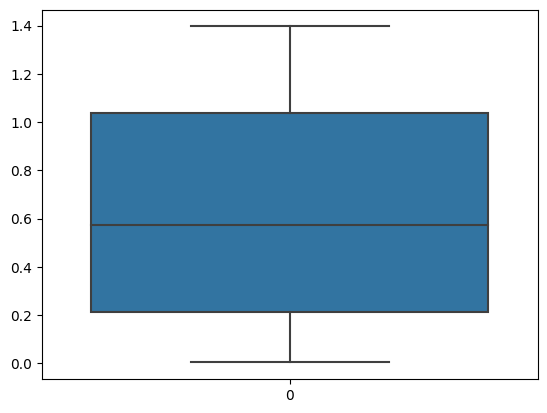

age_of_car


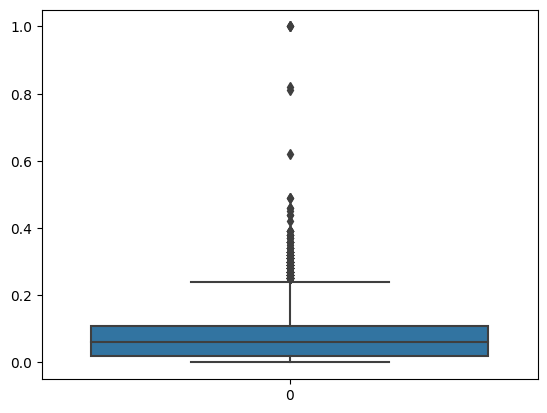

age_of_policyholder


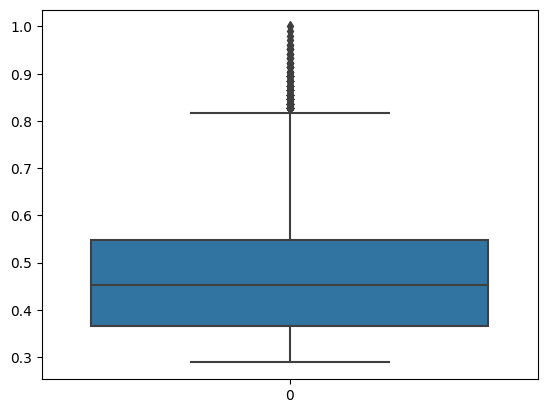

population_density


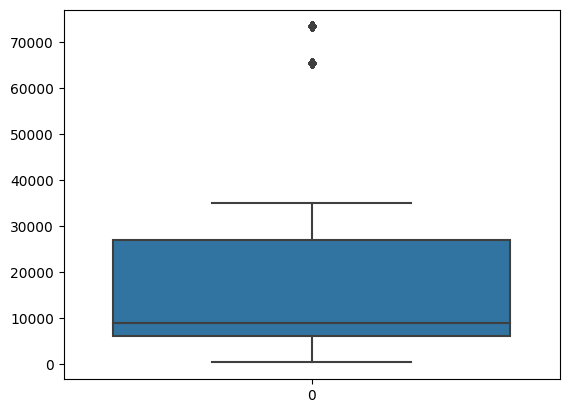

make


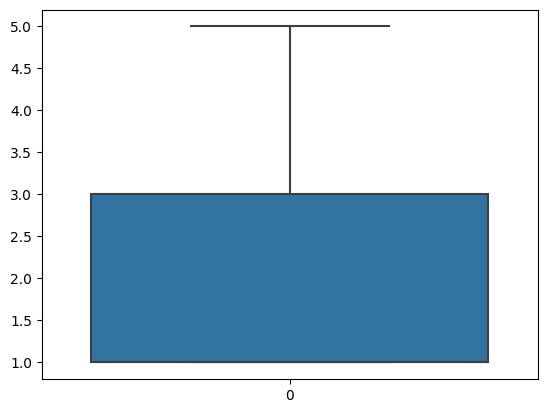

airbags


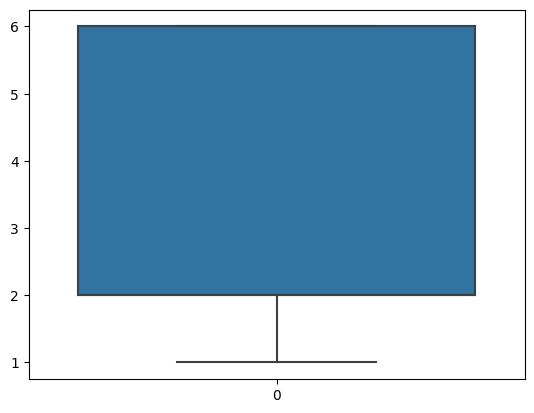

displacement


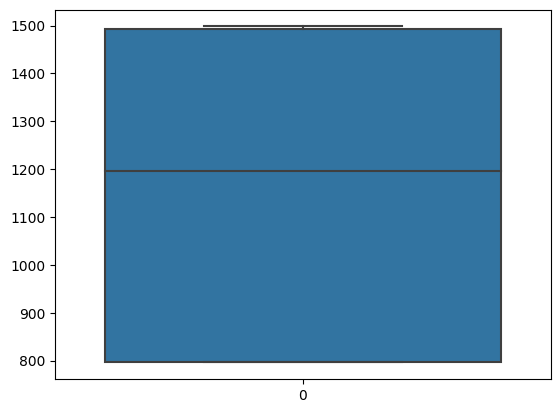

cylinder


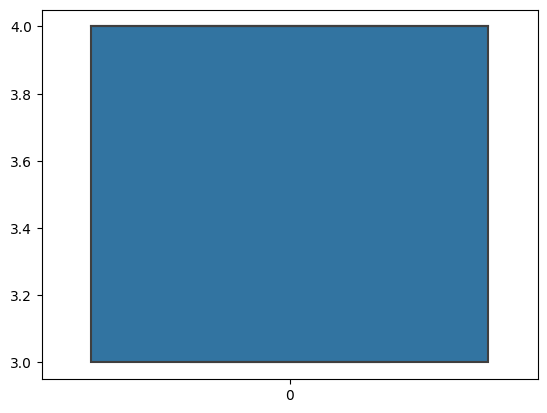

gear_box


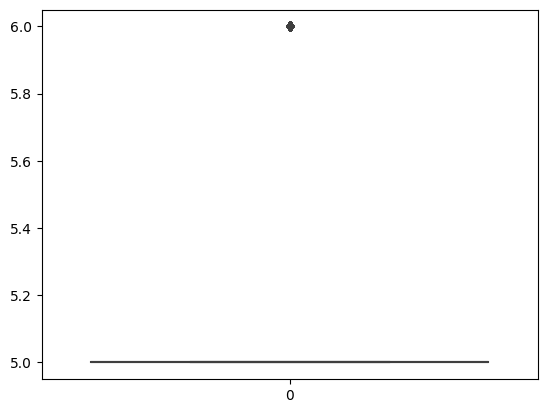

turning_radius


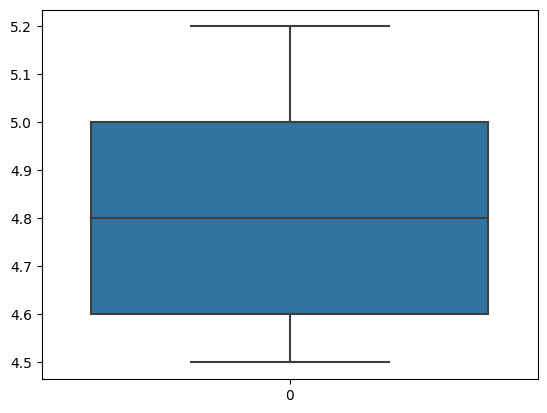

length


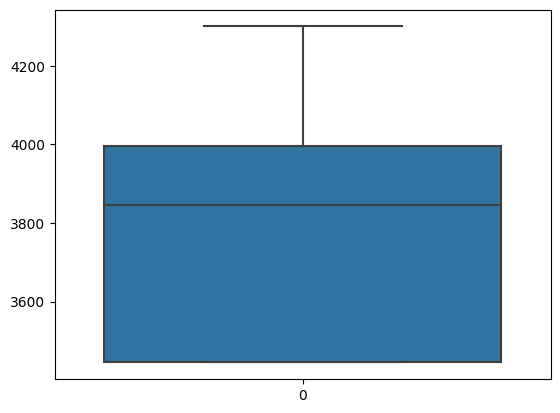

width


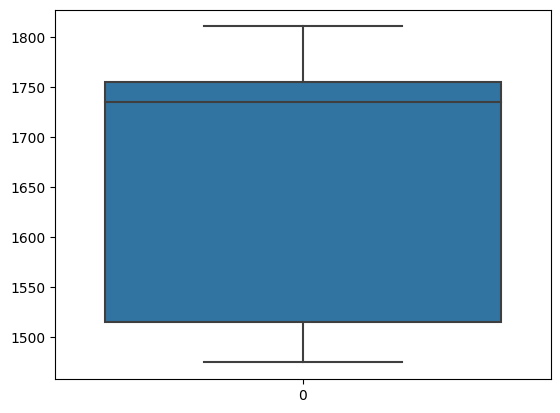

height


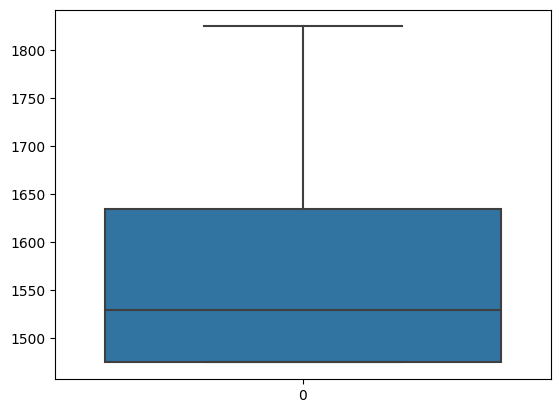

gross_weight


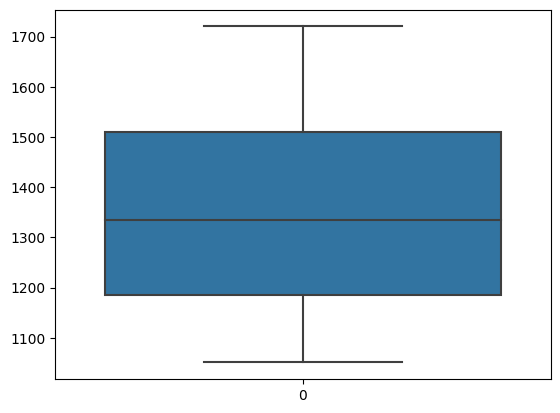

ncap_rating


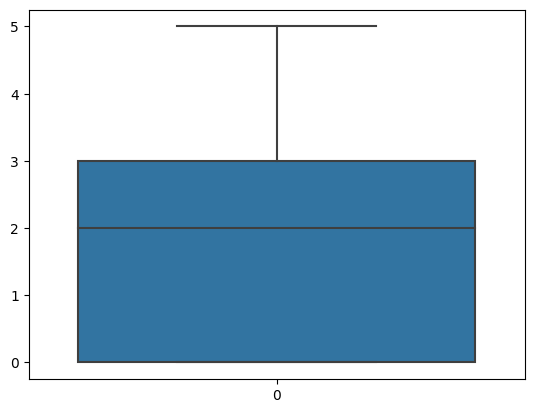

is_claim


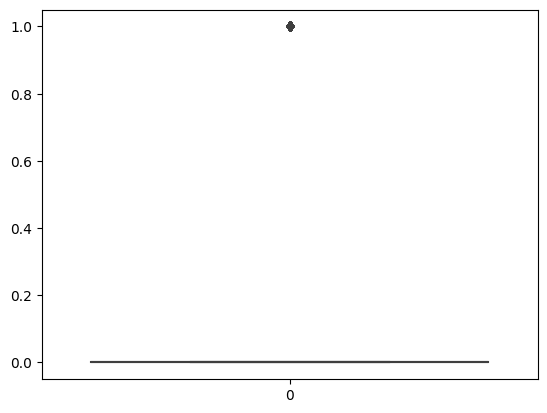

In [ ]:
for column in list(df1.select_dtypes(exclude=["object", "category"]).columns)[:]:
    print(column)
    boxplots(column)

- There are significant no.of outliers in feature "age_of_car" and "age_of_policyholder" only.
- We will not treat the outliers rather retain them as they are the data points we are looking for.
- So, keeping the outliers we will see how our model works.

In [ ]:
def distplots(dataframe, feature):
    sns.distplot(dataframe[feature], kde=True)
    plt.show()

policy_tenure


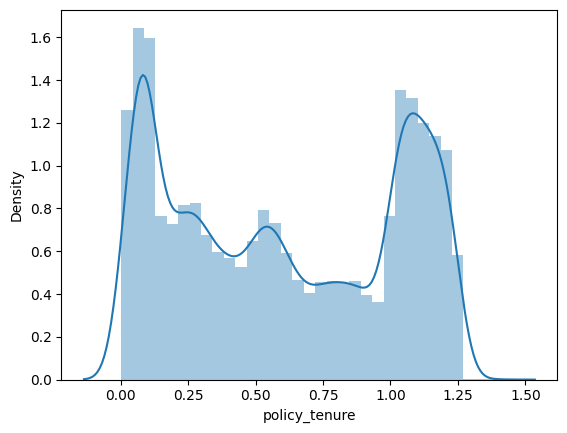

age_of_car


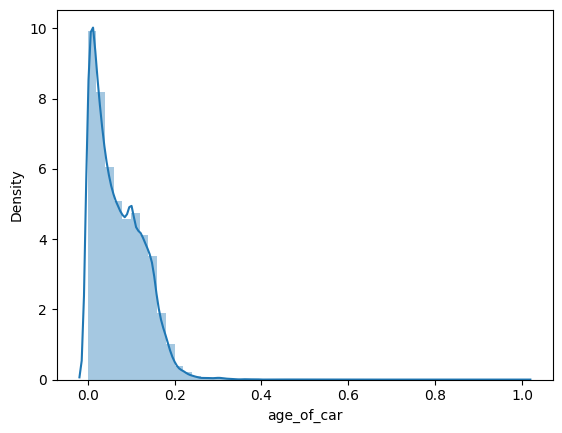

age_of_policyholder


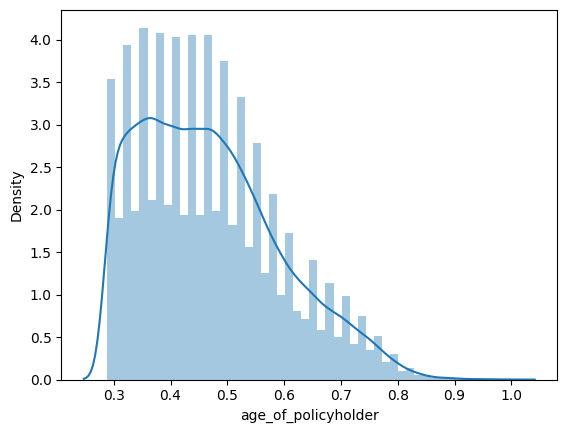

population_density


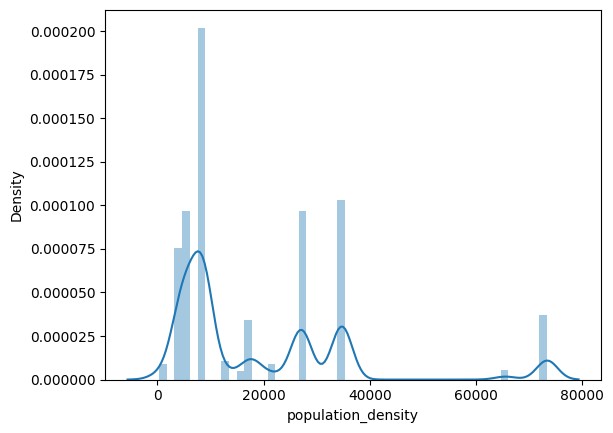

make


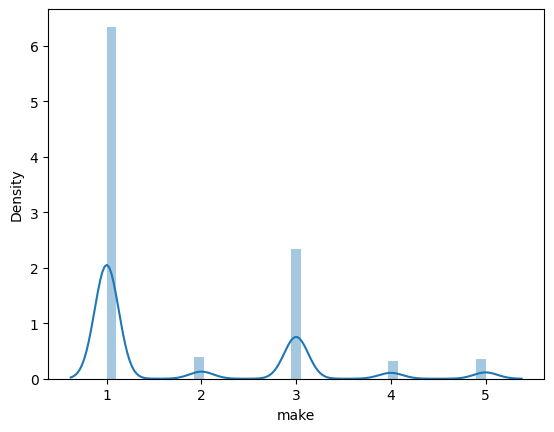

airbags


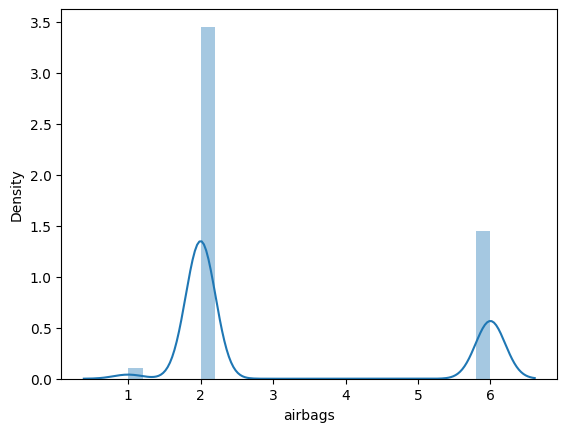

displacement


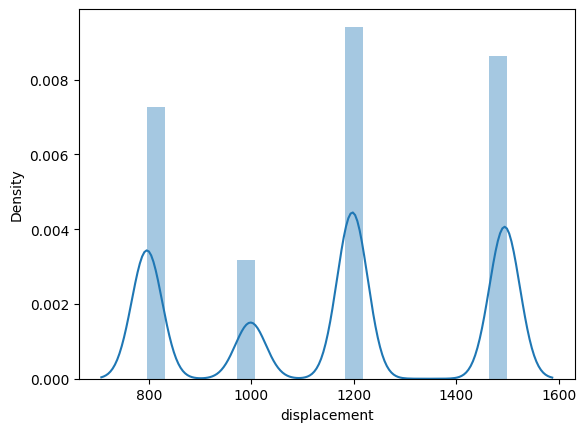

cylinder


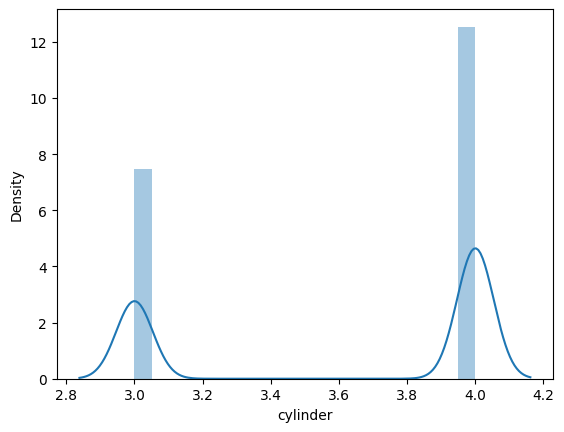

gear_box


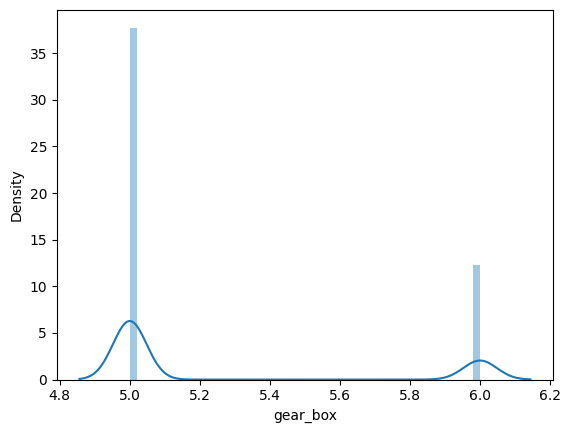

turning_radius


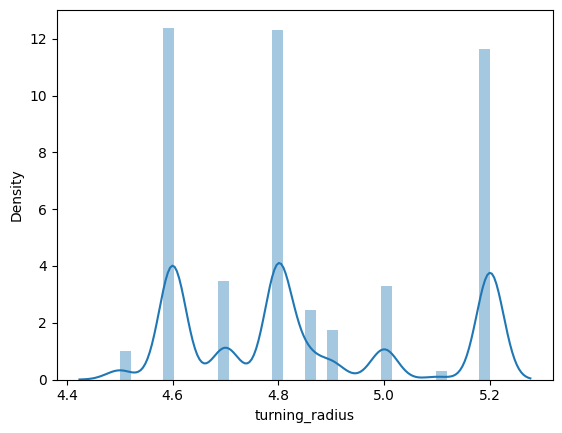

length


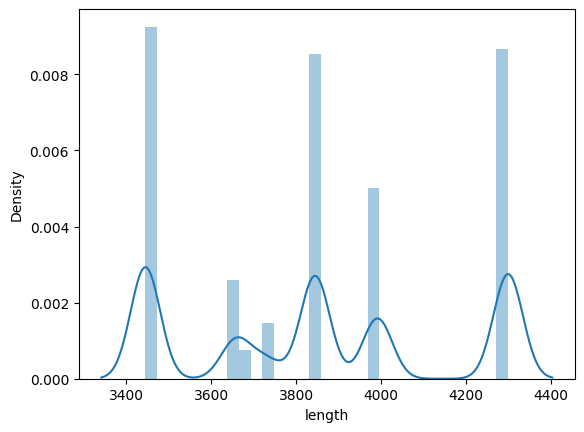

width


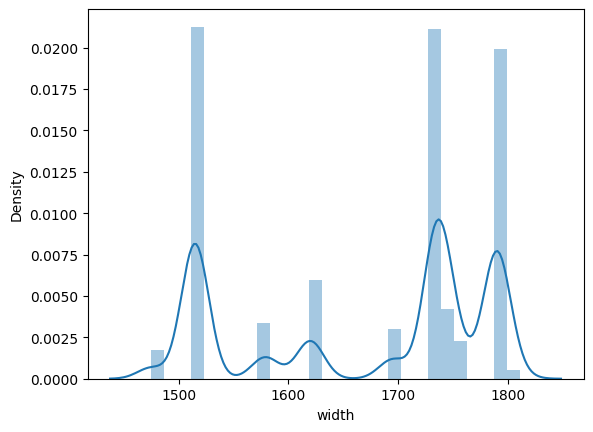

height


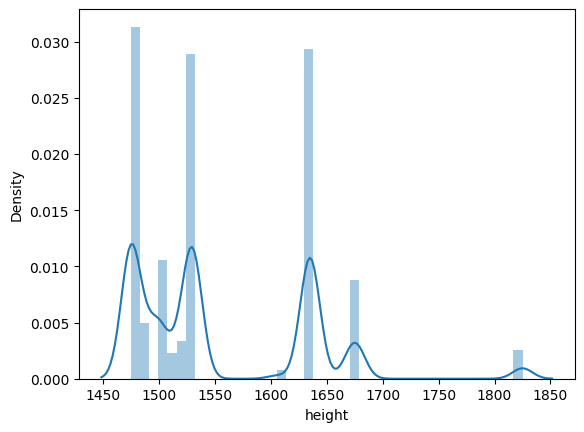

gross_weight


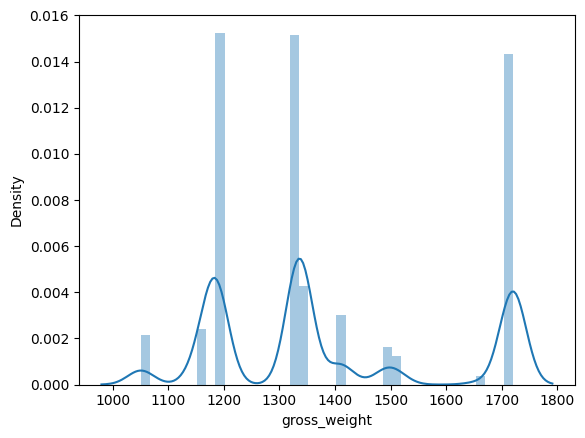

ncap_rating


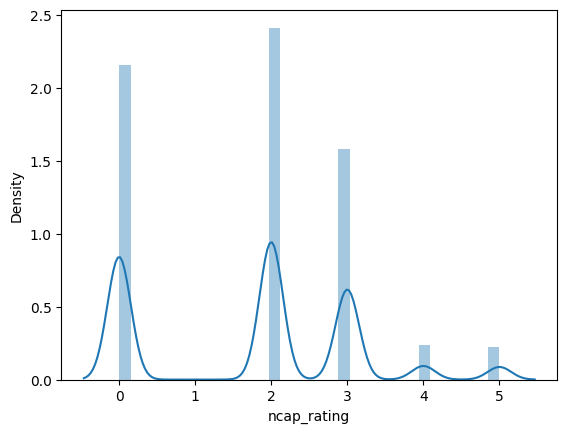

is_claim


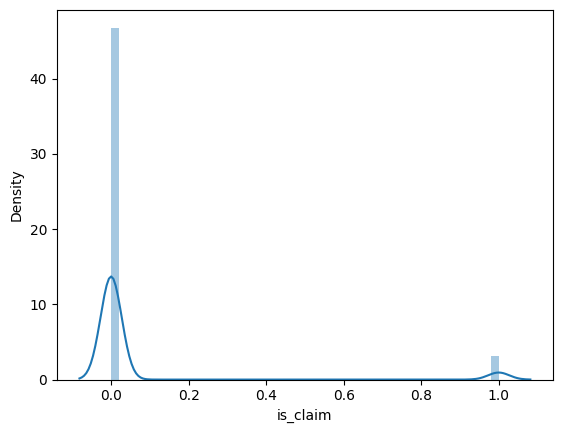

In [ ]:
for feature in list(df1.select_dtypes(exclude=["object", "category"]).columns)[:]:
    print(feature)
    distplots(df1, feature)

In [ ]:
h = df1.corr()
h

policy_tenure  age_of_car  age_of_policyholder  \
policy_tenure             1.000000    0.166312             0.143676   
age_of_car                0.166312    1.000000            -0.035427   
age_of_policyholder       0.143676   -0.035427             1.000000   
population_density       -0.100307   -0.062255             0.009669   
make                      0.086101    0.188122            -0.031989   
airbags                   0.103981    0.209073            -0.008041   
displacement              0.194361    0.393208            -0.023764   
cylinder                  0.191185    0.379522             0.004183   
gear_box                  0.095305    0.201579            -0.003115   
turning_radius            0.166426    0.332716            -0.016764   
length                    0.190869    0.383177            -0.020138   
width                     0.213228    0.414104            -0.006135   
height                    0.119055    0.259156            -0.053930   
gross_weight              0.141027    0.302127            -0.007758   
ncap_rating               0.173280    0.348853            -0.031628   
is_claim                  0.078747   -0.028172             0.022435   

                     population_density      make   airbags  displacement  \
policy_tenure                 -0.100307  0.086101  0.103981      0.194361   
age_of_car                    -0.062255  0.188122  0.209073      0.393208   
age_of_policyholder            0.009669 -0.031989 -0.008041     -0.023764   
population_density             1.000000 -0.035125 -0.060359     -0.090983   
make                          -0.035125  1.000000  0.501800      0.753344   
airbags                       -0.060359  0.501800  1.000000      0.661190   
displacement                  -0.090983  0.753344  0.661190      1.000000   
cylinder                      -0.091591  0.410672  0.478594      0.866231   
gear_box                      -0.056640  0.632807  0.859556      0.692240   
turning_radius                -0.077501  0.753861  0.810820      0.875407   
length                        -0.091968  0.692365  0.809094      0.961655   
width                         -0.098156  0.511695  0.639562      0.899302   
height                        -0.065583  0.303274  0.423816      0.554591   
gross_weight                  -0.077816  0.481408  0.828988      0.776210   
ncap_rating                   -0.071150  0.792254  0.341557      0.847065   
is_claim                      -0.017808 -0.000456  0.002789      0.007678   

                     cylinder  gear_box  turning_radius    length     width  \
policy_tenure        0.191185  0.095305        0.166426  0.190869  0.213228   
age_of_car           0.379522  0.201579        0.332716  0.383177  0.414104   
age_of_policyholder  0.004183 -0.003115       -0.016764 -0.020138 -0.006135   
population_density  -0.091591 -0.056640       -0.077501 -0.091968 -0.098156   
make                 0.410672  0.632807        0.753861  0.692365  0.511695   
airbags              0.478594  0.859556        0.810820  0.809094  0.639562   
displacement         0.866231  0.692240        0.875407  0.961655  0.899302   
cylinder             1.000000  0.410163        0.615806  0.805476  0.862430   
gear_box             0.410163  1.000000        0.861740  0.808975  0.601923   
turning_radius       0.615806  0.861740        1.000000  0.944899  0.825603   
length               0.805476  0.808975        0.944899  1.000000  0.915918   
width                0.862430  0.601923        0.825603  0.915918  1.000000   
height               0.352118  0.579725        0.460436  0.553579  0.389317   
gross_weight         0.602978  0.894639        0.823097  0.861723  0.734284   
ncap_rating          0.598364  0.529688        0.779302  0.767519  0.771944   
is_claim             0.013434 -0.000635        0.002724  0.006495  0.009947   

                       height  gross_weight  ncap_rating  is_claim  
policy_tenure        0.119055      0.141027     0.173280  0.078747  
age_of_car           

<Axes: >

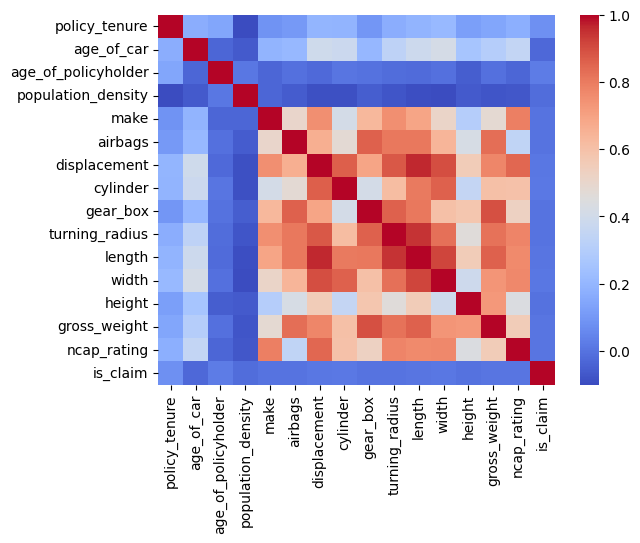

In [ ]:
sns.heatmap(h, cmap="coolwarm", fmt=".2f")

## Encoding

In [ ]:
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   
3                 Yes                Yes                Yes   
4                 Yes                Yes                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  
3            Yes           2        0  
4            Yes           2        0  

[5 rows x 44 columns]

#### 1. Feature "area_cluster"

In [ ]:
df1["area_cluster"].unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [ ]:
# # Using label Encoding

# # df1_encoded = pd.get_dummies(df1, columns=["area_cluster"], prefix = "area", drop_first = "True")

# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df1['area_enc'] = label_encoder.fit_transform(df['area_cluster'])


In [ ]:
df1.head(2)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  

[2 rows x 44 columns]

#### 2. Feature "segment"

In [ ]:
# Feature "segment"

df1["segment"].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [ ]:
# Using one-hot encoding

df1 = pd.get_dummies(df1, columns=["segment"], prefix = "segment", drop_first = "True")

In [ ]:
df1.head(2)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   

   population_density  make model fuel_type    max_torque  ...  \
0                4990     1    M1       CNG  60Nm@3500rpm  ...   
1               27003     1    M1       CNG  60Nm@3500rpm  ...   

  is_day_night_rear_view_mirror is_ecw  is_speed_alert ncap_rating is_claim  \
0                            No     No             Yes           0        0   
1                            No     No             Yes           0        0   

  segment_B1 segment_B2 segment_C1 segment_C2  segment_Utility  
0          0          0          0          0                0  
1          0          0          0          0                0  

[2 rows x 48 columns]

#### 3. Feature "make"

In [ ]:
# Feature "make"

df1["make"].unique()

array([1, 2, 3, 4, 5])

In [ ]:
df1 = pd.get_dummies(df1, columns=["make"], prefix = "make", drop_first = "True")

In [ ]:
df1.head(2)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   

   population_density model fuel_type    max_torque         max_power  ...  \
0                4990    M1       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   
1               27003    M1       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   

  is_claim  segment_B1 segment_B2 segment_C1 segment_C2 segment_Utility  \
0        0           0          0          0          0               0   
1        0           0          0          0          0               0   

  make_2 make_3  make_4  make_5  
0      0      0       0       0  
1      0      0       0       0  

[2 rows x 51 columns]

#### 4. Feature "model"

In [ ]:
# Feature "model"

df1["model"].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [ ]:
df1.model.value_counts()

M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64

In [ ]:
# Using label encoding

df1["model"] = df1["model"].astype("category")
df1["model"] = df1["model"].cat.codes

In [ ]:
df1.head(2)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   

   population_density  model fuel_type    max_torque         max_power  ...  \
0                4990      0       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   
1               27003      0       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   

  is_claim  segment_B1 segment_B2 segment_C1 segment_C2 segment_Utility  \
0        0           0          0          0          0               0   
1        0           0          0          0          0               0   

  make_2 make_3  make_4  make_5  
0      0      0       0       0  
1      0      0       0       0  

[2 rows x 51 columns]

#### 5. Feature "fuel_type"

In [ ]:
# Feature "fuel_type"

df1["fuel_type"].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [ ]:
# Using one-hot encodin

df1 = pd.get_dummies(df1, columns=["fuel_type"], prefix = "fuel", drop_first = "True")

In [ ]:
df1.head(3)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   

   population_density  model    max_torque         max_power  \
0                4990      0  60Nm@3500rpm  40.36bhp@6000rpm   
1               27003      0  60Nm@3500rpm  40.36bhp@6000rpm   
2                4076      0  60Nm@3500rpm  40.36bhp@6000rpm   

         engine_type  ...  segment_B2 segment_C1 segment_C2 segment_Utility  \
0  F8D Petrol Engine  ...           0          0          0               0   
1  F8D Petrol Engine  ...           0          0          0               0   
2  F8D Petrol Engine  ...           0          0          0               0   

  make_2 make_3 make_4  make_5  fuel_Diesel fuel_Petrol  
0      0      0      0       0            0           0  
1      0      0      0       0            0           0  
2      0      0      0       0            0           0  

[3 rows x 52 columns]

In [ ]:
for feature in df1.columns:
    print("*"*30, feature, "*"*30)
    print(df1[feature].unique())
    print()

****************************** policy_id ******************************
['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']

****************************** policy_tenure ******************************
[0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]

****************************** age_of_car ******************************
[0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]

****************************** age_of_policyholder ******************************
[0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68

#### 6. Cleaning feature "max_torque"

In [ ]:
# Cleaning feature "max_torque"

# Spliting into torque and RPM column
df1[['torque', 'torque_RPM']] = df1['max_torque'].str.split('@', expand=True)

In [ ]:
df1["torque"] = df1["torque"].str.replace(r'\D', '', regex=True).astype(int)
df1["torque_RPM"] = df1["torque_RPM"].str.replace(r'\D', '', regex=True).astype(int)

In [ ]:
df1.head(3)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   

   population_density  model    max_torque         max_power  \
0                4990      0  60Nm@3500rpm  40.36bhp@6000rpm   
1               27003      0  60Nm@3500rpm  40.36bhp@6000rpm   
2                4076      0  60Nm@3500rpm  40.36bhp@6000rpm   

         engine_type  ...  segment_C2 segment_Utility make_2 make_3 make_4  \
0  F8D Petrol Engine  ...           0               0      0      0      0   
1  F8D Petrol Engine  ...           0               0      0      0      0   
2  F8D Petrol Engine  ...           0               0      0      0      0   

  make_5 fuel_Diesel  fuel_Petrol  torque torque_RPM  
0      0           0            0      60       3500  
1      0           0            0      60       3500  
2      0           0            0      60       3500  

[3 rows x 54 columns]

#### 7. Cleaning feature "max_power"

In [ ]:
# Cleaning feature "max_power"

#Spliting into power and power_rpm
df1[['power', 'power_RPM']] = df1['max_power'].str.split('@', expand=True)

In [ ]:
df1['power'] = df1['power'].str.replace(r'\D', '', regex=True).astype(int)
df1['power_RPM'] = df1['power_RPM'].str.replace(r'\D', '', regex=True).astype(int)

In [ ]:
df1.head(3)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   

   population_density  model    max_torque         max_power  \
0                4990      0  60Nm@3500rpm  40.36bhp@6000rpm   
1               27003      0  60Nm@3500rpm  40.36bhp@6000rpm   
2                4076      0  60Nm@3500rpm  40.36bhp@6000rpm   

         engine_type  ...  make_2 make_3 make_4 make_5 fuel_Diesel  \
0  F8D Petrol Engine  ...       0      0      0      0           0   
1  F8D Petrol Engine  ...       0      0      0      0           0   
2  F8D Petrol Engine  ...       0      0      0      0           0   

  fuel_Petrol torque  torque_RPM  power power_RPM  
0           0     60        3500   4036      6000  
1           0     60        3500   4036      6000  
2           0     60        3500   4036      6000  

[3 rows x 56 columns]

#### 8. Cleaning feature "engine_type"

In [ ]:
df1["engine_type"].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [ ]:
# Feature "engine_type"

df1 = pd.get_dummies(df1, columns=["engine_type"], prefix = "engine", drop_first = "True")

In [ ]:
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  model     max_torque         max_power  airbags  ...  \
0                4990      0   60Nm@3500rpm  40.36bhp@6000rpm        2  ...   
1               27003      0   60Nm@3500rpm  40.36bhp@6000rpm        2  ...   
2                4076      0   60Nm@3500rpm  40.36bhp@6000rpm        2  ...   
3               21622      3  113Nm@4400rpm  88.50bhp@6000rpm        2  ...   
4               34738      4   91Nm@4250rpm  67.06bhp@5500rpm        2  ...   

  engine_1.2 L K Series Engine engine_1.2 L K12N Dualjet engine_1.5 L U2 CRDi  \
0                            0                         0                    0   
1                            0                         0                    0   
2                            0                         0                    0   
3                            0                         1                    0   
4                            0                         0                    0   

  engine_1.5 Turbocharged Revotorq engine_1.5 Turbocharged Revotron  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

  engine_F8D Petrol Engine  engine_G12B  engine_K Series Dual jet engine_K10C  \
0                        1            0                         0           0   
1                        1            0                         0           0   
2                        1            0                         0           0   
3                        0            0                         0           0   
4                        0            0                         0           0   

   engine_i-DTEC  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 65 columns]

In [ ]:
# Droping the original features after cleaning and encoding

df1 = df1.drop(columns = ["max_torque", "max_power"])

In [ ]:
pd.set_option('display.max_columns', None)
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  model  airbags is_esc is_adjustable_steering is_tpms  \
0                4990      0        2     No                     No      No   
1               27003      0        2     No                     No      No   
2                4076      0        2     No                     No      No   
3               21622      3        2    Yes                    Yes      No   
4               34738      4        2     No                     No      No   

  is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0                Yes                No             Drum           796   
1                Yes                No             Drum           796   
2                Yes                No             Drum           796   
3                Yes               Yes             Drum          1197   
4                 No               Yes             Drum           999   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         3            Manual         5         Power             4.6    3445   
2         3            Manual         5         Power             4.6    3445   
3         4         Automatic         5      Electric             4.8    3995   
4         3         Automatic         5      Electric             5.0    3731   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   
2   1515    1475          1185                  No                   No   
3   1735    1515          1335                 Yes                   No   
4   1579    1490          1155                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   
3                    No                     Yes             Yes   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  segment_B1  segment_B2  segment_C1  \
0            Yes            0         0           0           0           0   
1            Yes            0         0           0           0           0   
2            Yes            0         0           0           0           0   
3            Yes            2         0           0           0           1   
4            Yes            2         0           0           0        

#### 9. Features - "is_esc", "is_adjustable_steering", "is_tpms", "is_parking_sensors", "is_parking_camera", "rear_brakes_type", "transmission_type", "is_front_fog_lights", "is_rear_window_wiper", "is_rear_window_washer", "is_rear_window_defogger", "is_brake_assist", "is_power_door_locks", "is_central_locking", "is_power_steering", "is_driver_seat_height_adjustable", "is_day_night_rear_view_mirror", "is_ecw", "is_speed_alert"

In [ ]:
# Features - "is_esc", "is_adjustable_steering", "is_tpms", "is_parking_sensors", "is_parking_camera", "rear_brakes_type",
# "transmission_type", "is_front_fog_lights", "is_rear_window_wiper", "is_rear_window_washer", "is_rear_window_defogger",
# "is_brake_assist", "is_power_door_locks", "is_central_locking", "is_power_steering", "is_driver_seat_height_adjustable",
# "is_day_night_rear_view_mirror", "is_ecw", "is_speed_alert"

feature_name = ["is_esc", "is_adjustable_steering", "is_tpms", "is_parking_sensors", "is_parking_camera", "rear_brakes_type", "transmission_type", "is_front_fog_lights", "is_rear_window_wiper", "is_rear_window_washer", "is_rear_window_defogger", "is_brake_assist", "is_power_door_locks", "is_central_locking", "is_power_steering", "is_driver_seat_height_adjustable", "is_day_night_rear_view_mirror", "is_ecw", "is_speed_alert"]

for feature in feature_name:
    df1[feature] = df1[feature].astype("category")
    df1[feature] = df1[feature].cat.codes

#### 10. Feature "steering_type"

In [ ]:
# Feature "steering_type"

df1 = pd.get_dummies(df1, columns=["steering_type"], prefix = "steering_type", drop_first = "True")

### Encoded Dataset

In [ ]:
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  model  airbags  is_esc  is_adjustable_steering  \
0                4990      0        2       0                       0   
1               27003      0        2       0                       0   
2                4076      0        2       0                       0   
3               21622      3        2       1                       1   
4               34738      4        2       0                       0   

   is_tpms  is_parking_sensors  is_parking_camera  rear_brakes_type  \
0        0                   1                  0                 1   
1        0                   1                  0                 1   
2        0                   1                  0                 1   
3        0                   1                  1                 1   
4        0                   0                  1                 1   

   displacement  cylinder  transmission_type  gear_box  turning_radius  \
0           796         3                  1         5             4.6   
1           796         3                  1         5             4.6   
2           796         3                  1         5             4.6   
3          1197         4                  0         5             4.8   
4           999         3                  0         5             5.0   

   length  width  height  gross_weight  is_front_fog_lights  \
0    3445   1515    1475          1185                    0   
1    3445   1515    1475          1185                    0   
2    3445   1515    1475          1185                    0   
3    3995   1735    1515          1335                    1   
4    3731   1579    1490          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
4                              1       1               1            2   

   is_claim  segment_B1  segment_B2  segment_C1  segment_C2  segment_Utility  \
0         0           0           0           0           0                0   
1         0           0           0           0           0                0 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   model                             58592 non-null  int8   
 7   airbags                           58592 non-null  int64  
 8   is_esc                            58592 non-null  int8   
 9   is_adjustable_steering            58592 non-null  int8   
 10  is_tpms                           58592 non-null  int8   
 11  is_parking_sensors                58592 non-null  int8   
 12  is_p

- Now none of the datatype of all the features are object.  

## EDA

In [ ]:
df_eda = df.copy()

In [ ]:
df_eda.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

## Univariate Analysis

policy_tenure


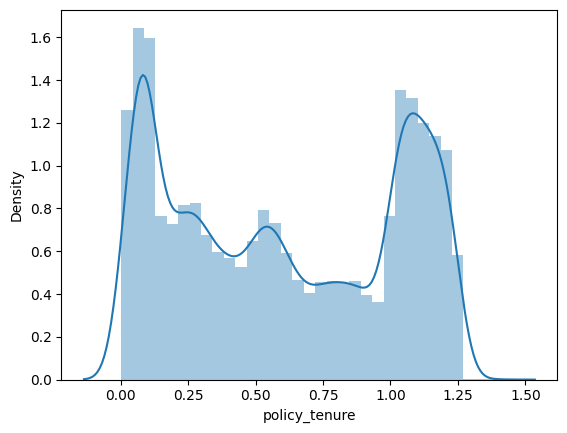

age_of_car


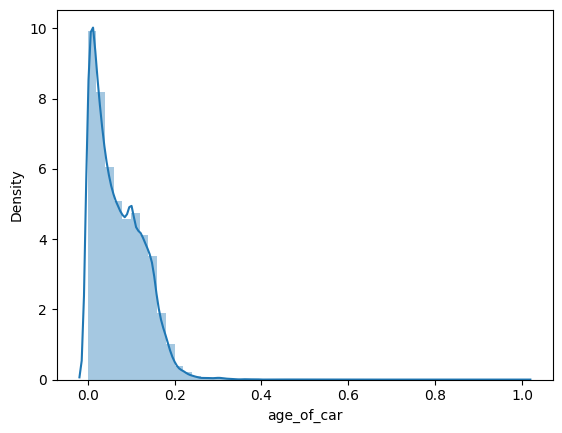

age_of_policyholder


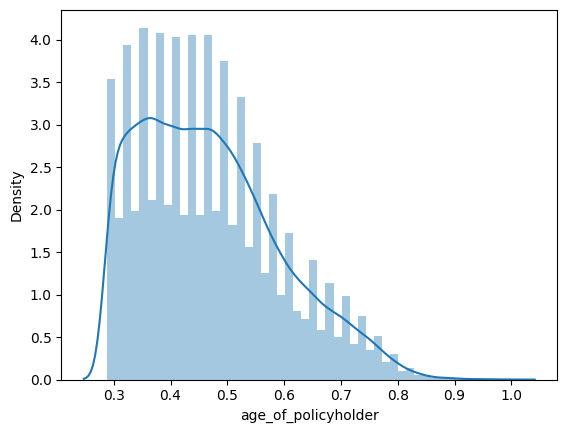

population_density


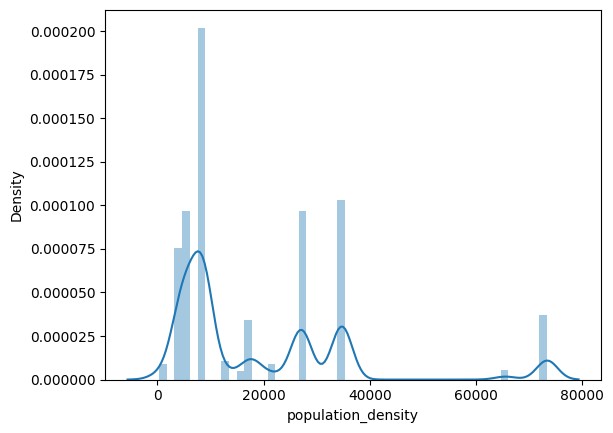

make


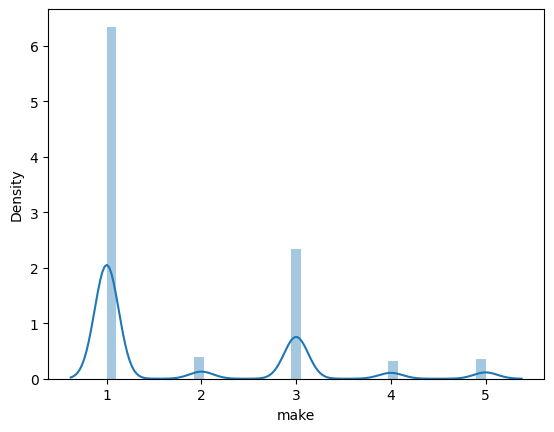

airbags


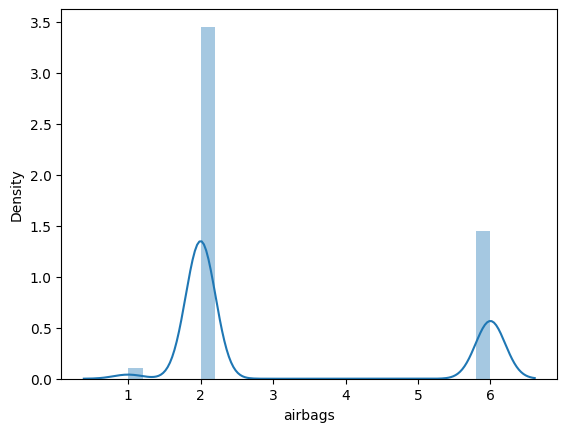

displacement


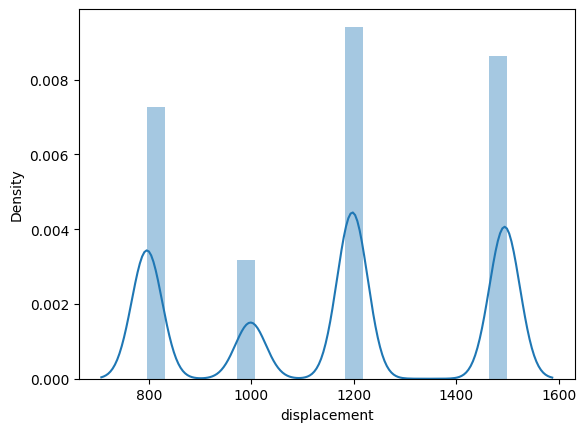

cylinder


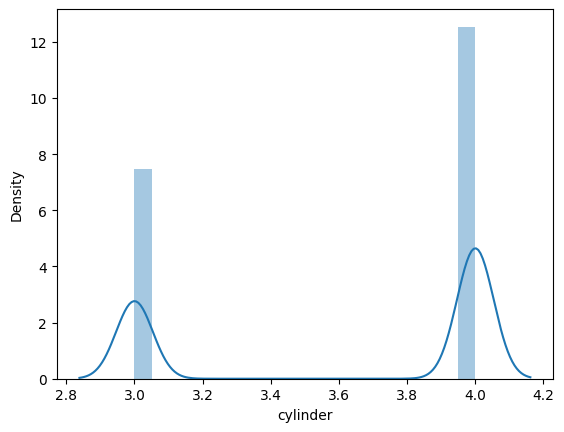

gear_box


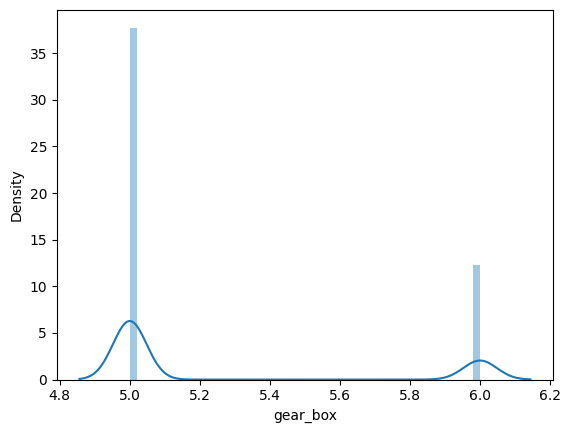

turning_radius


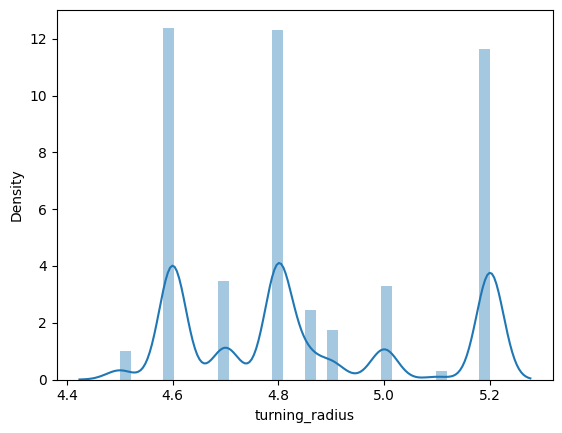

length


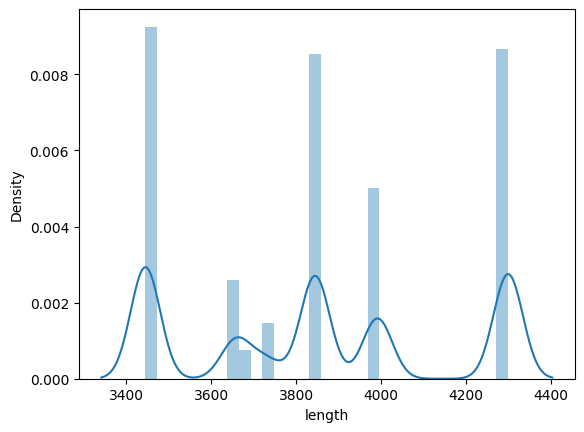

width


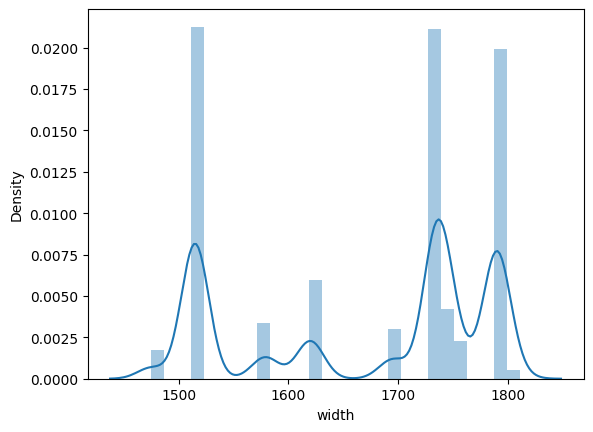

height


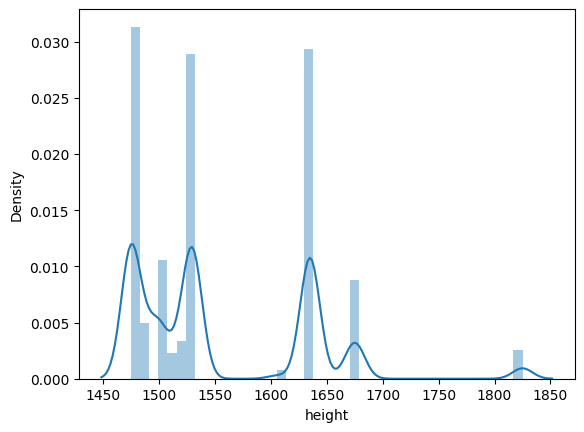

gross_weight


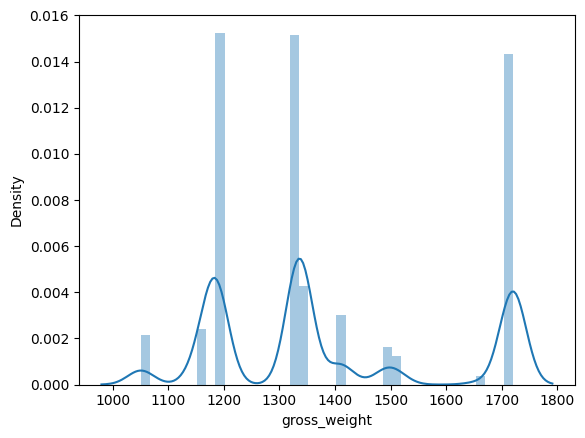

ncap_rating


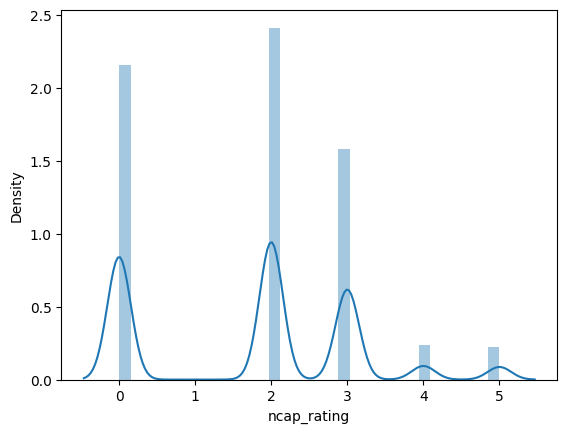

is_claim


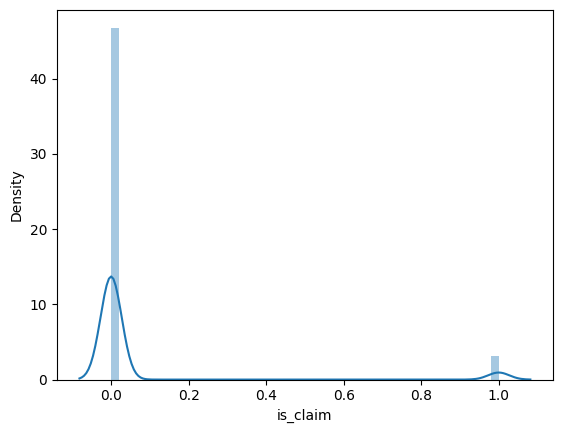

In [ ]:
for feature in list(df_eda.select_dtypes(exclude=["object", "category"]).columns)[:]:
    print(feature)
    distplots(df_eda, feature)

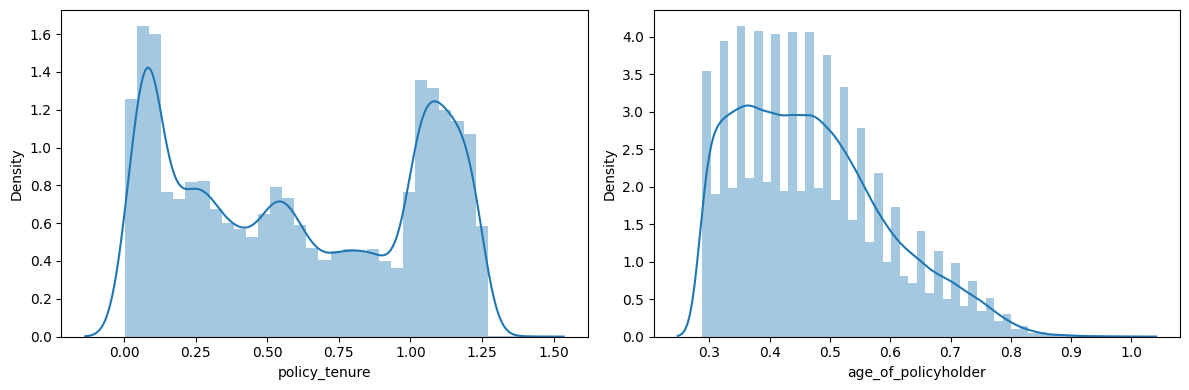

In [ ]:
# Univariate for policy_tenure and age_of_policyholder

fig, ax = plt.subplots(1,2,figsize=(12,4), dpi=100)

sns.distplot(df_eda["policy_tenure"], ax = ax[0])
sns.distplot(df_eda["age_of_policyholder"], ax = ax[1])

plt.tight_layout()
plt.show()

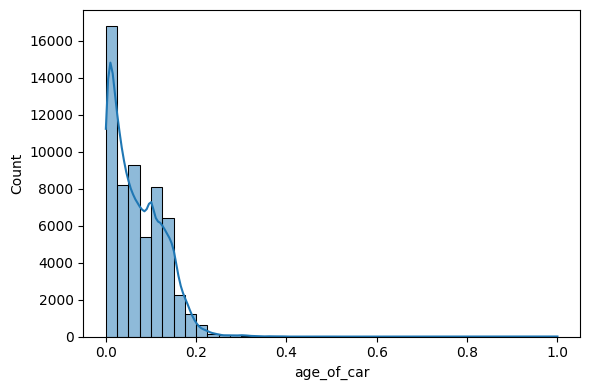

In [ ]:
# Univariate for age_of_car

plt.figure(figsize=(6,4),dpi=100)
sns.histplot(x = "age_of_car", data = df_eda , bins=40, stat='count', kde=True)

plt.tight_layout()
plt.show()

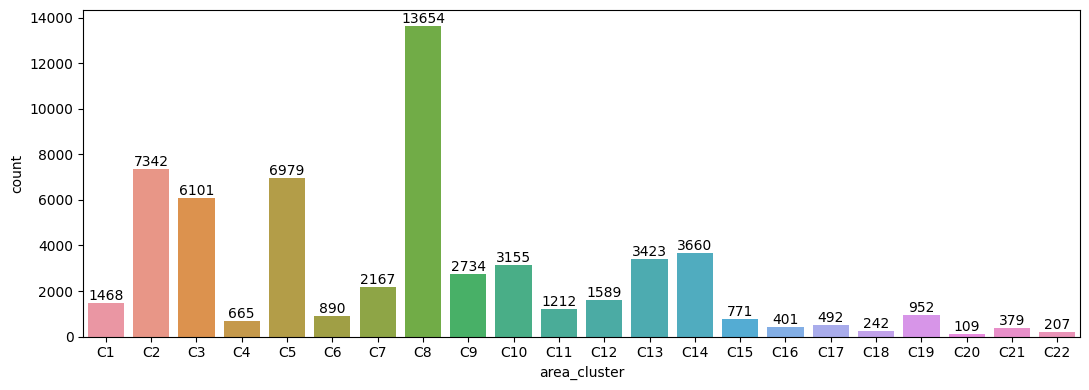

In [ ]:
# Univariate for area_cluster

plt.figure(figsize=(11,4),dpi=100)

ax = sns.countplot(x="area_cluster", data=df_eda)
for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

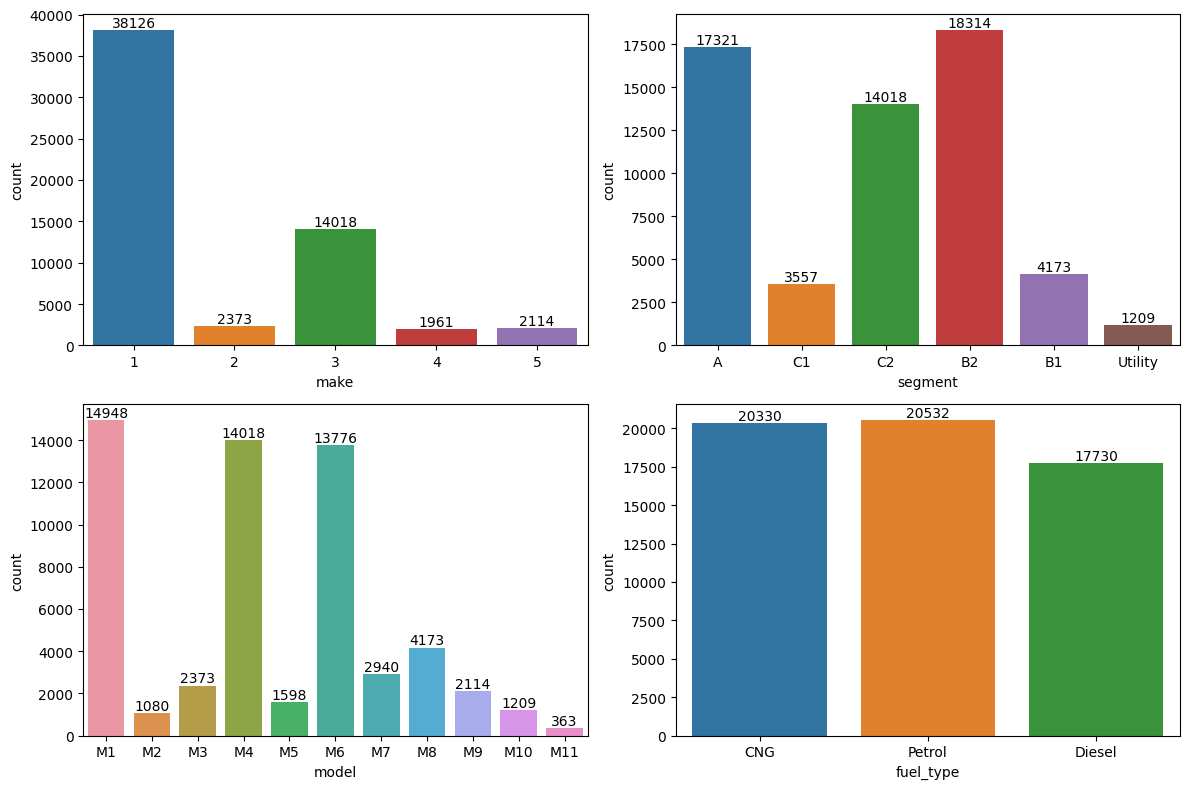

In [ ]:
# # Univariate for make, segment, model, fuel_type

fig, ax = plt.subplots(2,2,figsize=(12,8), dpi=100)

ax1 = sns.countplot(x="make", data=df_eda, ax = ax[0, 0])
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sns.countplot(x="segment", data=df_eda, ax = ax[0, 1])
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sns.countplot(x="model", data=df_eda, ax = ax[1, 0])
for i in ax3.containers:
    ax3.bar_label(i)

ax4 = sns.countplot(x="fuel_type", data=df_eda, ax = ax[1, 1])
for i in ax4.containers:
    ax4.bar_label(i)

plt.tight_layout()
plt.show()

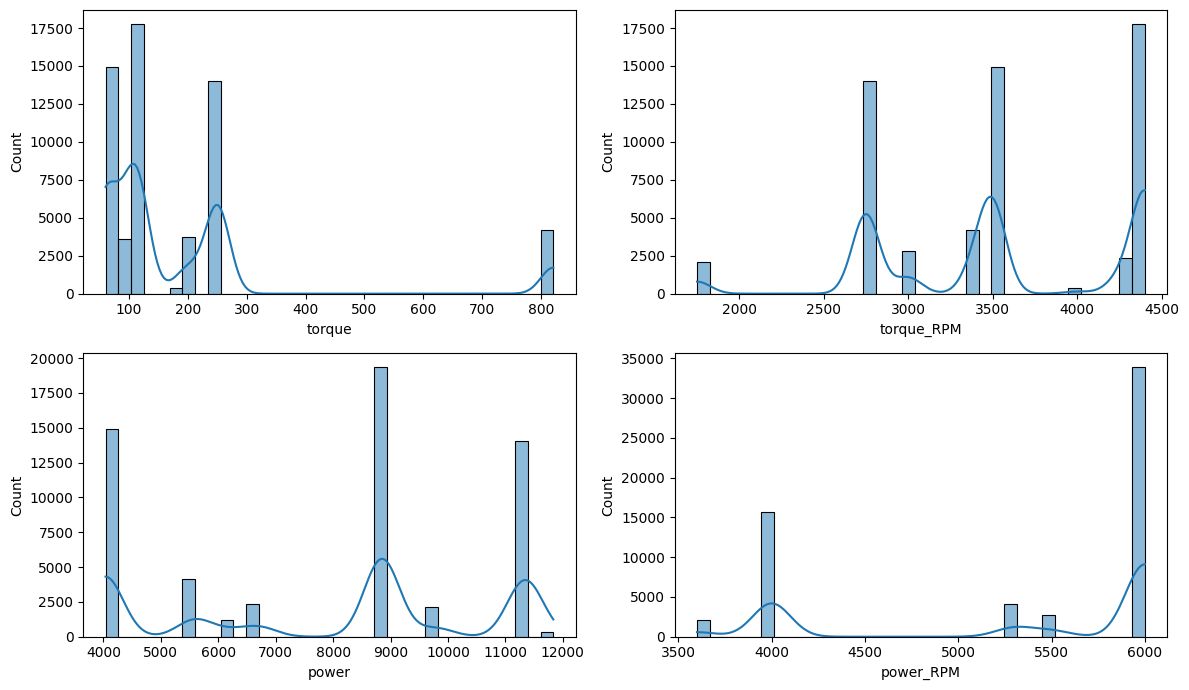

In [ ]:
# Univariate for max_torque, max_power,  engine_type, displacement

fig, ax = plt.subplots(2,2,figsize=(12,7), dpi=100)

sns.histplot(df1["torque"], bins = 35, kde = True, ax = ax[0, 0])
sns.histplot(df1["torque_RPM"], bins = 35, kde = True, ax = ax[0, 1])
sns.histplot(df1["power"], bins = 35, kde = True, ax = ax[1, 0])
sns.histplot(df1["power_RPM"], bins = 35, kde = True, ax = ax[1, 1])

plt.tight_layout()
plt.show()

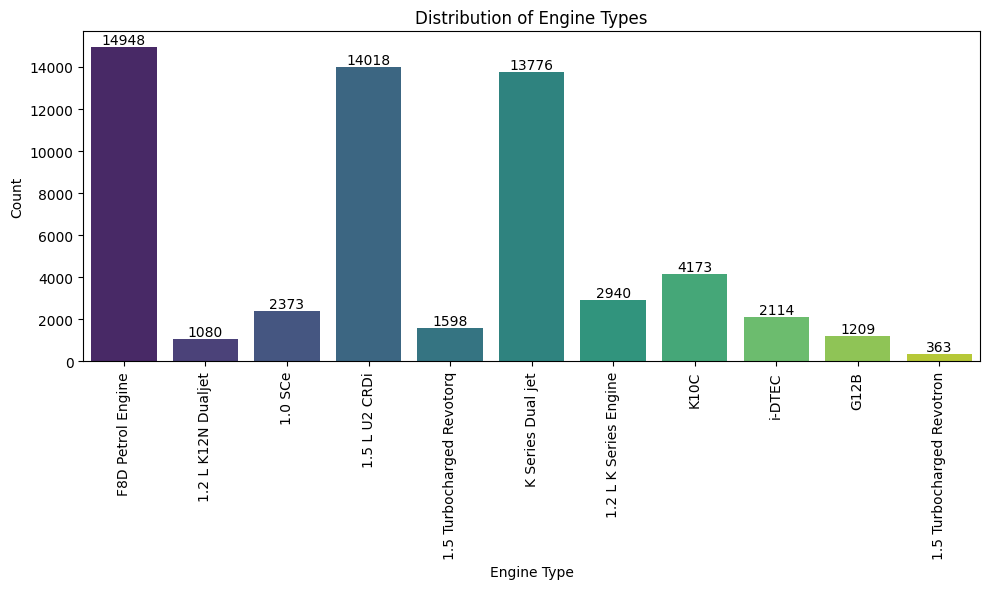

In [ ]:
# Univariate for engine_type

plt.figure(figsize=(10, 6))

ax = sns.countplot(x="engine_type", data=df_eda, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Engine Types")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
plt.show()

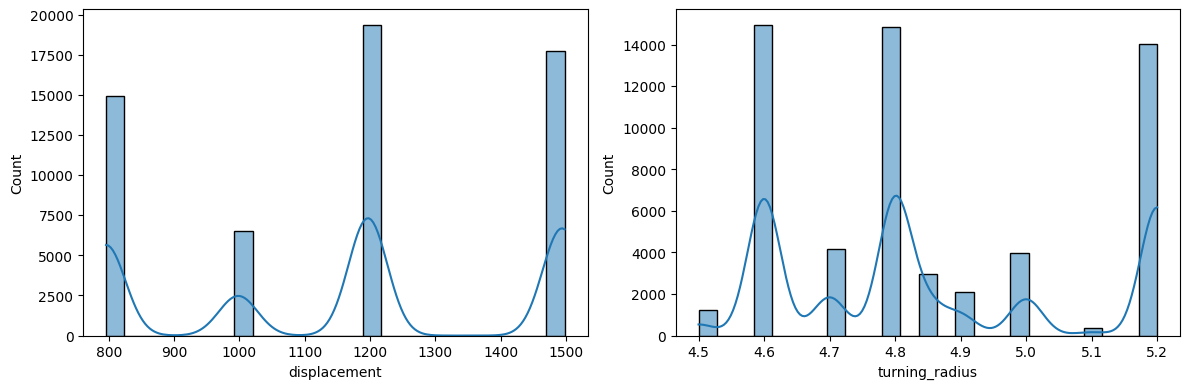

In [ ]:
# Univariate for displacement

fig, ax = plt.subplots(1,2,figsize=(12,4), dpi=100)

sns.histplot(df_eda["displacement"], bins = 25, kde = True, ax = ax[0])
sns.histplot(df_eda["turning_radius"], bins = 25, kde = True, ax = ax[1])

plt.tight_layout()
plt.show()

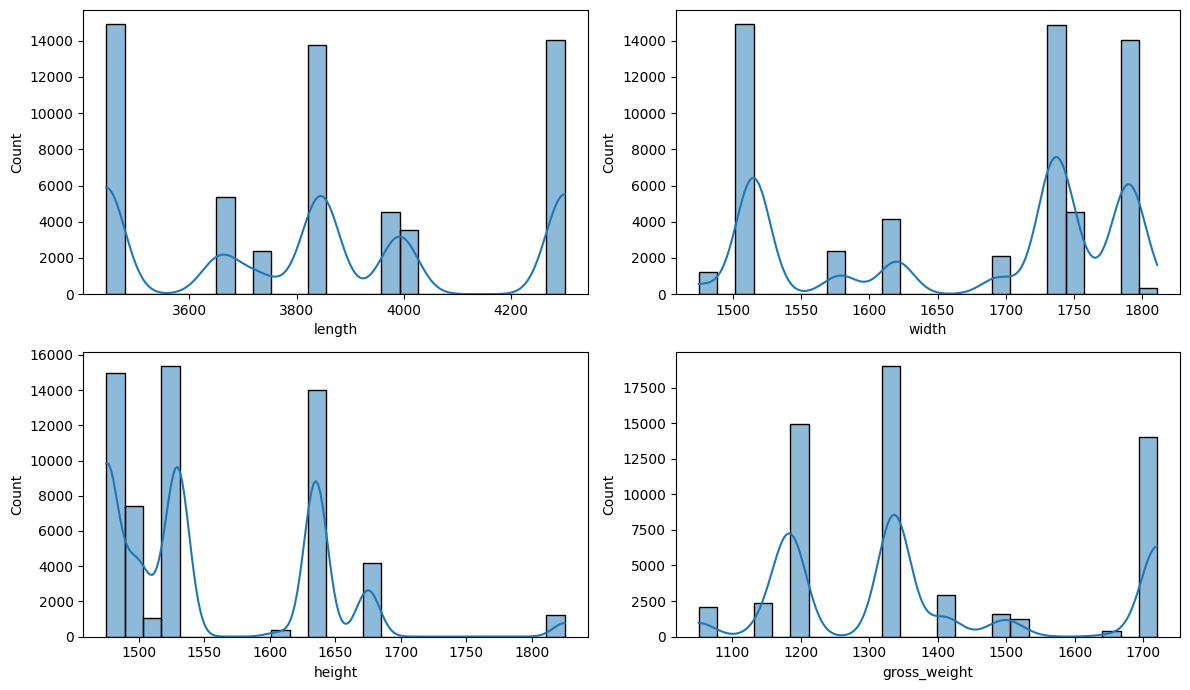

In [ ]:
# Univariate for length, width, height, gross_weight

fig, ax = plt.subplots(2,2,figsize=(12,7), dpi=100)

sns.histplot(df_eda["length"], bins = 25, kde = True, ax = ax[0, 0])
sns.histplot(df_eda["width"], bins = 25, kde = True, ax = ax[0, 1])
sns.histplot(df_eda["height"], bins = 25, kde = True, ax = ax[1, 0])
sns.histplot(df_eda["gross_weight"], bins = 25, kde = True, ax = ax[1, 1])

plt.tight_layout()
plt.show()

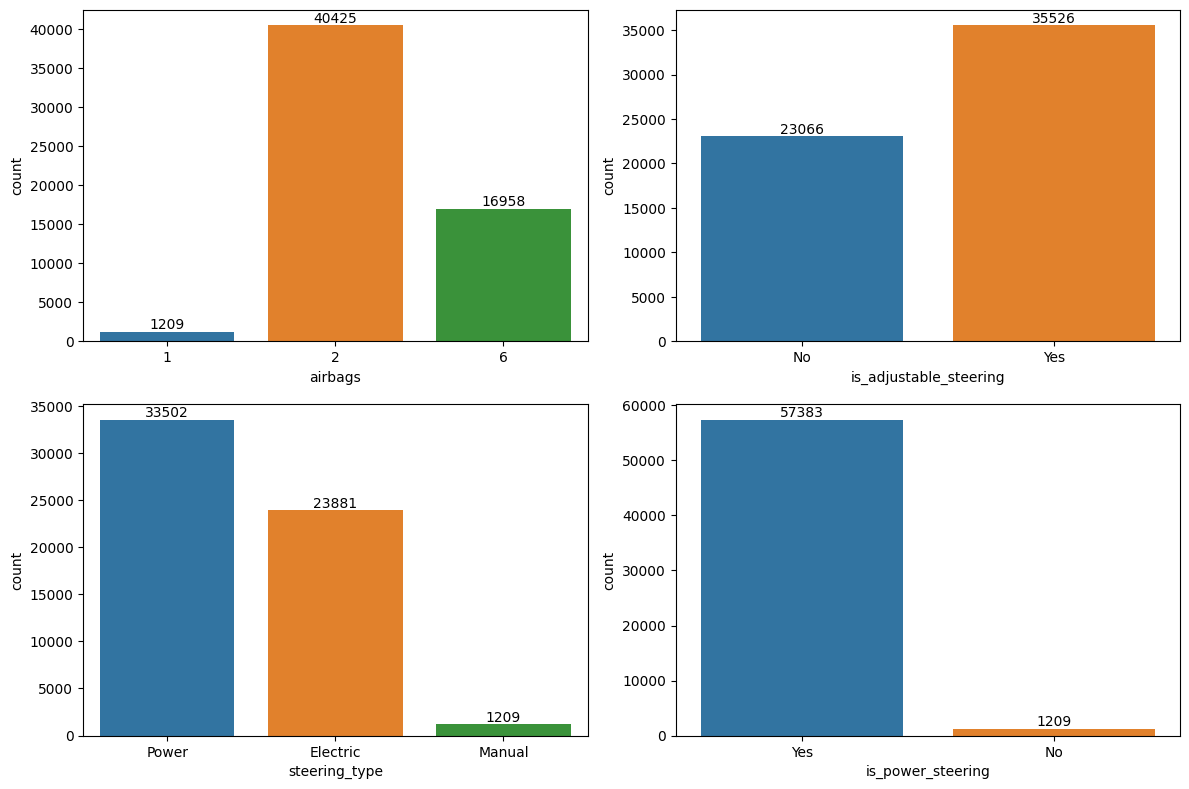

In [ ]:
# Univariate for airbags, is_adjustable_steering, steering_type, is_power_steering

fig, ax = plt.subplots(2,2,figsize=(12,8), dpi=100)

ax1 = sns.countplot(x="airbags", data=df_eda, ax = ax[0, 0])
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sns.countplot(x="is_adjustable_steering", data=df_eda, ax = ax[0, 1])
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sns.countplot(x="steering_type", data=df_eda, ax = ax[1, 0])
for i in ax3.containers:
    ax3.bar_label(i)

ax4 = sns.countplot(x="is_power_steering", data=df_eda, ax = ax[1, 1])
for i in ax4.containers:
    ax4.bar_label(i)

plt.tight_layout()
plt.show()

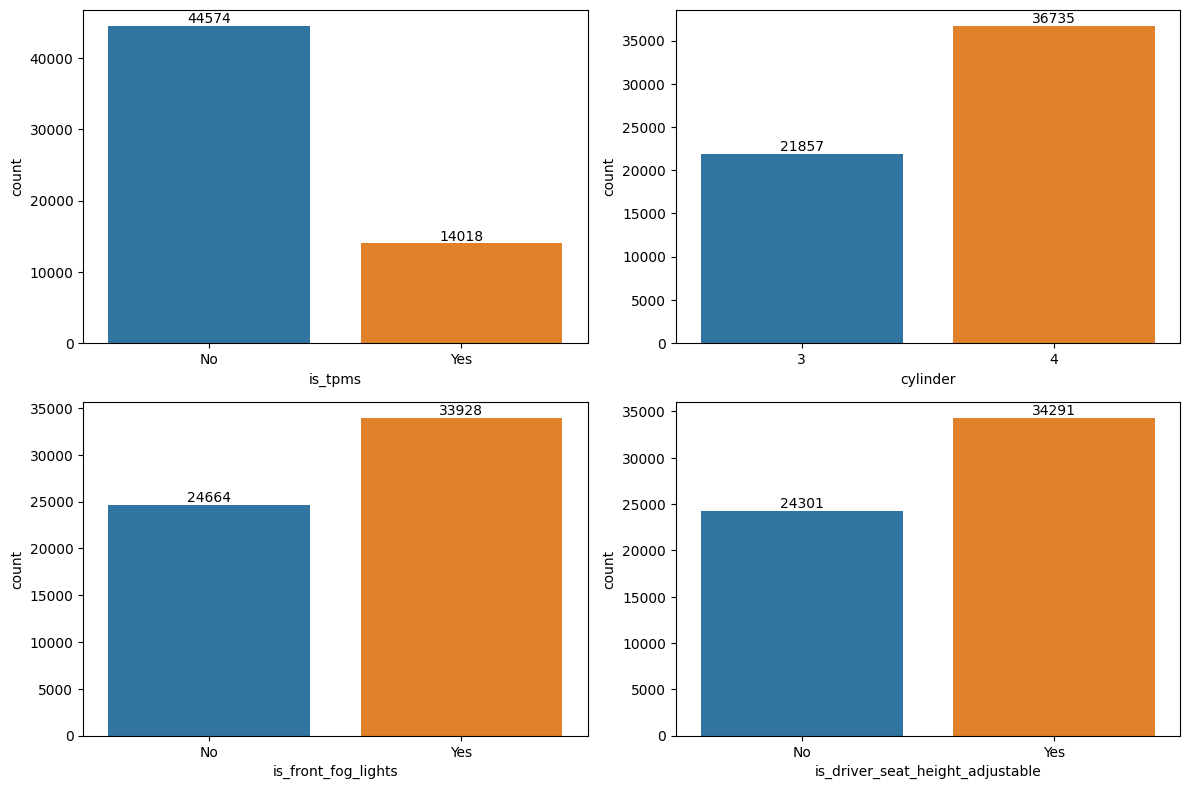

In [ ]:
# Univariate for is_tpms, cylinder, is_front_fog_lights, is_driver_seat_height_adjustable

fig, ax = plt.subplots(2,2,figsize=(12,8), dpi=100)

ax1 = sns.countplot(x="is_tpms", data=df_eda, ax = ax[0, 0])
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sns.countplot(x="cylinder", data=df_eda, ax = ax[0, 1])
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sns.countplot(x="is_front_fog_lights", data=df_eda, ax = ax[1, 0])
for i in ax3.containers:
    ax3.bar_label(i)

ax4 = sns.countplot(x="is_driver_seat_height_adjustable", data=df_eda, ax = ax[1, 1])
for i in ax4.containers:
    ax4.bar_label(i)

plt.tight_layout()
plt.show()

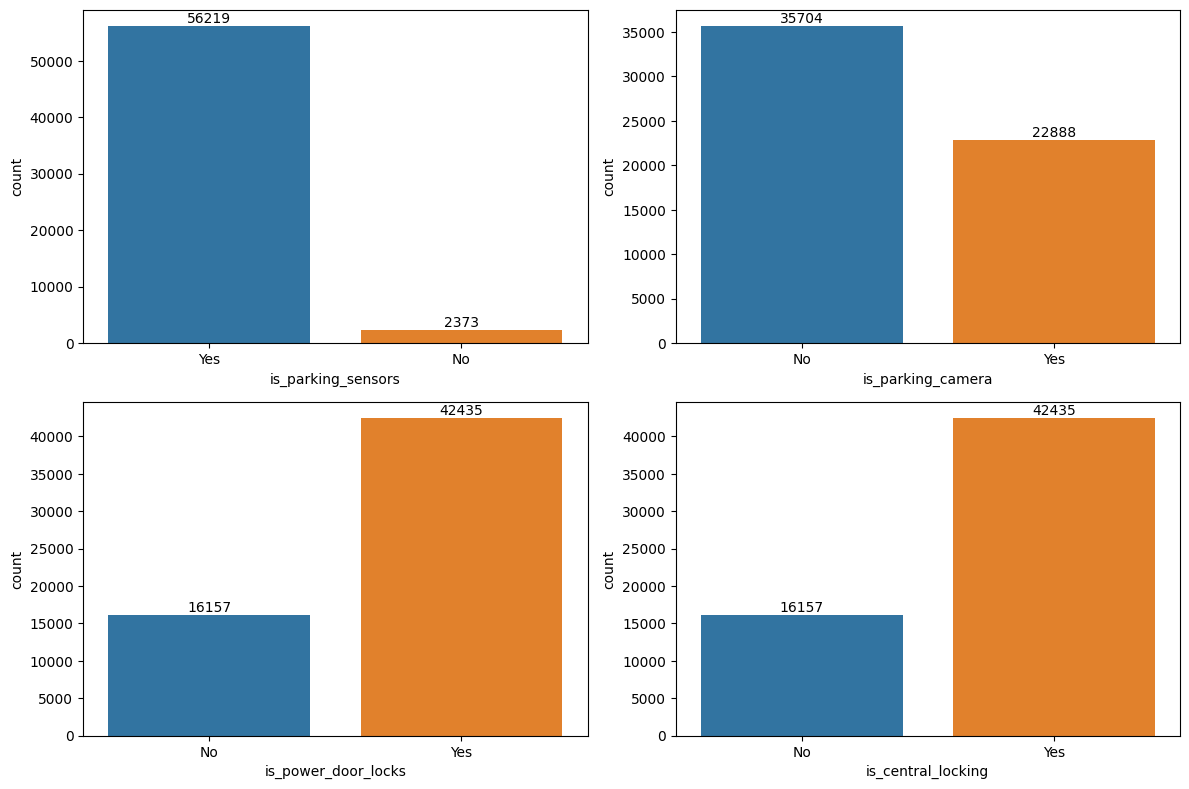

In [ ]:
# Univariate for is_parking_sensors, is_parking_camera, is_power_door_locks, is_central_locking

fig, ax = plt.subplots(2,2,figsize=(12,8), dpi=100)

ax1 = sns.countplot(x="is_parking_sensors", data=df_eda, ax = ax[0, 0])
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sns.countplot(x="is_parking_camera", data=df_eda, ax = ax[0, 1])
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sns.countplot(x="is_power_door_locks", data=df_eda, ax = ax[1, 0])
for i in ax3.containers:
    ax3.bar_label(i)

ax4 = sns.countplot(x="is_central_locking", data=df_eda, ax = ax[1, 1])
for i in ax4.containers:
    ax4.bar_label(i)

plt.tight_layout()
plt.show()

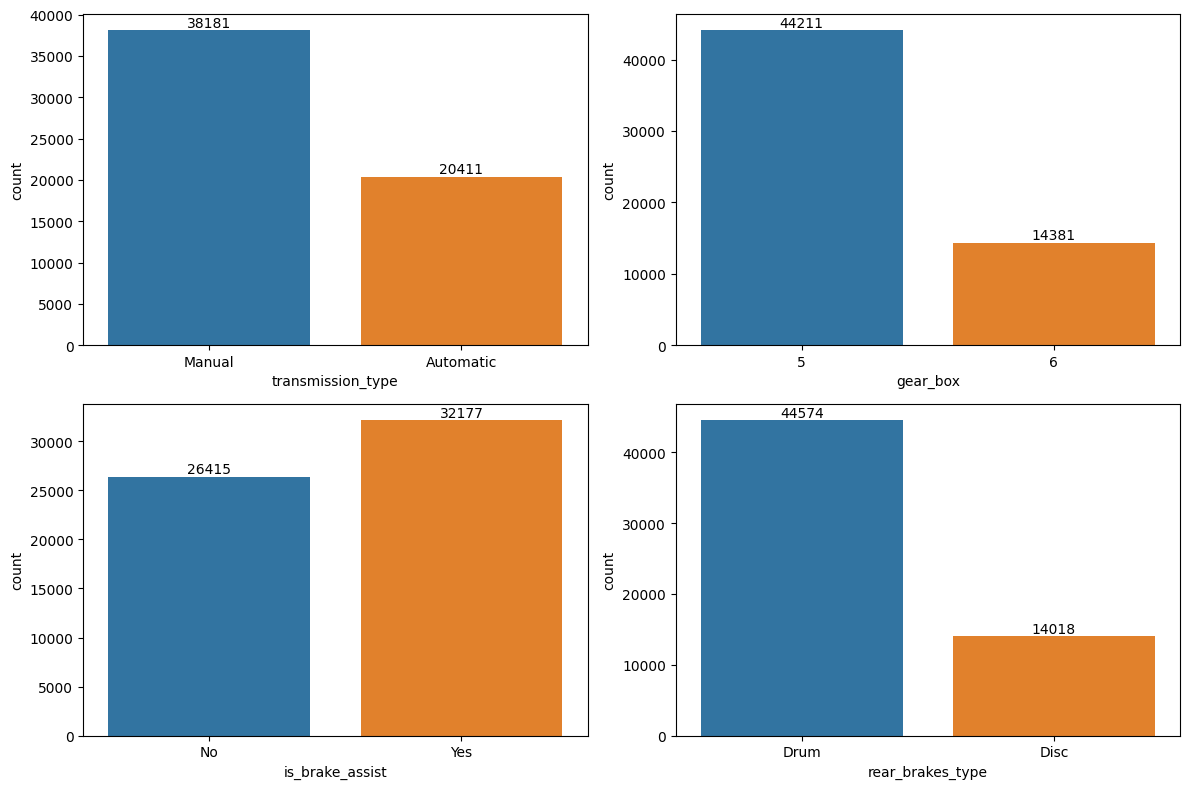

In [ ]:
# Univariate for transmission_type, gear_box, rear_brakes_type, is_brake_assist

fig, ax = plt.subplots(2,2,figsize=(12,8), dpi=100)

ax1 = sns.countplot(x="transmission_type", data=df_eda, ax = ax[0, 0])
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sns.countplot(x="gear_box", data=df_eda, ax = ax[0, 1])
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sns.countplot(x="is_brake_assist", data=df_eda, ax = ax[1, 0])
for i in ax3.containers:
    ax3.bar_label(i)

ax4 = sns.countplot(x="rear_brakes_type", data=df_eda, ax = ax[1, 1])
for i in ax4.containers:
    ax4.bar_label(i)

plt.tight_layout()
plt.show()

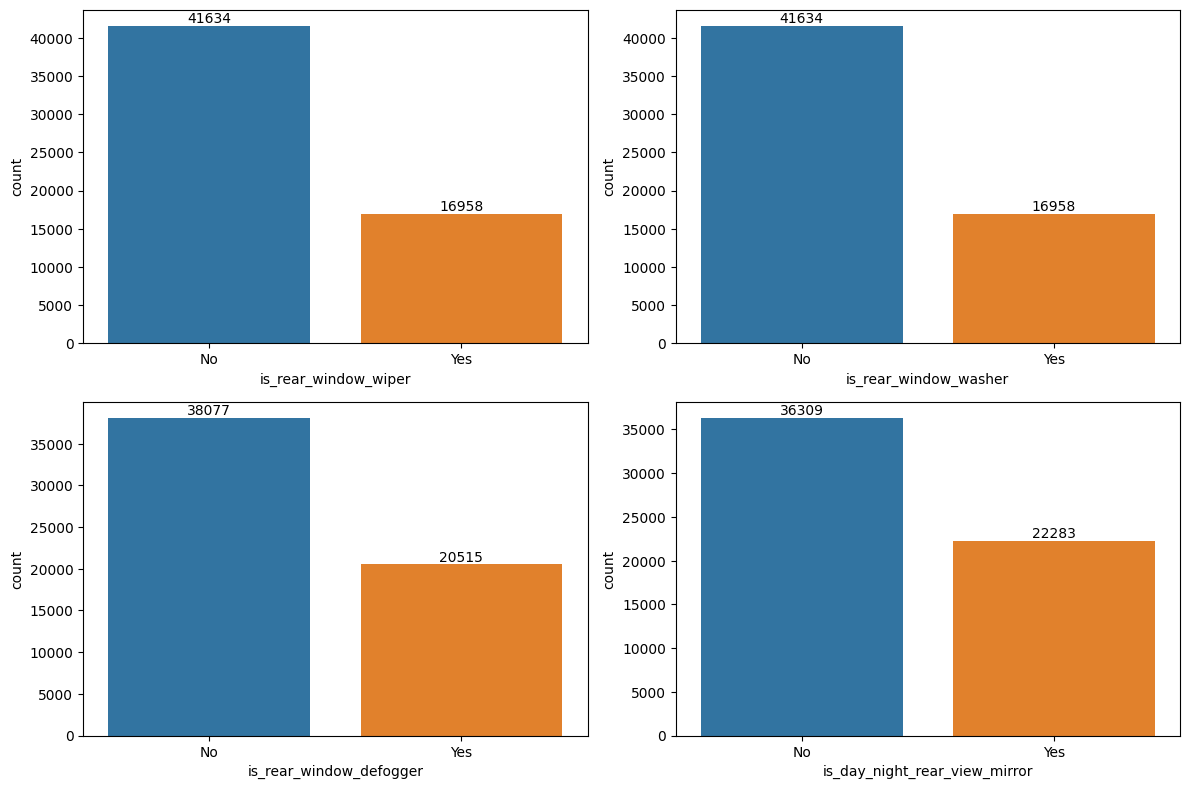

In [ ]:
# Univariate for is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_day_night_rear_view_mirror

fig, ax = plt.subplots(2,2,figsize=(12,8), dpi=100)

ax1 = sns.countplot(x="is_rear_window_wiper", data=df_eda, ax = ax[0, 0])
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sns.countplot(x="is_rear_window_washer", data=df_eda, ax = ax[0, 1])
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sns.countplot(x="is_rear_window_defogger", data=df_eda, ax = ax[1, 0])
for i in ax3.containers:
    ax3.bar_label(i)

ax4 = sns.countplot(x="is_day_night_rear_view_mirror", data=df_eda, ax = ax[1, 1])
for i in ax4.containers:
    ax4.bar_label(i)

plt.tight_layout()
plt.show()

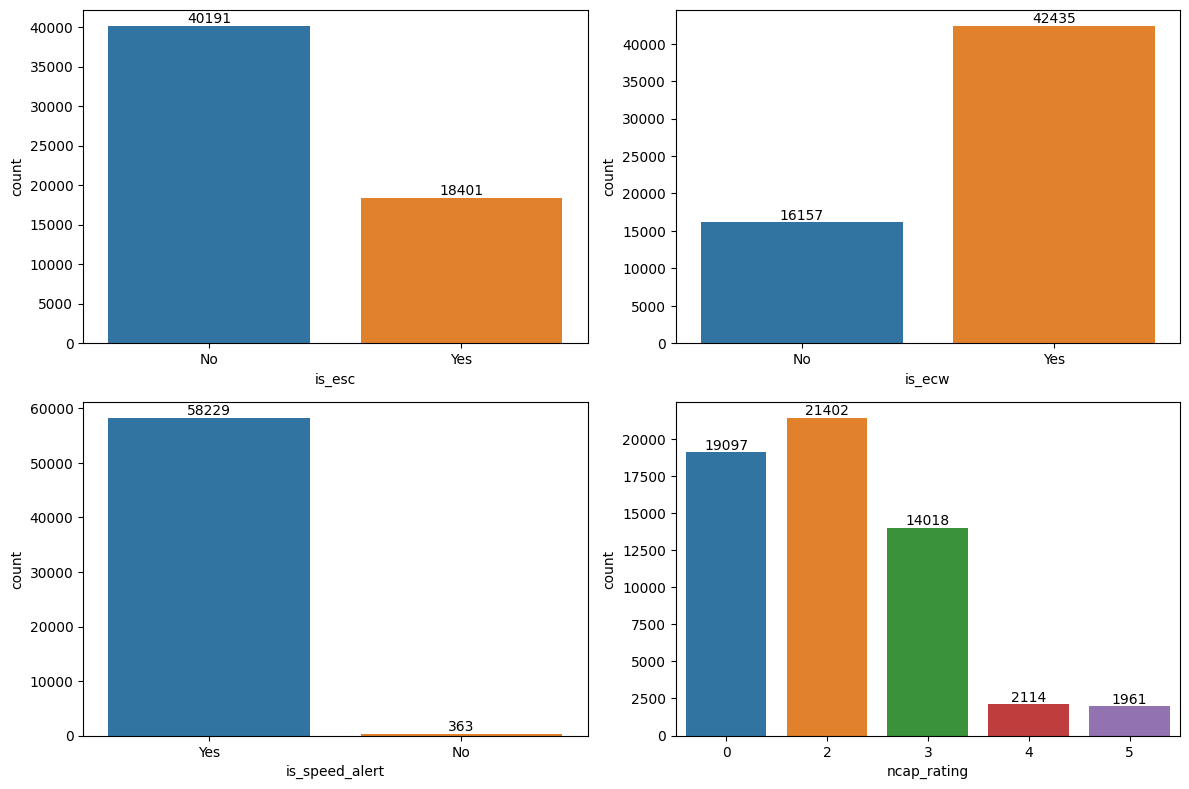

In [ ]:
# Univariate for is_esc, is_ecw, is_speed_alert, ncap_rating

fig, ax = plt.subplots(2,2,figsize=(12,8), dpi=100)

ax1 = sns.countplot(x="is_esc", data=df_eda, ax = ax[0, 0])
for i in ax1.containers:
    ax1.bar_label(i)

ax2 = sns.countplot(x="is_ecw", data=df_eda, ax = ax[0, 1])
for i in ax2.containers:
    ax2.bar_label(i)

ax3 = sns.countplot(x="is_speed_alert", data=df_eda, ax = ax[1, 0])
for i in ax3.containers:
    ax3.bar_label(i)

ax4 = sns.countplot(x="ncap_rating", data=df_eda, ax = ax[1, 1])
for i in ax4.containers:
    ax4.bar_label(i)

plt.tight_layout()
plt.show()

## Bi-Variate Analysis

In [ ]:
df_eda.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

### Age of Car vs. Claim

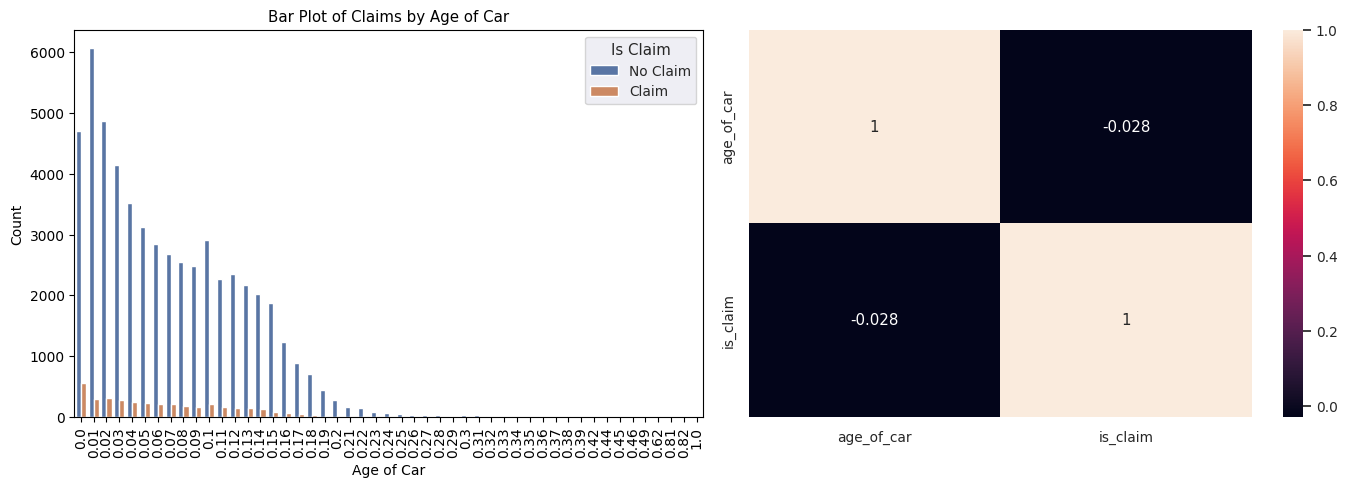

In [ ]:
# Age of Car vs. is_claim

fig = plt.figure(figsize=(13, 5), dpi=100)

ax = fig.add_subplot(121)
sns.set(font_scale=0.9)

ax1 = sns.countplot(data = df_eda, x = 'age_of_car', hue = 'is_claim')

ax.set_title("Bar Plot of Claims by Age of Car")
ax.set_xlabel("Age of Car")
ax.set_ylabel("Count")
plt.xticks(rotation = 90)
ax.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

# HeatMap
ax = fig.add_subplot(122)
sns.set(font_scale=0.9)

car_age_claim_hm = df_eda[["age_of_car", "is_claim"]].corr()
sns.heatmap(car_age_claim_hm, annot = True, fmt='.2g')

fig.set_figwidth(14)
plt.tight_layout()
plt.show()

- **Age of Car and Claims are negatively correlated.**
- Lower car age claims are higher as compared to that of higher car age.

### policy_tenure vs. is_claim

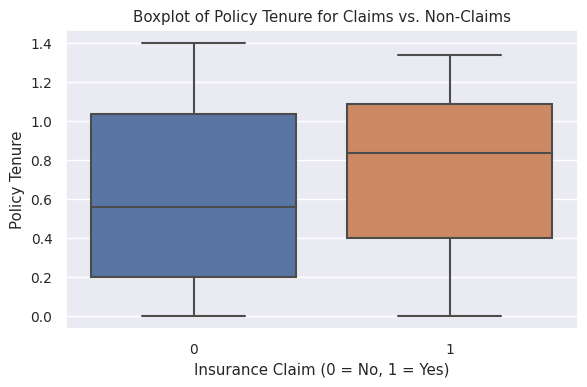

In [ ]:
# policy_tenure vs is_claim

plt.figure(figsize=(6,4),dpi=100)
sns.boxplot(x = "is_claim", y = 'policy_tenure', data = df_eda)

plt.title("Boxplot of Policy Tenure for Claims vs. Non-Claims")
plt.xlabel("Insurance Claim (0 = No, 1 = Yes)")
plt.ylabel("Policy Tenure")

plt.tight_layout()
plt.show()

- The majority of policyholders who did not file an insurance claim (claim=0) have shorter policy tenures, with a median value that falls closer to the lower end of the interquartile range (IQR).
- This suggests that **policyholders who didn't make claims tend to have relatively short policy tenures.**
- Policyholders who filed insurance claims (claim=1) have, on average, longer policy tenures compared to those who didn't make claims.
- The median policy tenure for claimants is closer to the upper end of the IQR, suggesting that a **significant portion of policyholders who made claims tend to have longer policy tenures.**

### age_of_policyholder vs. is_claim

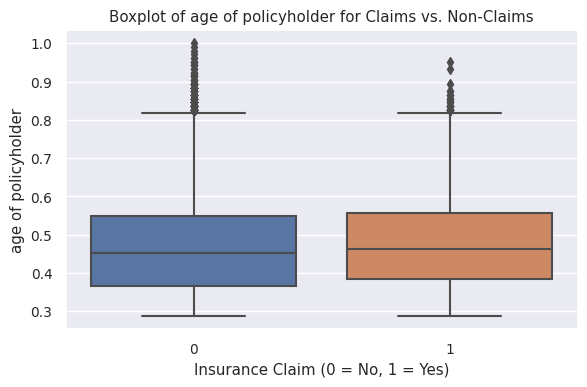

In [ ]:
# age_of_policyholder vs is_claim

plt.figure(figsize=(6,4),dpi=100)
sns.boxplot(x = "is_claim", y = 'age_of_policyholder', data = df_eda)

plt.title("Boxplot of age of policyholder for Claims vs. Non-Claims")
plt.xlabel("Insurance Claim (0 = No, 1 = Yes)")
plt.ylabel("age of policyholder")

plt.tight_layout()
plt.show()

- The boxplots suggest that while the median ages are similar for both groups, there are some older policyholders in the "No Claim" category with exceptionally high ages as compared to "Yes Claim" category.
- This suggests that **older policyholders are less likely to claim as compared to that of younger policyholders.**

### policy_tenure vs. age_of_policyholder

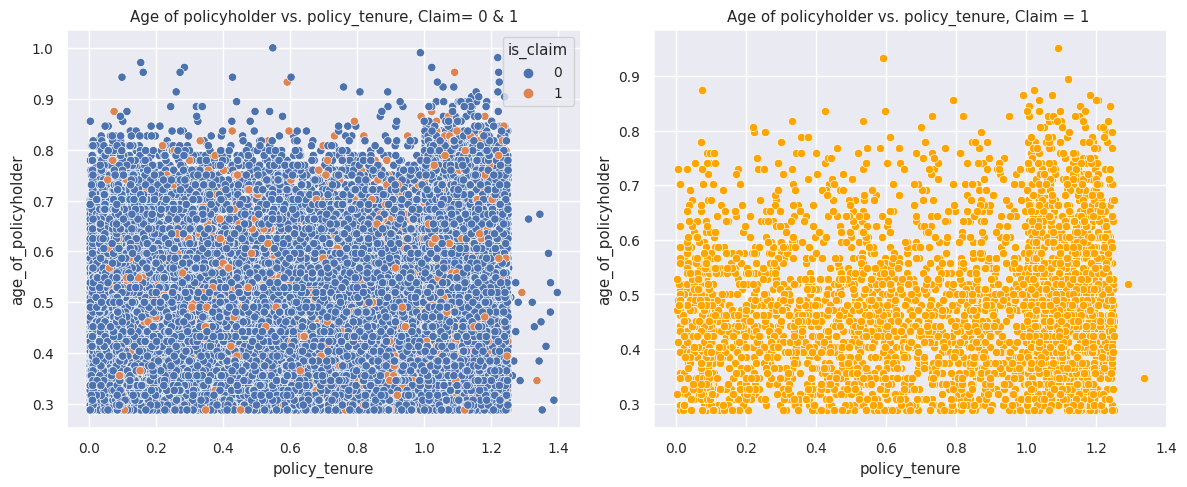

In [ ]:
# policy_tenure vs age_of_policyholder

fig, ax = plt.subplots(1,2, figsize=(12,5), dpi=100)

sns.scatterplot(x = 'policy_tenure', y = 'age_of_policyholder', data = df_eda, hue = "is_claim", ax = ax[0])
ax[0].set_title("Age of policyholder vs. policy_tenure, Claim= 0 & 1")
ax[0].grid(True)

df1_claimed = df_eda[df_eda['is_claim'] == 1]
sns.scatterplot(x = 'policy_tenure', y = 'age_of_policyholder', data = df1_claimed, color = "orange", ax = ax[1])
ax[1].set_title("Age of policyholder vs. policy_tenure, Claim = 1 ")
ax[1].grid(True)

plt.tight_layout()
plt.show()

- so, overall here we can observe that **younger policyholders with long policy tenure are claiming for the policy as compared to older policyholder with short policy tenure.**

### population_density vs. is_claim

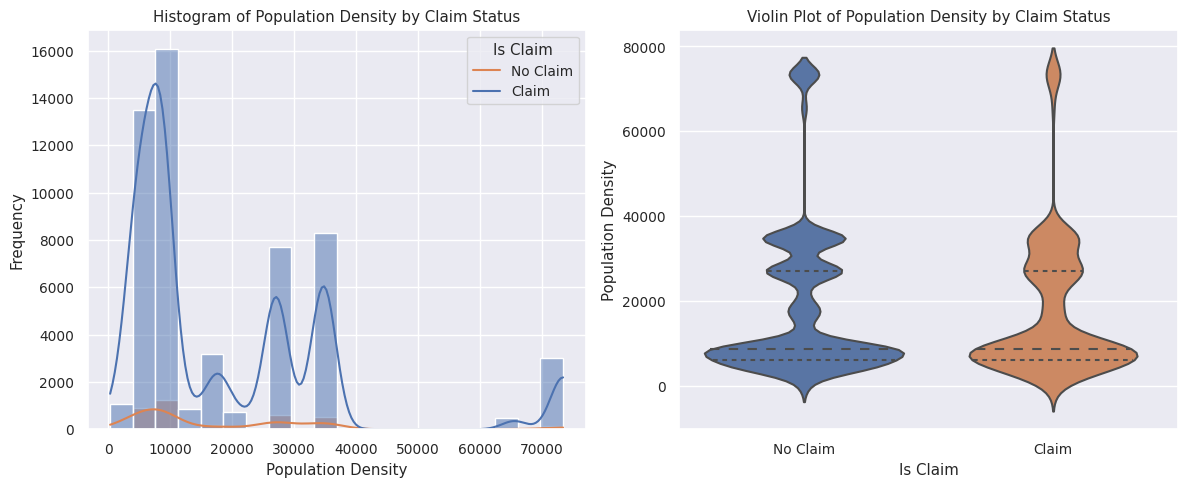

In [ ]:
# population_density vs. is_claim

fig, ax = plt.subplots(1,2, figsize=(12,5), dpi=100)

sns.histplot(data = df_eda, x = 'population_density', hue = 'is_claim', bins = 20, kde=True, ax = ax[0])
ax[0].set_title("Histogram of Population Density by Claim Status")
ax[0].set_xlabel("Population Density")
ax[0].set_ylabel("Frequency")
ax[0].legend(title='Is Claim', labels=['No Claim', 'Claim'])

sns.violinplot(x = 'is_claim', y = 'population_density', data = df_eda, inner="quart", ax = ax[1])
ax[1].set_title("Violin Plot of Population Density by Claim Status")
ax[1].set_xlabel("Is Claim")
ax[1].set_ylabel("Population Density")
ax[1].set_xticks([0, 1], ["No Claim", "Claim"])

plt.tight_layout()
plt.show()

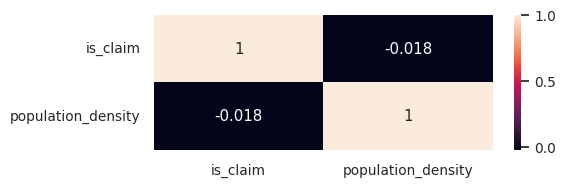

In [ ]:
plt.figure(figsize=(6,2), dpi=100)

pd_c = df_eda[["is_claim", "population_density"]].corr()
sns.heatmap(pd_c, annot = True, fmt='.2g')

plt.tight_layout()
plt.show()

- There is **negative relation** between **population density and is_claim feature.**
- **Less or near average population density areas** ---> **More claims**
- **High population density areas** ---> **Less claims**

### area_cluster vs. population_density

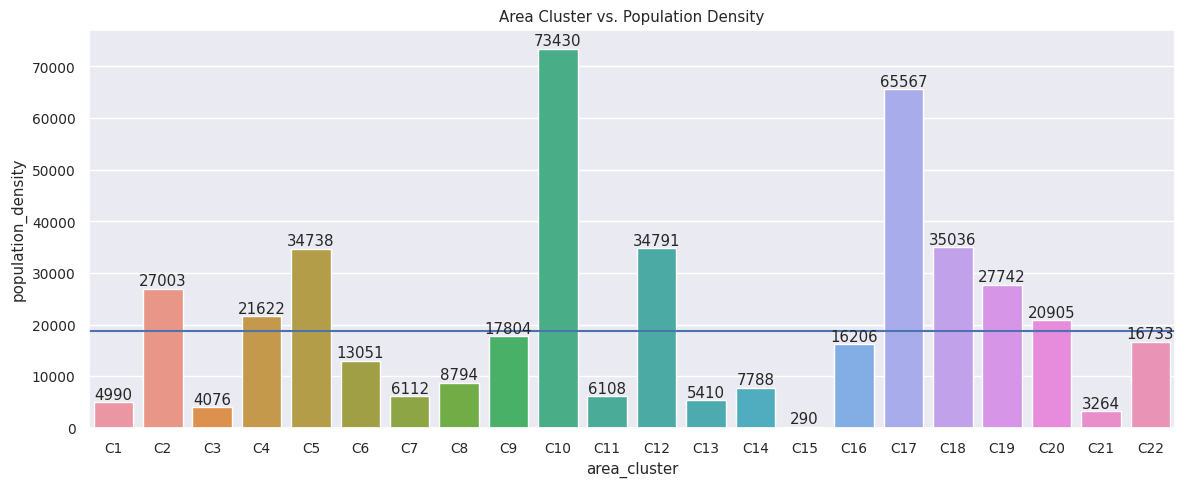

In [ ]:
# area_cluster vs population_density

plt.figure(figsize = (12,5), dpi=100)

ax1 = sns.barplot(x = 'area_cluster', y = 'population_density', data = df_eda, order = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22"])
for i in ax1.containers:
    ax1.bar_label(i)

plt.axhline(y = df_eda["population_density"].mean())

plt.title("Area Cluster vs. Population Density")

plt.tight_layout()
plt.show()

- As per the plot, Area C10 and C17 are among high population density areas.
- The less Population density areas are C3, C7, C8.

### Area Cluster vs. Age of Policyholder.

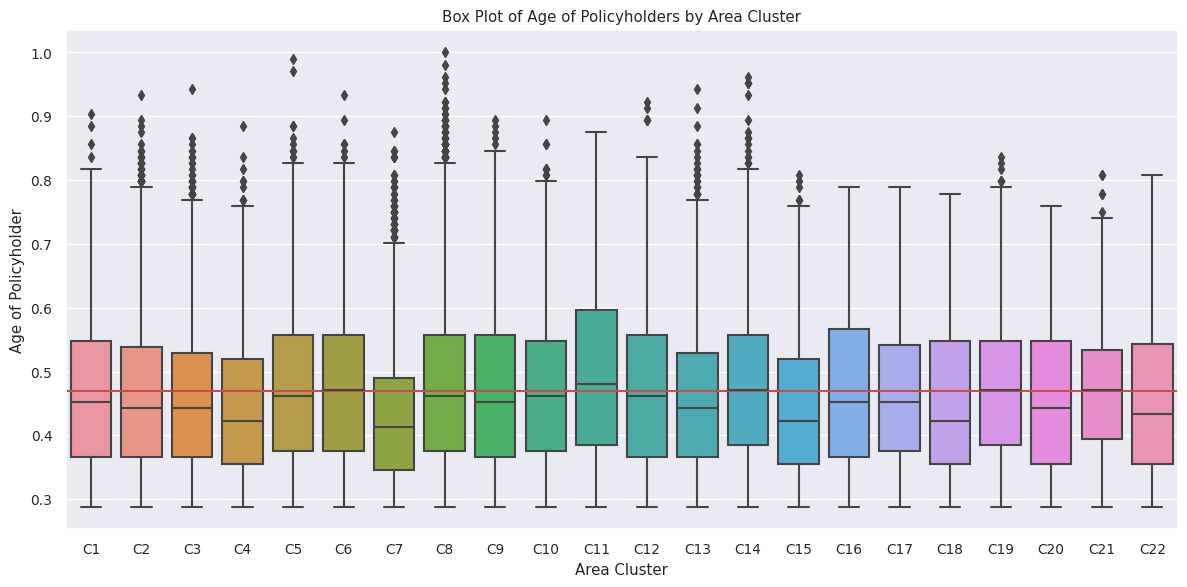

In [ ]:
# Area Cluster vs. Age of Policyholder

plt.figure(figsize=(12, 6))
sns.boxplot(x='area_cluster', y='age_of_policyholder', data=df_eda)

plt.axhline(y = df_eda["age_of_policyholder"].mean(), color='r')

plt.title("Box Plot of Age of Policyholders by Area Cluster")
plt.xlabel("Area Cluster")
plt.ylabel("Age of Policyholder")

plt.tight_layout()
plt.show()

- Almost every area is having young policyholder which are below average age.
- **Area C16, C17, C18, C20, C22 are having no extreme older policyholder and all of them are having below average age policyholder. Also, there are very less claims from these areas.**
- **So, we can say that population of these areas are sensible and having good sense of driving and maybe we can offer them comparatively less premiumns for their policies.**

### area_cluster vs. is_claim

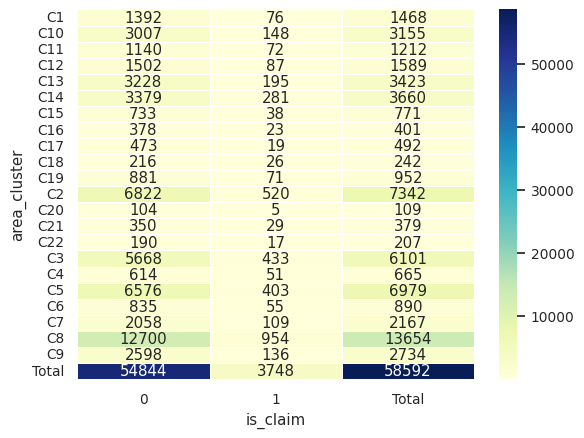

In [ ]:
cross_tab_area_claim = pd.crosstab(df_eda['area_cluster'], df_eda['is_claim'], margins=True, margins_name='Total')
sns.heatmap(cross_tab_area_claim, annot=True, cmap='YlGnBu', fmt='d', cbar=True, linewidths=.5)
plt.show()

- From all the areas, **C8 is area with the highest claims followed by C2, C3, C5.**
- **C20 is area with the lowest claims followed by C22, C17.**

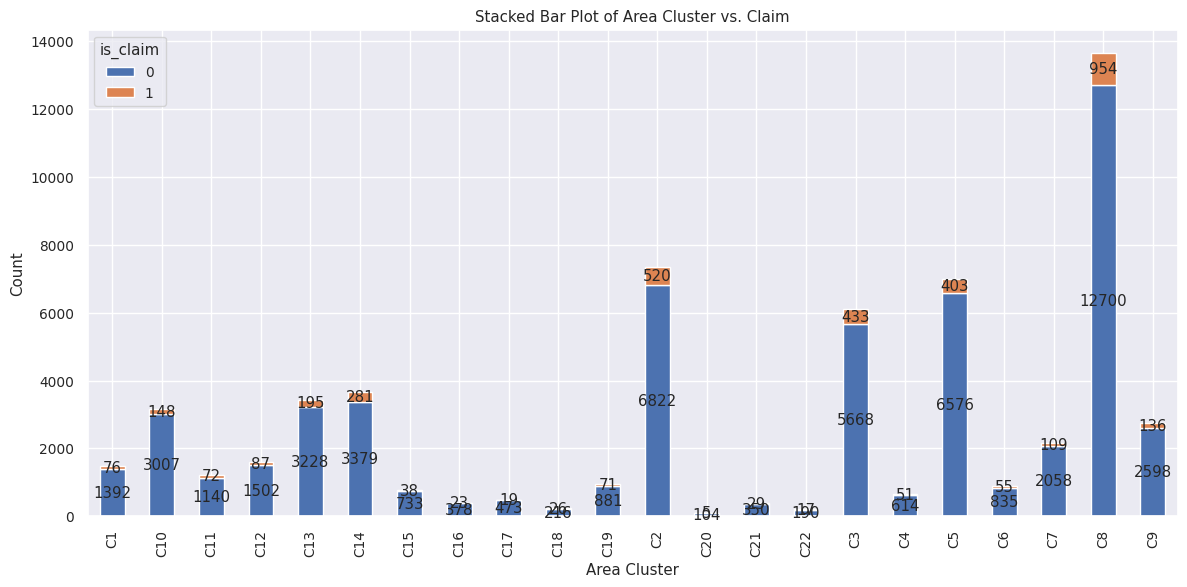

In [ ]:
# Create a stacked bar plot
cross_tab_area_claims = pd.crosstab(df_eda['area_cluster'], df_eda['is_claim'])
ax = cross_tab_area_claims.plot(kind='bar', stacked=True, figsize=(12, 6))
for i in ax.containers:
    ax.bar_label(i, label_type='center', padding=0)

plt.title("Stacked Bar Plot of Area Cluster vs. Claim")
plt.xlabel("Area Cluster")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- From all the areas, **C8 is area with the highest claims followed by C2, C3, C5.**
- **We can target these areas and can offer more premiumns for their policies.**

### Area Cluster vs. Make

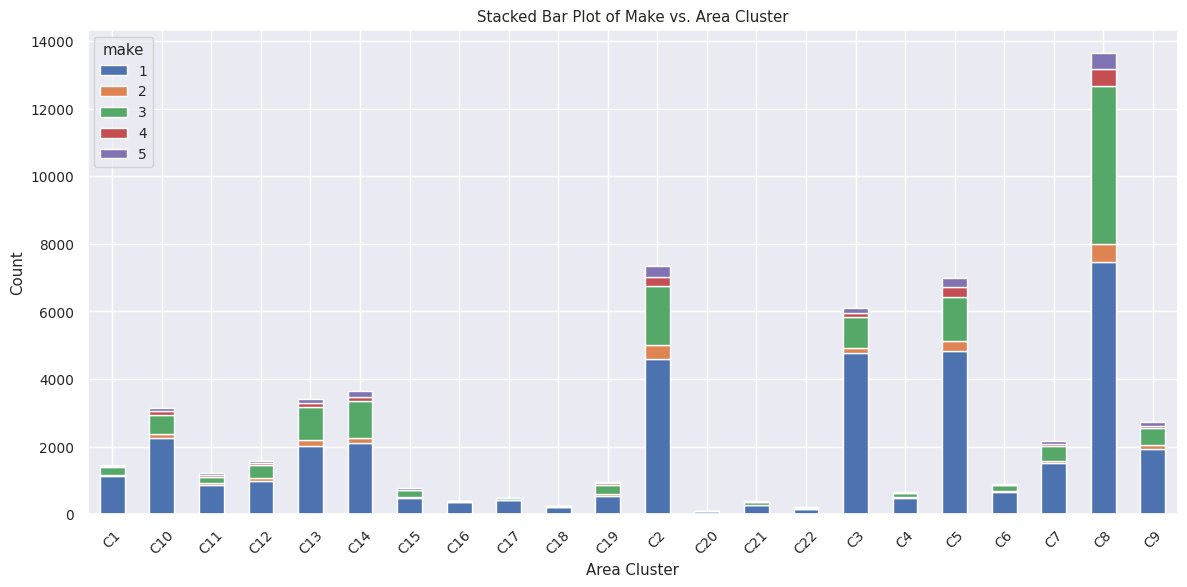

In [ ]:
# Create a cross-tabulation between make and area_cluster
cross_tab_area_make = pd.crosstab(df_eda['area_cluster'], df_eda['make'])

# Create a stacked bar plot
cross_tab_area_make.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Stacked Bar Plot of Make vs. Area Cluster")
plt.xlabel("Area Cluster")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='make')

plt.tight_layout()
plt.show()

- Area C8 is having more cars of Make 1 and 3.
- Area C2, C3 and C5 is having more cars of make 1.
1. **Conclusion**
- **Area C8, C2 ---> Make 1 and 3**
- **Area C3, C5 ---> Make 1**
- **So, for these areas and their respective car make we can charge more premiumns.**

2. Also, as seen above **C16, C17, C18, C20 and C22** are among **less claimed areas** for their policies and **Make 1 is the maximum run car in these areas**.
- **So, here for make 1 in these particular areas we can charge comparatively less premium for their policies.**

### Make vs. Age of Policyholder

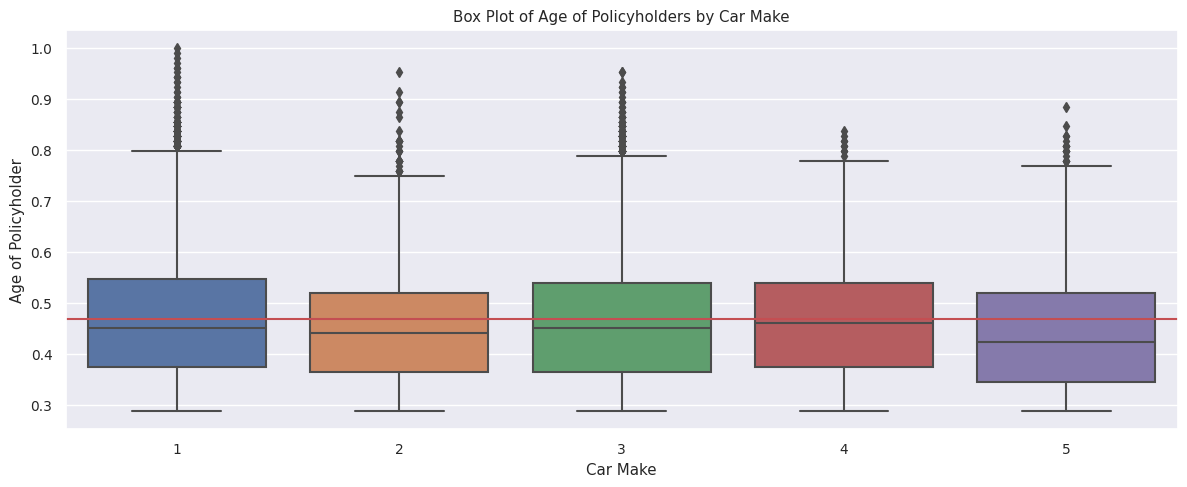

In [ ]:
# Make vs. Age of Policyholder

plt.figure(figsize=(12, 5))
sns.boxplot(x='make', y='age_of_policyholder', data=df_eda)

plt.axhline(y = df_eda["age_of_policyholder"].mean(), color='r')

plt.title("Box Plot of Age of Policyholders by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Age of Policyholder")

plt.tight_layout()
plt.show()


- Most preferred make of cars among both youngsters and old policyholders are make 1 and 3.

### Make vs. Claim

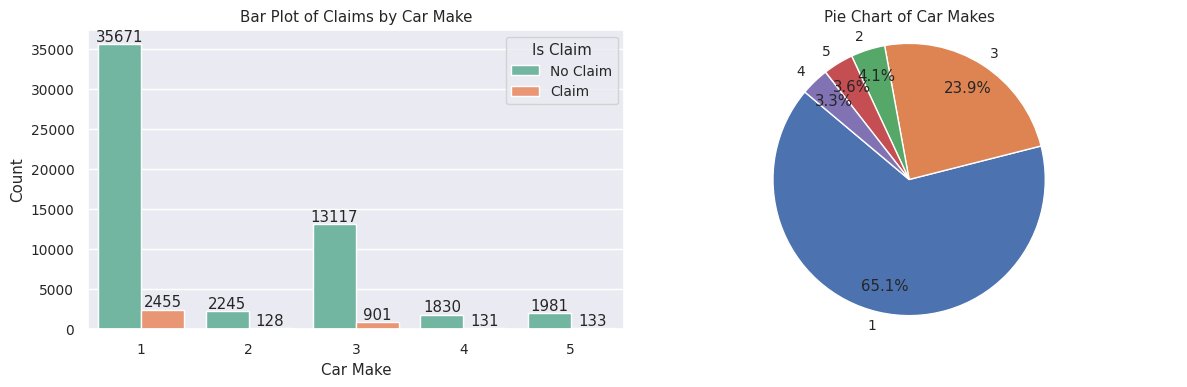

In [ ]:
# make vs. is_claim

fig = plt.figure(figsize=(12, 4), dpi=100)

# Count Plot
ax = fig.add_subplot(121)

ax1 = sns.countplot(data = df_eda, x = 'make', hue = 'is_claim', palette = 'Set2')
for i in ax1.containers:
    ax1.bar_label(i)
ax.set_title("Bar Plot of Claims by Car Make")
ax.set_xlabel("Car Make")
ax.set_ylabel("Count")
ax.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

# Pie Chart
ax = fig.add_subplot(122)

make_counts = df_eda['make'].value_counts()
ax.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=140, pctdistance = 0.8)
ax.set_title("Pie Chart of Car Makes")
ax.axis('equal')

plt.tight_layout()
plt.show()

- It is noticeable from the above graph that **Car Make 1 and 3 are most likely to go for the claim.**   

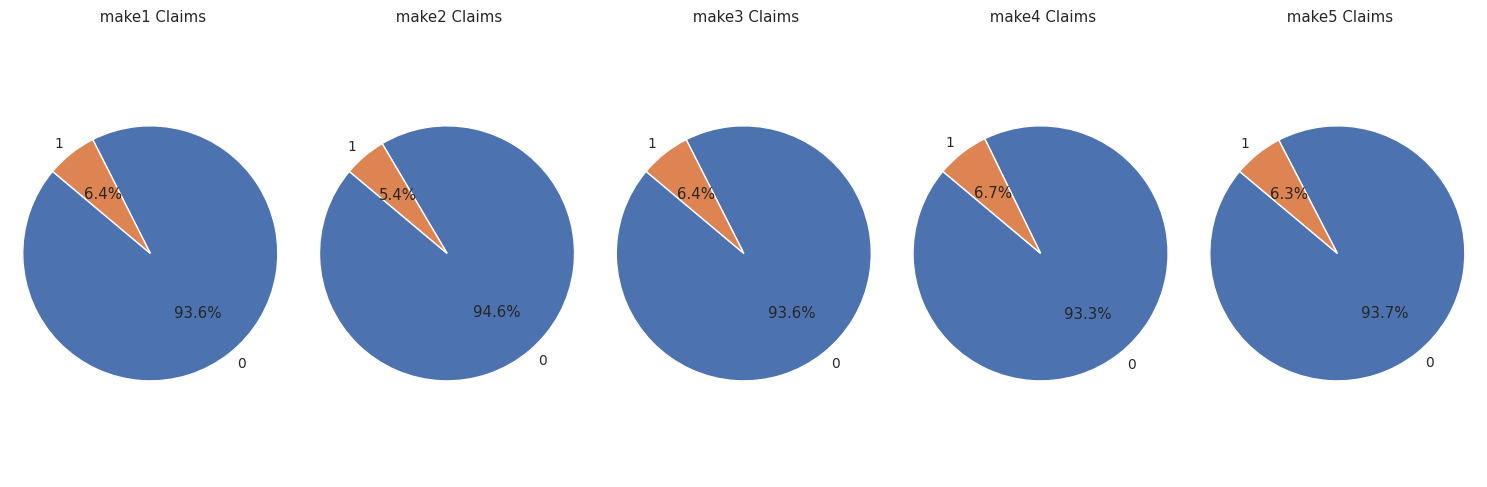

In [ ]:
# Get unique car makes
unique_makes = df_eda['make'].unique()

# Create a figure with subplots for each car make
fig, axs = plt.subplots(1, len(unique_makes), figsize=(15, 5))

# Create a pie chart for each car make
for i, make in enumerate(unique_makes):
    make_data = df_eda[df_eda['make'] == make] # Filter the data for the current car make
    claim_counts = make_data['is_claim'].value_counts() # Calculate the counts of claims and no claims

    # Create a pie chart for the current car make
    axs[i].pie(claim_counts, labels = claim_counts.index, autopct = '%1.1f%%', startangle = 140)
    axs[i].set_title(f" make{make} Claims")
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

- If we go by the percentage Car of make 4 are also likely to go for claim.

### Segment vs. Make and Claim

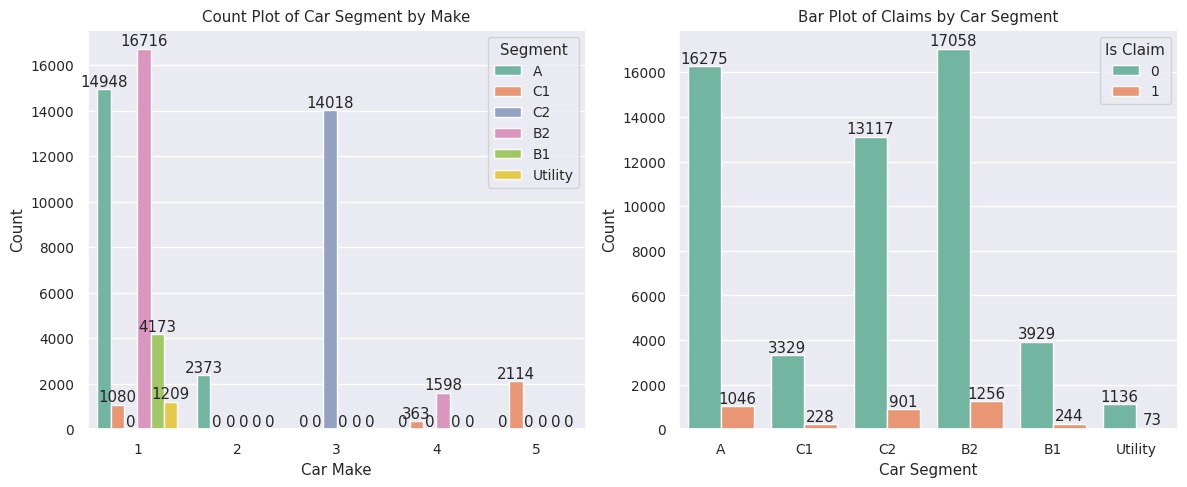

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), dpi=100)

ax1 = sns.countplot(data = df_eda, x = 'make', hue = 'segment', palette = 'Set2', ax = ax[0])
for i in ax1.containers:
    ax1.bar_label(i)
ax[0].set_title("Count Plot of Car Segment by Make")
ax[0].set_xlabel("Car Make")
ax[0].set_ylabel("Count")
ax[0].legend(title = 'Segment')

ax2 = sns.countplot(data = df_eda, x = 'segment', hue = 'is_claim', palette = 'Set2', ax = ax[1])
for i in ax2.containers:
    ax2.bar_label(i)
ax[1].set_title("Bar Plot of Claims by Car Segment")
ax[1].set_xlabel("Car Segment")
ax[1].set_ylabel("Count")
ax[1].legend(title = 'Is Claim')

plt.tight_layout()
plt.show()

- **Car Make 1 captures all the segments, manufacturing more cars of segments A and B2.**
- **Car make 3** is **only manufacturing cars of segment C2** according to the data.
- Also, **Segments A, C2 and B2** are **more likely to go for claims.**
- So, we can say that **car make 1, 3** and **car segment A, C2, B2** are **more prone to claims** and **therefore we can target these sections and can charge more premiumns to them as compare to that of others.**

### Model vs. Claim

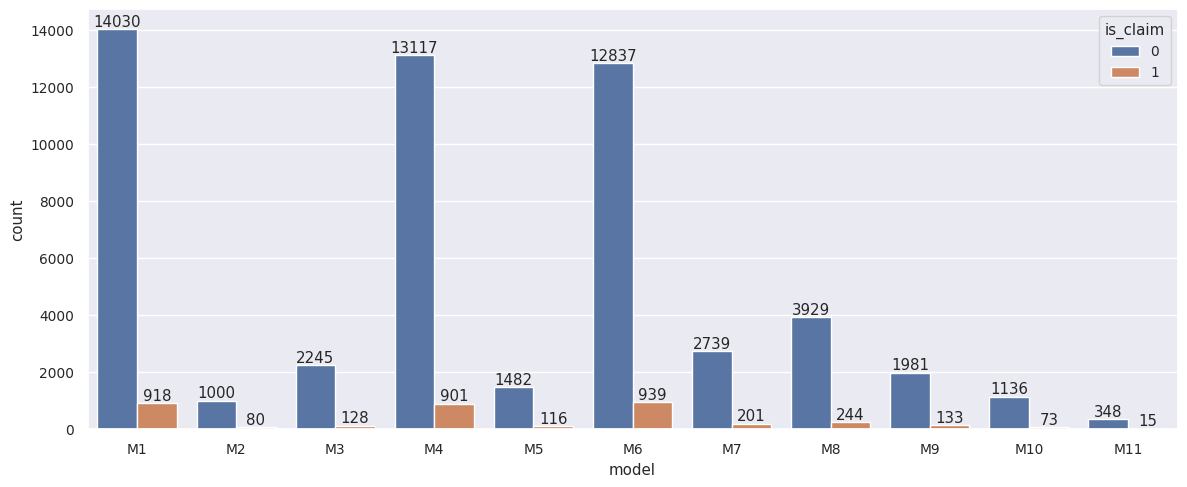

In [ ]:
plt.figure(figsize=(12, 5))
ax1 = sns.countplot(x = 'model', hue = 'is_claim', data = df_eda)
for i in ax1.containers:
    ax1.bar_label(i)

plt.tight_layout()
plt.show()

- As per the graph, **Model M1, M4 and M6** are **more likely to claim the insurance.**
- So, we can **target these model for improved and better prising of premiums.**

### Model vs. Make

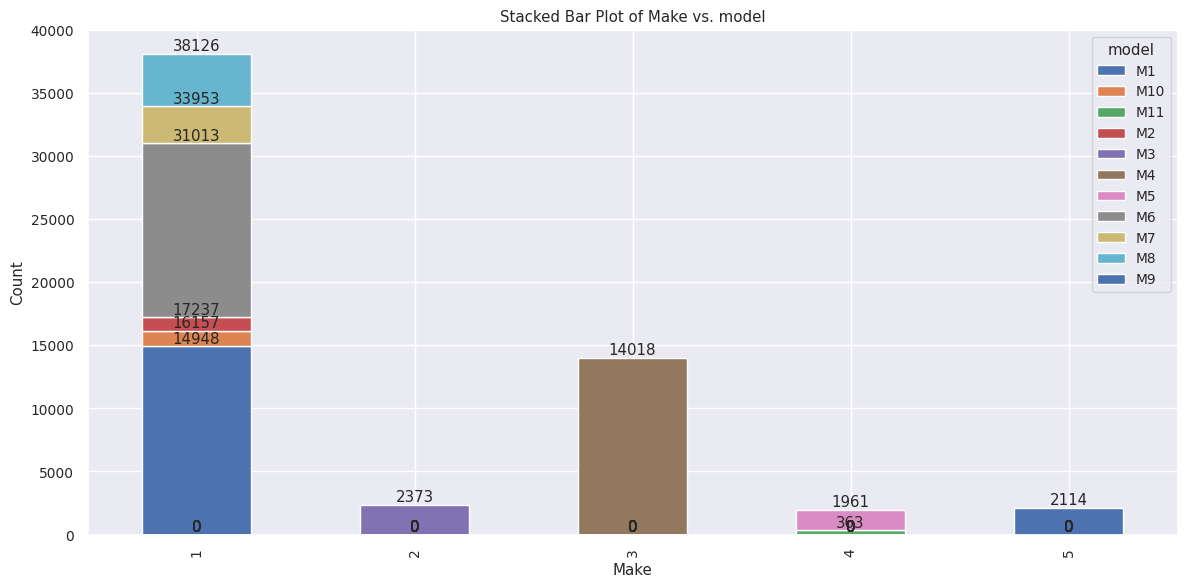

In [ ]:
# Create a cross-tabulation between make and model
cross_tab_model_make = pd.crosstab(df_eda['make'], df_eda['model'])

# Create a stacked bar plot
ax = cross_tab_model_make.plot(kind='bar', stacked=True, figsize=(12, 6))
for i in ax.containers:
    ax.bar_label(i)

plt.title("Stacked Bar Plot of Make vs. model")
plt.xlabel("Make")
plt.ylabel("Count")
plt.legend(title='model')

plt.tight_layout()
plt.show()

- As depicted in the figure above, **Make 1 is more into Model M1, M6 and M4.**
- Whereas, **Make 3 is only into Model M4.**
- As seen in previous graph, **Model M1, M6 and M4** are **making more claims which ultimately means Make 1 and Make 3 are making more claims.**

### Model vs. Segment

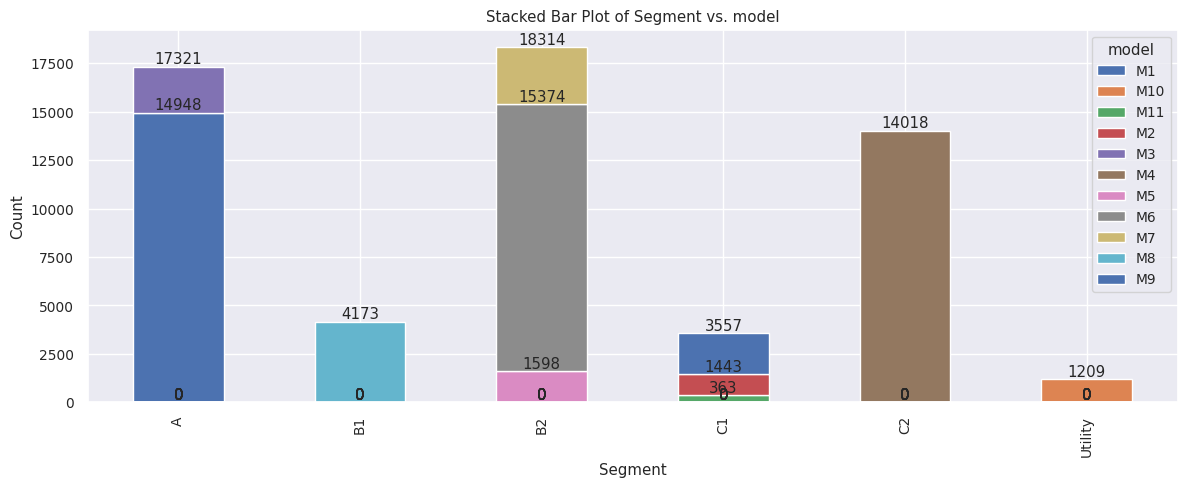

In [ ]:
# Create a cross-tabulation between segment and model
cross_tab_model_segment = pd.crosstab(df_eda['segment'], df_eda['model'])

# Create a stacked bar plot
ax = cross_tab_model_segment.plot(kind='bar', stacked=True, figsize=(12, 5))
for i in ax.containers:
    ax.bar_label(i)

plt.title("Stacked Bar Plot of Segment vs. model")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.legend(title='model')

plt.tight_layout()
plt.show()

- Here, **Segment A** is having **2 models: Model M1(highest) and Model M3.**
- **Segment B2** is having **3 models: Model M6(highest), Model M7, Model M5.**
- **Segment C2** is having **just 1 model: Model M4.**
1. **Conclusion: Make 1 and 3; Segment A, B2 and C2; Model M1, M4, M6 are more likely to claim insurance.**
- **Make 1---> Segment A ---> Model M1**
- **Make 1---> Segment B2 ---> Model M6**
- **Make 3---> Segment C2 ---> Model M4**
2. **So, we can charge more premium from these target area for their policies.**

### NCAP Rating vs. Make and Segment

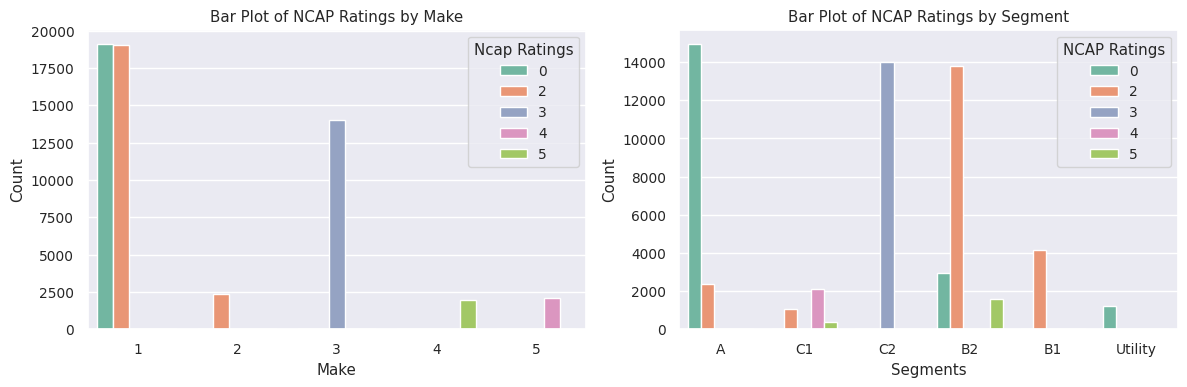

In [ ]:
# NCAP Rating vs. Make and Segment

fig = plt.figure(figsize=(12, 4), dpi=100)

ax = fig.add_subplot(121)

ax1 = sns.countplot(data = df_eda, x = 'make', hue = 'ncap_rating', palette = 'Set2')

ax.set_title("Bar Plot of NCAP Ratings by Make")
ax.set_xlabel("Make")
ax.set_ylabel("Count")
ax.legend(title = 'Ncap Ratings')

# Claim vs. Airbags
ax = fig.add_subplot(122)

ax2 = sns.countplot(x = 'segment', hue = 'ncap_rating', data = df_eda, palette = 'Set2')

ax.set_title("Bar Plot of NCAP Ratings by Segment")
ax.set_xlabel("Segments")
ax.set_ylabel("Count")
ax.legend(title = 'NCAP Ratings')


plt.tight_layout()
plt.show()

- **Make 1 and 3 is having low NCAP Ratings.**
- Make 1 having ratings 1 & 2. In make 1, Model A given rating 1 and Model B2 given rating 2.
- Make 3 having ratings 3 and the Model is C2.
1. **Conclusion**
- **Make 1 --->Model A ---> NCAP Rating 1**
- **Make 1 --->Model B2 ---> NCAP Rating 2**
- **Make 3 --->Model C2 ---> NCAP Rating 3**

### Fuel Type vs. Claim and NCAP Rating

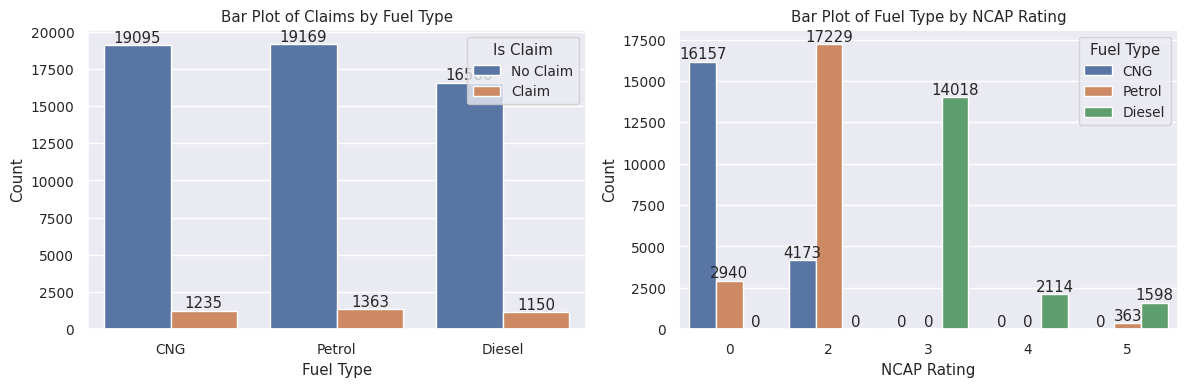

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4), dpi=100)

ax1 = sns.countplot(data = df_eda, x = 'fuel_type', hue = 'is_claim', ax = ax[0])
for i in ax1.containers:
    ax1.bar_label(i)

ax[0].set_title("Bar Plot of Claims by Fuel Type")
ax[0].set_xlabel("Fuel Type")
ax[0].set_ylabel("Count")
ax[0].legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

ax2 = sns.countplot(data = df_eda, x = 'ncap_rating', hue = 'fuel_type', ax = ax[1])
for i in ax2.containers:
    ax2.bar_label(i)

ax[1].set_title("Bar Plot of Fuel Type by NCAP Rating")
ax[1].set_xlabel("NCAP Rating")
ax[1].set_ylabel("Count")
ax[1].legend(title = 'Fuel Type')

plt.tight_layout()
plt.show()

- As depicted by the **plot-2**, **Diesel cars has got highest NCAP Ratings (3,4,5) as compared to that of CNG and Petrol NCAP Ratings (1,2).**
- Also, as per **plot 1**, **CNG and Petrol cars are more likely to claim** as compared to Diesel cars.
1. **Conclusion**
- We can say that **cars with lower NCAP Ratings are claimed more** than cars having more NCAP Ratings.

### NCAP Rating vs. Claim

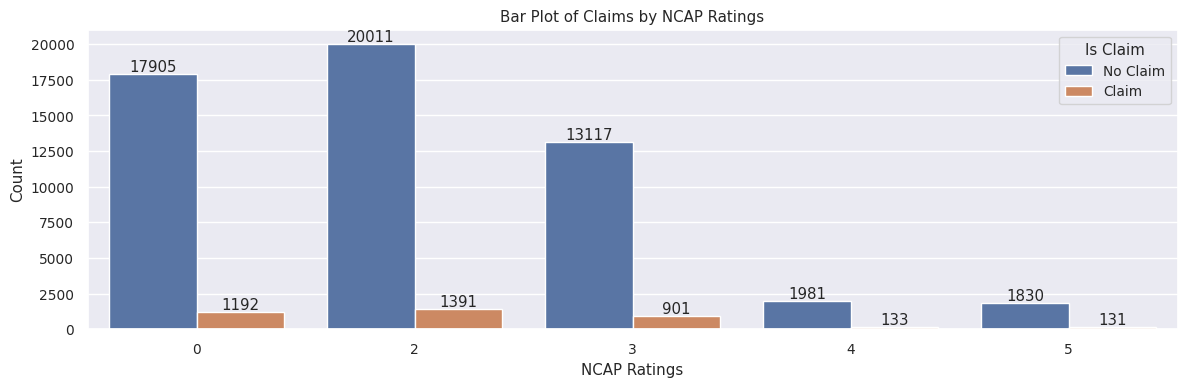

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.countplot(data = df_eda, x = 'ncap_rating', hue = 'is_claim')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Claims by NCAP Ratings")
plt.xlabel("NCAP Ratings")
plt.ylabel("Count")
plt.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

plt.tight_layout()
plt.show()

- From the above graph, We can say that **cars with lower NCAP Ratings are claimed more than cars having more NCAP Ratings.**

### Fuel Type vs. Make and Segment

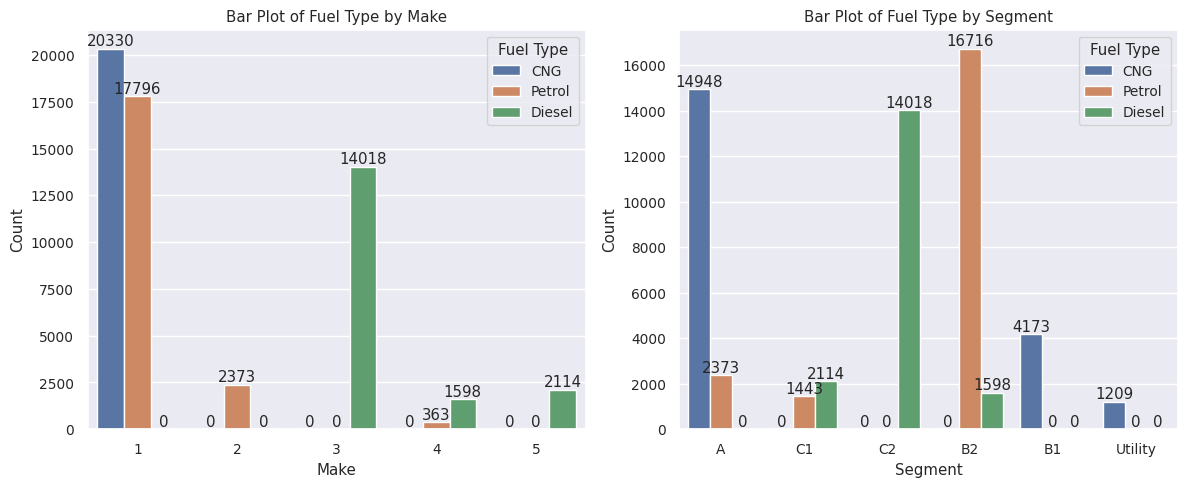

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5), dpi=100)

ax1 = sns.countplot(data = df_eda, x = 'make', hue = 'fuel_type', ax = ax[0])
for i in ax1.containers:
    ax1.bar_label(i)

ax[0].set_title("Bar Plot of Fuel Type by Make")
ax[0].set_xlabel("Make")
ax[0].set_ylabel("Count")
ax[0].legend(title = 'Fuel Type')

ax2 = sns.countplot(data = df_eda, x = 'segment', hue = 'fuel_type', ax = ax[1])
for i in ax2.containers:
    ax2.bar_label(i)

ax[1].set_title("Bar Plot of Fuel Type by Segment")
ax[1].set_xlabel("Segment")
ax[1].set_ylabel("Count")
ax[1].legend(title = 'Fuel Type')

plt.tight_layout()
plt.show()

### Fuel Type vs. Model

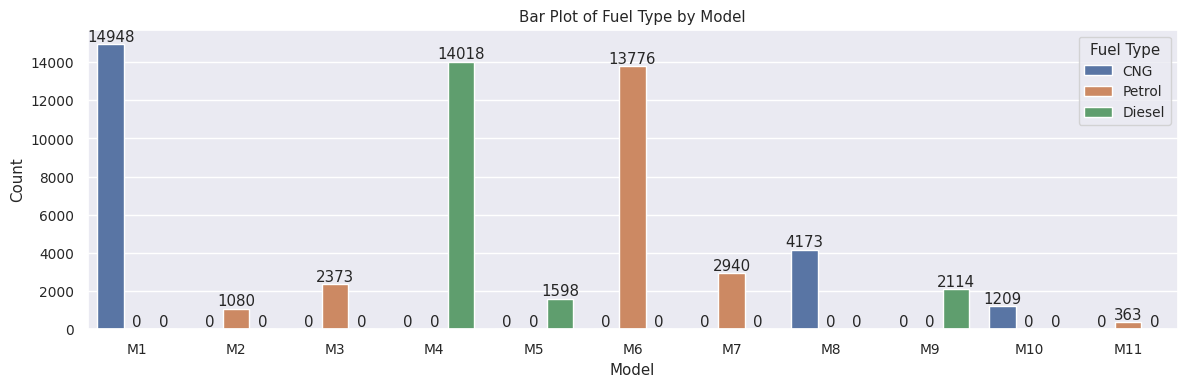

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.countplot(data = df_eda, x = 'model', hue = 'fuel_type')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Fuel Type by Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.legend(title = 'Fuel Type')

plt.tight_layout()
plt.show()

1. **Conclusion**
- Make 1(CNG, Petrol)---> Segment A ---> Model M1(**CNG**)
- Make 1(CNG, Petrol)---> Segment B2 ---> Model M6(**Petrol**)
- Make 3(Diesel)---> Segment C2 ---> Model M4(**Diesel**)

### Max Torque vs. Claim

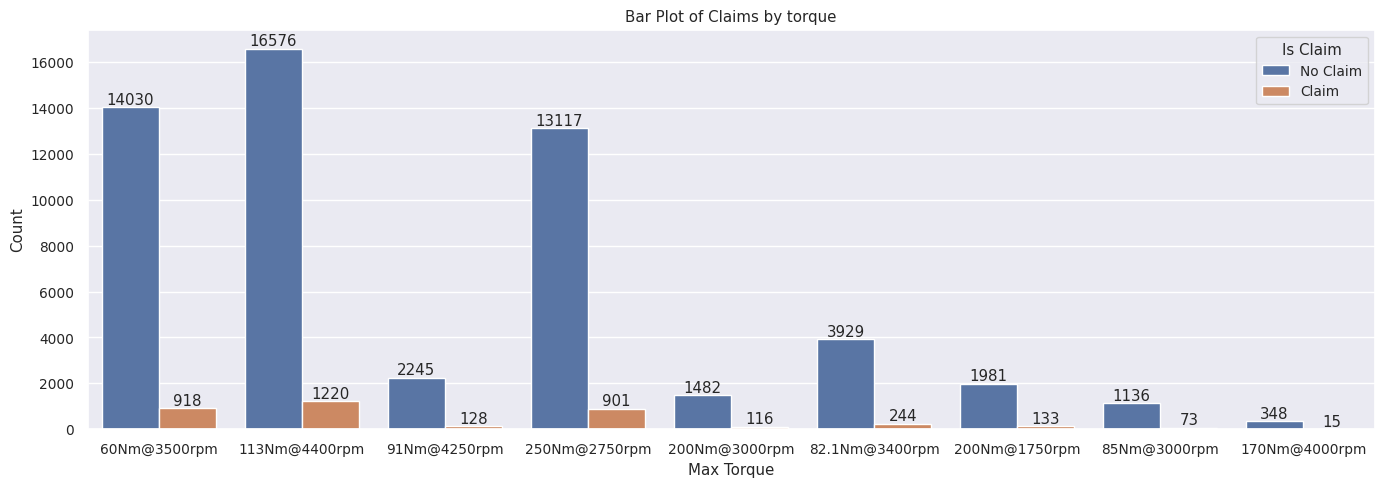

In [ ]:
plt.figure(figsize=(14, 5))

ax1 = sns.countplot(data = df_eda, x = 'max_torque', hue = 'is_claim')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Claims by torque")
plt.xlabel("Max Torque")
plt.ylabel("Count")
plt.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

plt.tight_layout()
plt.show()

- We can see that **Cars with higher torque are more likely to claim.**
- This maybe **because these characteristics are related to driving behaviour** and are **more prone to aggressive driving.**
1. **Conclusion**
- **High Torque ---> More Claims**
- **60Nm@3500, 113Nm@4400 and 250Nm@2750 are more likely to get claimed.**

### Max Torque vs. Fuel Type

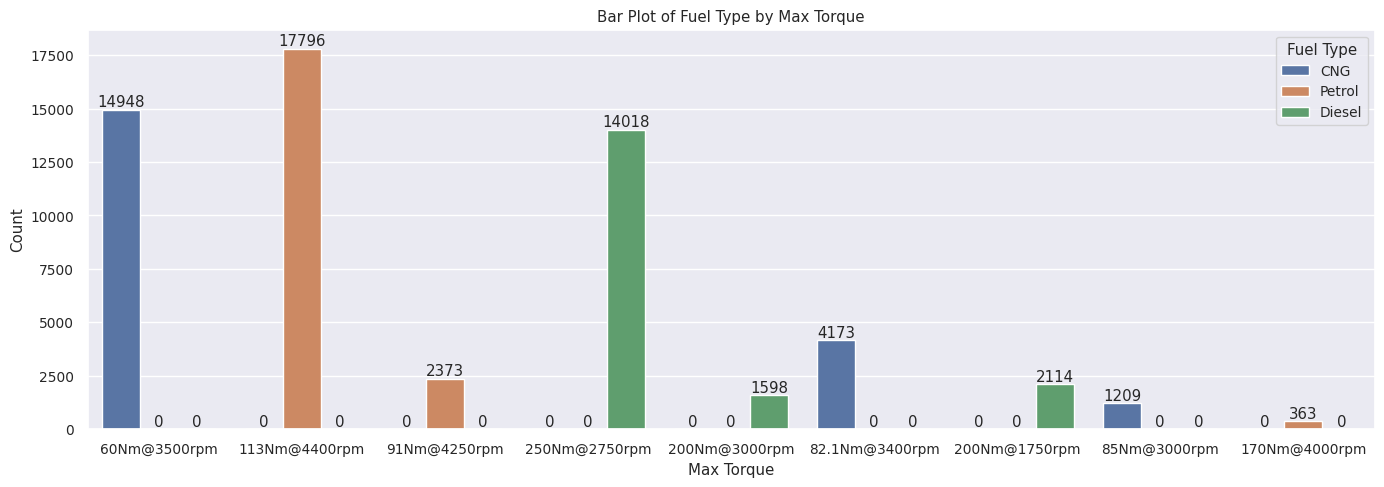

In [ ]:
plt.figure(figsize=(14, 5))

ax1 = sns.countplot(data = df_eda, x = 'max_torque', hue = 'fuel_type')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Fuel Type by Max Torque")
plt.xlabel("Max Torque")
plt.ylabel("Count")
plt.legend(title = 'Fuel Type')

plt.tight_layout()
plt.show()

- **60Nm@3500, 113Nm@4400 and 250Nm@2750** are more likely to get claimed having **fuels CNG, Petrol and Diesel respectively**.
1. **Conclusion**
- **60Nm@3500 ---> CNG**
- **113Nm@4400 ---> Petrol**
- **250Nm@2750 ---> Diesel**

### Max Torque vs. Model

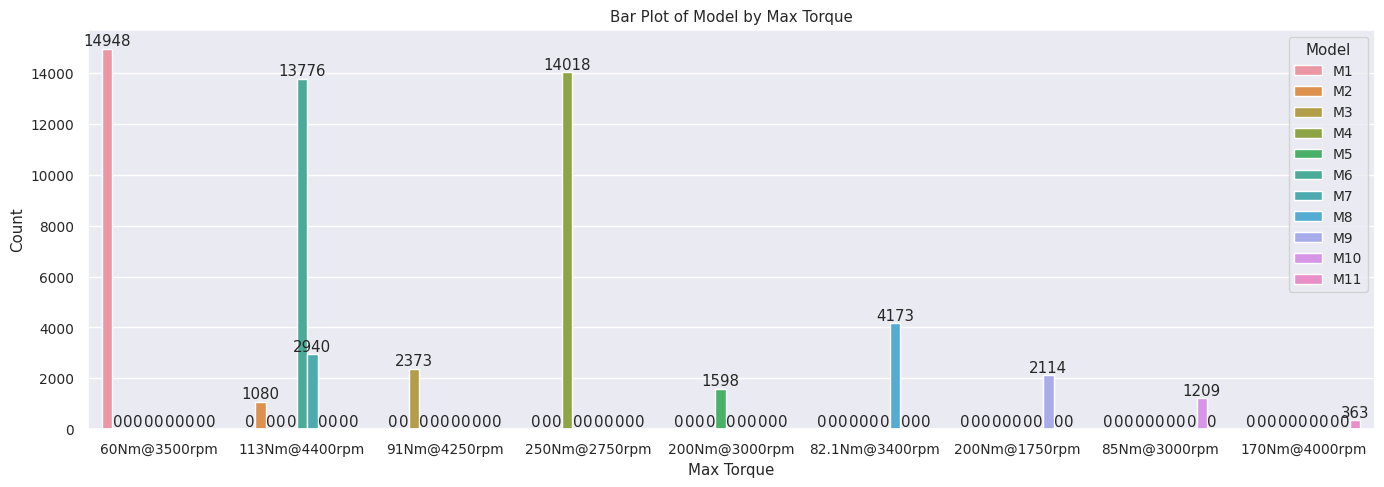

In [ ]:
plt.figure(figsize=(14, 5))

ax1 = sns.countplot(data = df_eda, x = 'max_torque', hue = 'model')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Model by Max Torque")
plt.xlabel("Max Torque")
plt.ylabel("Count")
plt.legend(title = 'Model')

plt.tight_layout()
plt.show()

- **60Nm@3500, 113Nm@4400 and 250Nm@2750** are more likely to get claimed having **Models M1, M6 and M4 respectively.**
1. **Conclusion**
- **60Nm@3500 ---> CNG ---> M1**
- **113Nm@4400 ---> Petrol---> M6**
- **250Nm@2750 ---> Diesel ---> M4**

### Engine Type vs. Claim

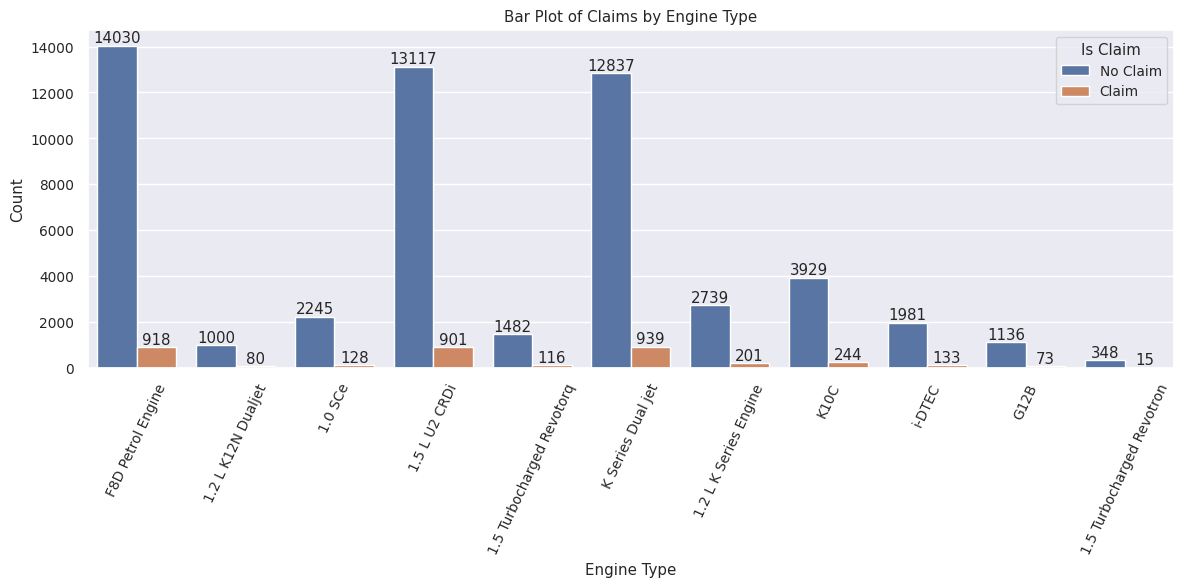

In [ ]:
plt.figure(figsize=(12, 6))

ax1 = sns.countplot(data = df_eda, x = 'engine_type', hue = 'is_claim')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Claims by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation = 65)
plt.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

plt.tight_layout()
plt.show()

- Engine **F8D Petrol Engine**, **1.5L U2 CRDi** and **KSeries Dual jet** are **more likely to get claimed.**

### Engine Type vs. Fuel Type

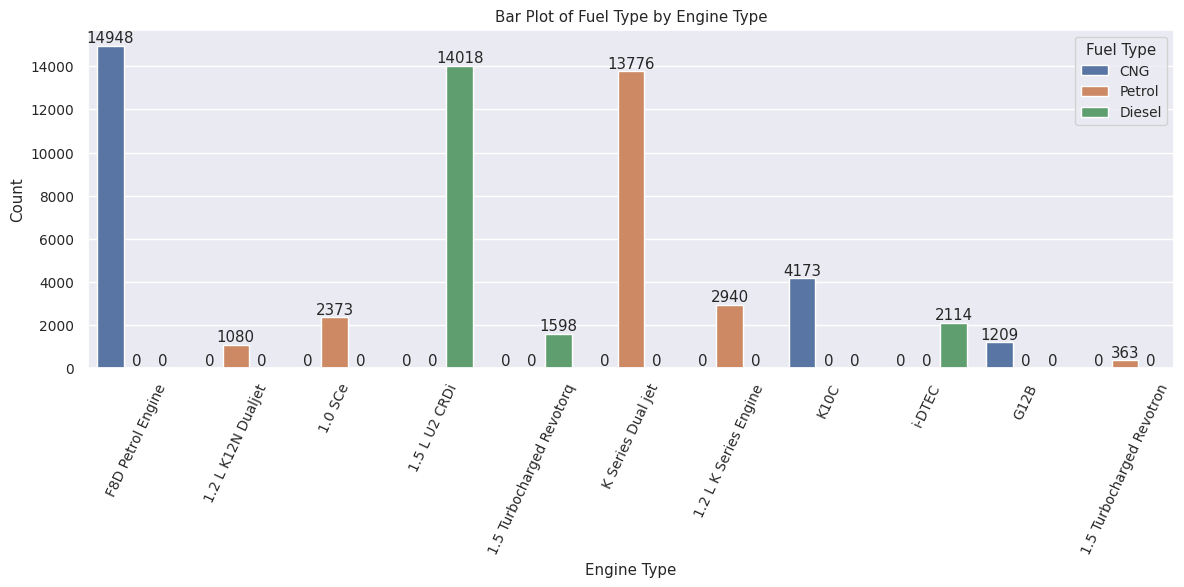

In [ ]:
plt.figure(figsize=(12, 6))

ax1 = sns.countplot(data = df_eda, x = 'engine_type', hue = 'fuel_type')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Fuel Type by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation = 65)
plt.legend(title = 'Fuel Type')

plt.tight_layout()
plt.show()

- **F8D Petrol Engine** ---> **CNG Type**
- **1.5L U2 CRDi** ---> **Diesel Type**
- **KSeries Dual jet** ---> **Petrol Type**

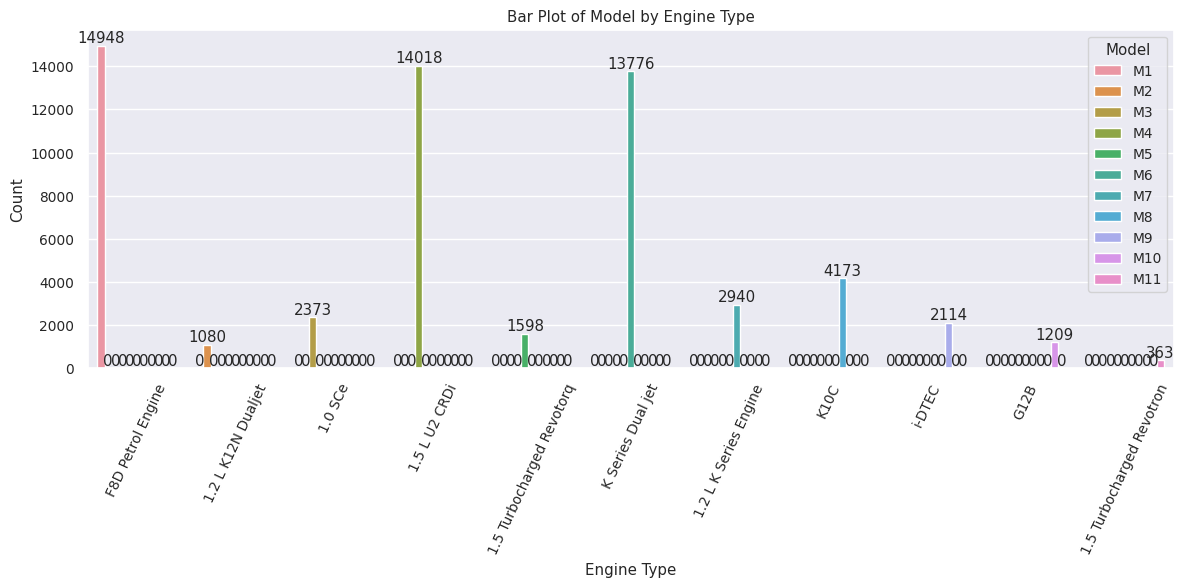

In [ ]:
plt.figure(figsize=(12, 6))

ax1 = sns.countplot(data = df_eda, x = 'engine_type', hue = 'model')
for i in ax1.containers:
    ax1.bar_label(i)

plt.title("Bar Plot of Model by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation = 65)
plt.legend(title = 'Model')

plt.tight_layout()
plt.show()

1. **Conclusion**
- **F8D Petrol Engine** ---> CNG Type ---> **M1**
- **1.5L U2 CRDi** ---> Diesel Type ---> **M4**
- **KSeries Dual jet** ---> Petrol Type ---> **M6**

### Cylinder vs. Claim

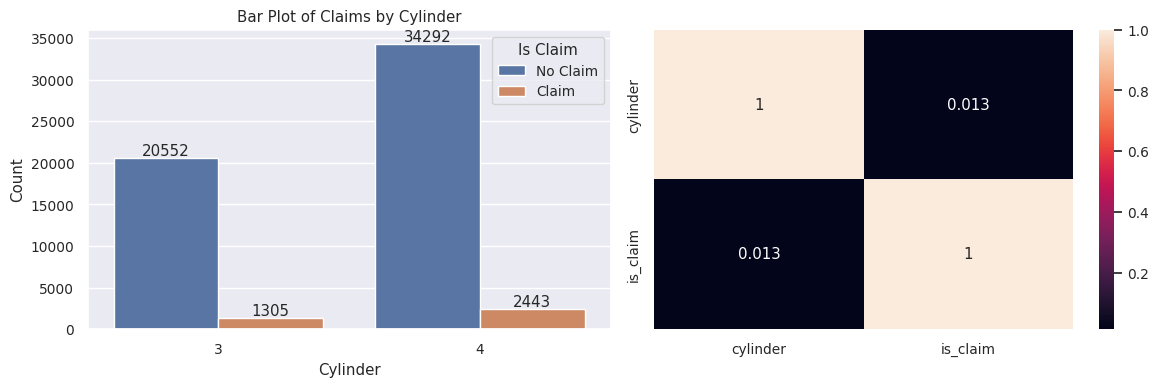

In [ ]:
# Cylinder vs. is_claim

fig = plt.figure(figsize=(12, 4), dpi=100)

ax = fig.add_subplot(121)

ax1 = sns.countplot(data = df_eda, x = 'cylinder', hue = 'is_claim')
for i in ax1.containers:
    ax1.bar_label(i)

ax.set_title("Bar Plot of Claims by Cylinder")
ax.set_xlabel("Cylinder")
ax.set_ylabel("Count")
ax.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

# HeatMap
ax = fig.add_subplot(122)

cylinder_claim_hm = df_eda[["cylinder", "is_claim"]].corr()
sns.heatmap(cylinder_claim_hm, annot = True, fmt='.2g')

plt.tight_layout()
plt.show()

- Although there is **not much strong relation**, but we can say that **they are positively correlated.**
- **More the no.of cylinders** ---> **More claims**
- **Less no.of cylinders** ---> **Less claims**

### Gear Box vs. Claim

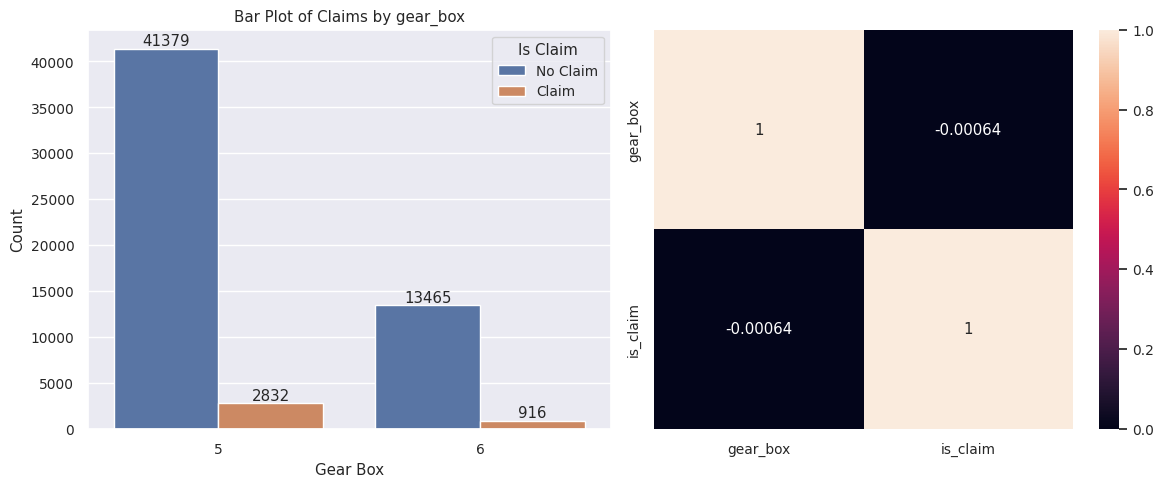

In [ ]:
# Gear Box vs. is_claim

fig = plt.figure(figsize=(12, 5), dpi=100)

# Count Plot
ax = fig.add_subplot(121)

ax1 = sns.countplot(data = df_eda, x = 'gear_box', hue = 'is_claim')
for i in ax1.containers:
    ax1.bar_label(i)

ax.set_title("Bar Plot of Claims by gear_box")
ax.set_xlabel("Gear Box")
ax.set_ylabel("Count")
ax.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])

# HeatMap
ax = fig.add_subplot(122)

gear_claim_hm = df_eda[["gear_box", "is_claim"]].corr()
sns.heatmap(gear_claim_hm, annot = True, fmt='.2g')

plt.tight_layout()
plt.show()

- Here, **no strong relation** is there, but, **they are negatively correlated** (weak negative correlation).
- **More the no.of gears** ---> **Less claims**
- **Less no.of gears** ---> **More claims**

### Airbags vs. Claim and Electronic Stability Control System(ESC)

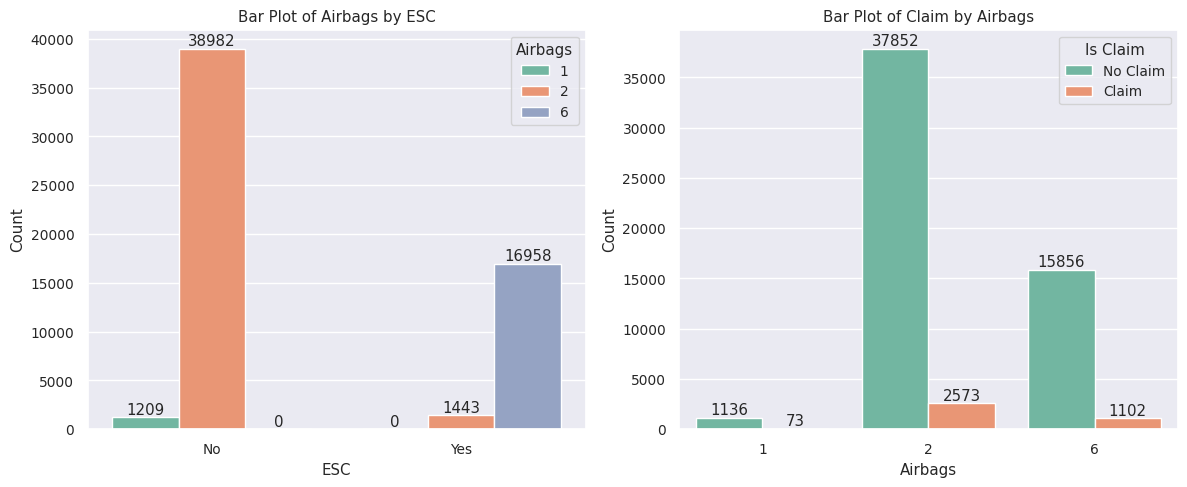

In [ ]:
# ESC vs. Airbags

fig = plt.figure(figsize=(12, 5), dpi=100)

ax = fig.add_subplot(121)

ax1 = sns.countplot(data = df_eda, x = 'is_esc', hue = 'airbags', palette = 'Set2')
for i in ax1.containers:
    ax1.bar_label(i)

ax.set_title("Bar Plot of Airbags by ESC")
ax.set_xlabel("ESC")
ax.set_ylabel("Count")
ax.legend(title = 'Airbags')

# Claim vs. Airbags
ax = fig.add_subplot(122)

ax2 = sns.countplot(x = 'airbags', hue = 'is_claim', data = df_eda, palette = 'Set2')
for i in ax2.containers:
    ax2.bar_label(i)

ax.set_title("Bar Plot of Claim by Airbags")
ax.set_xlabel("Airbags")
ax.set_ylabel("Count")
ax.legend(title = 'Is Claim', labels = ['No Claim', 'Claim'])


plt.tight_layout()
plt.show()

1. **Plot-1**
- Car having no ESC ---> contains less no.of airbags(2).
- Car having ESC ---> contains more no.of airbags(6).
2. **Plot-2**
- Less no.of airbags ---> More Claims
- More no.of airbags ---> Less Claims
3. **Conclusion**
- **Cars** with **Less Airbags(2) & No ESC** ---> **Claim More** ---> **can charge more premium**
- **Cars** with **More Airbags(6) & with ESC** ---> **Claim Less** ---> **can charge less premium**

### Electronic Crash Warning System(ECW) vs. Claim

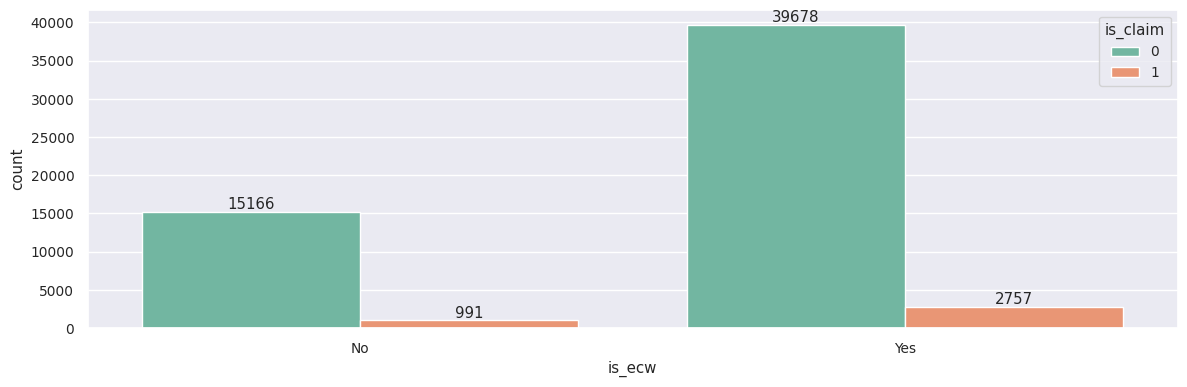

In [ ]:
plt.figure(figsize = (12, 4))

ax1 = sns.countplot(data = df_eda, x = 'is_ecw', hue = 'is_claim', palette = 'Set2')
for i in ax1.containers:
    ax1.bar_label(i)

plt.tight_layout()
plt.show()

- As the bar depicts, for No ECW system; Less claims and for Yes ECW system; More claims
1. **Conclusion**
- There is **no significant relation between ECW system and the claims.**
- Even if there is ECW system, **it also depends on the driver behaviour.**

### Rear Brake Types vs. Claim

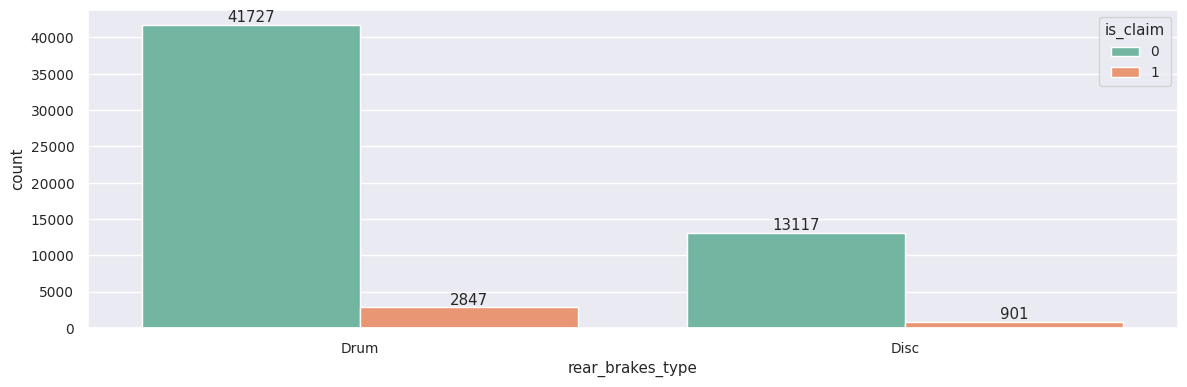

In [ ]:
plt.figure(figsize = (12, 4))

ax1 = sns.countplot(data = df_eda, x = 'rear_brakes_type', hue = 'is_claim', palette = 'Set2')
for i in ax1.containers:
    ax1.bar_label(i)

plt.tight_layout()
plt.show()

- Disc Brake offers way better braking power than Drum Brake.
- Cars with **Drum Type Brakes** ---> **More Claims**
- Cars with **Disc Type Brakes** ---> **Less Claims**

### Turning Radius vs. Claim

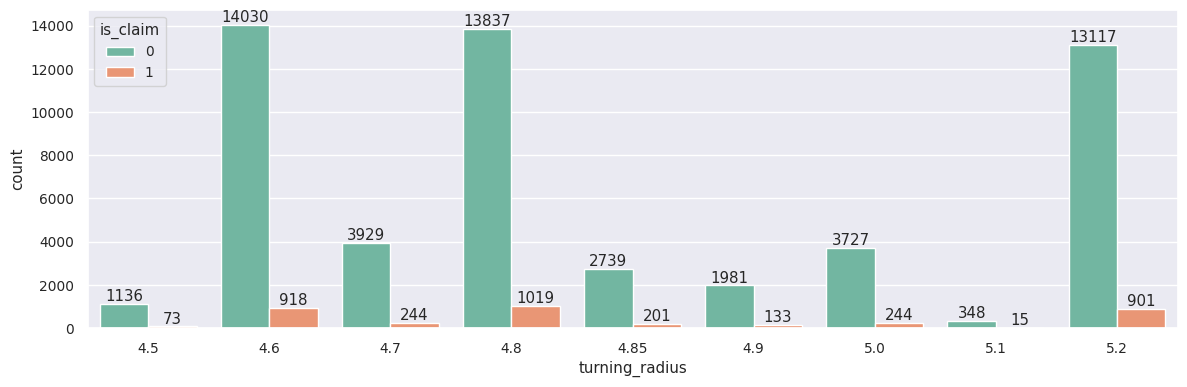

In [ ]:
plt.figure(figsize = (12, 4))

ax1 = sns.countplot(data = df_eda, x = 'turning_radius', hue = 'is_claim', palette = 'Set2')
for i in ax1.containers:
    ax1.bar_label(i)

plt.tight_layout()
plt.show()

- Cars with **long turning radius** ---> **More Claims**
- Cars with **short turning radius** ---> **Less Claims**

## Multivariate Analysis

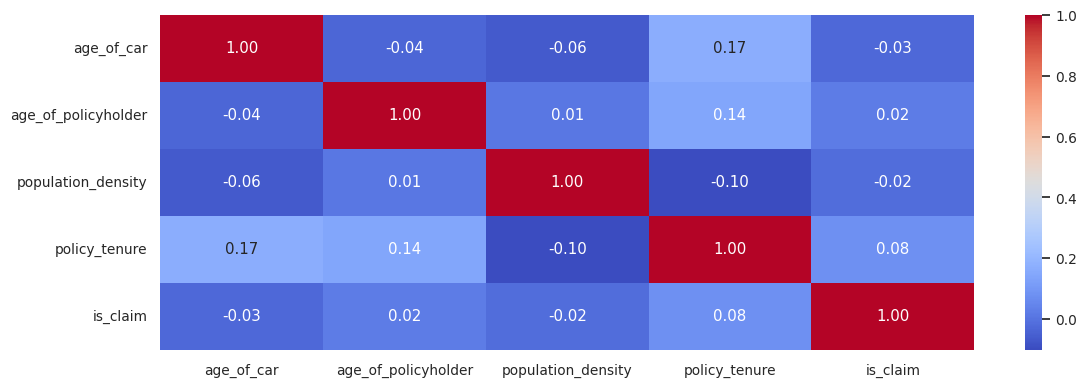

In [ ]:
correlation_matrix = df_eda[['age_of_car', 'age_of_policyholder', 'population_density', "policy_tenure", "is_claim"]].corr()
plt.figure(figsize=(12, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

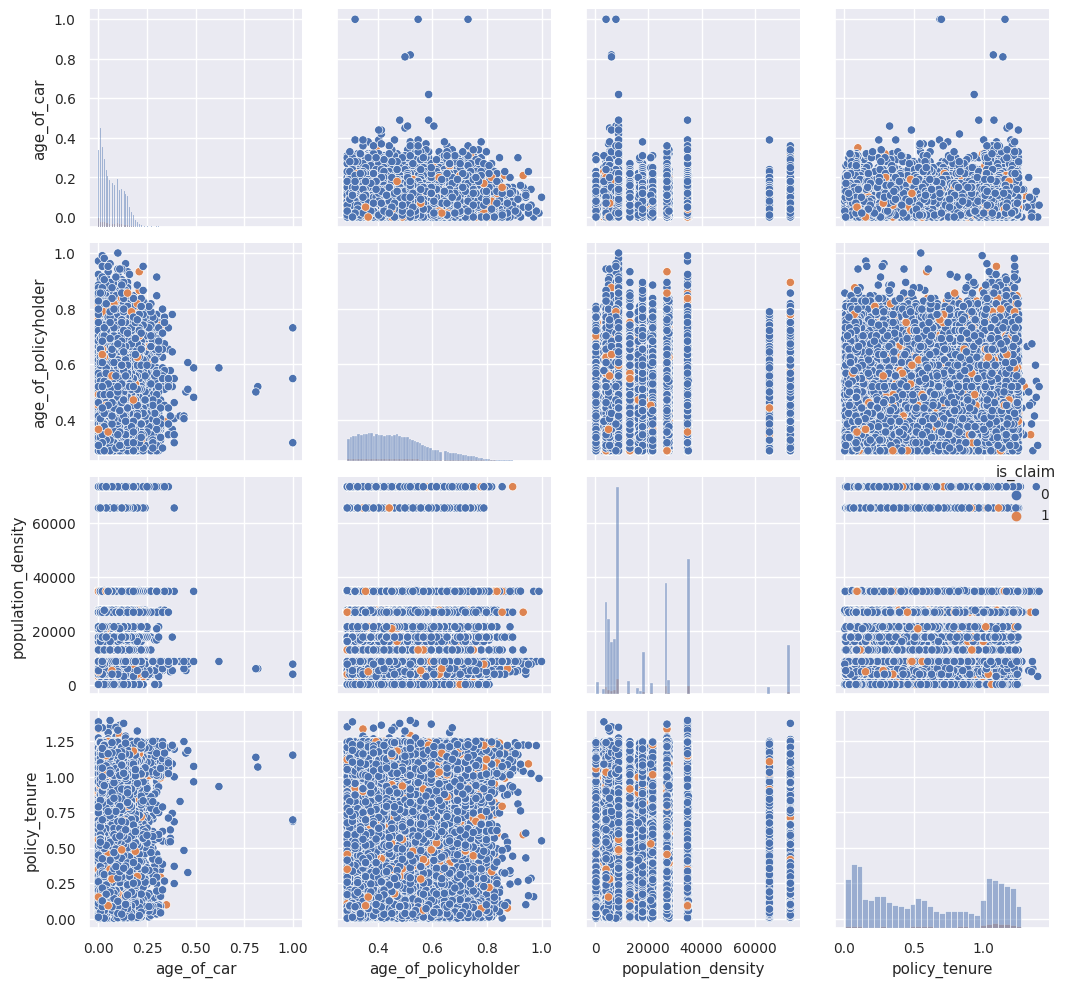

In [ ]:
plt.figure(figsize=(12, 4))

sns.pairplot(df_eda[['age_of_car', 'age_of_policyholder', 'population_density', "policy_tenure", "is_claim"]], hue="is_claim", kind="scatter",diag_kind="hist")
plt.tight_layout()
plt.show()

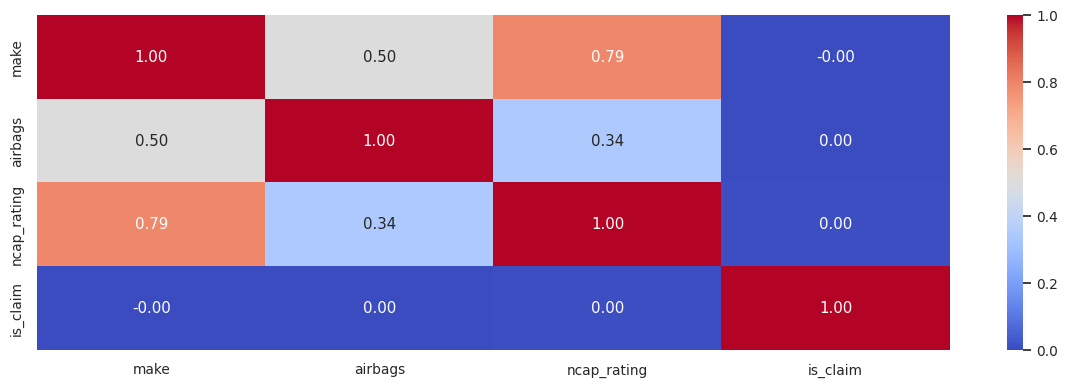

In [ ]:
plt.figure(figsize=(12, 4))

correlation_matrix_2 = df_eda[['make', 'segment', 'model', "airbags", "ncap_rating", "is_claim"]].corr()
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f")

plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

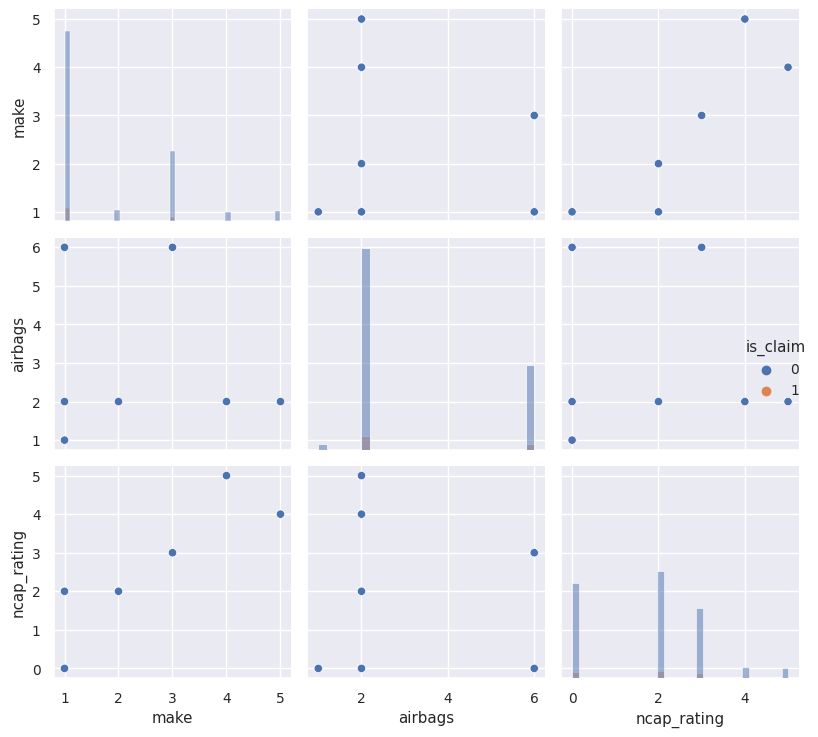

In [ ]:
plt.figure(figsize=(12, 4))

sns.pairplot(df_eda[['make', 'segment', 'airbags', "ncap_rating", "is_claim"]], hue="is_claim", kind="scatter", diag_kind="hist")
plt.tight_layout()
plt.show()

## Feature Selection

In [ ]:
df1.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  model  airbags  is_esc  is_adjustable_steering  \
0                4990      0        2       0                       0   
1               27003      0        2       0                       0   
2                4076      0        2       0                       0   
3               21622      3        2       1                       1   
4               34738      4        2       0                       0   

   is_tpms  is_parking_sensors  is_parking_camera  rear_brakes_type  \
0        0                   1                  0                 1   
1        0                   1                  0                 1   
2        0                   1                  0                 1   
3        0                   1                  1                 1   
4        0                   0                  1                 1   

   displacement  cylinder  transmission_type  gear_box  turning_radius  \
0           796         3                  1         5             4.6   
1           796         3                  1         5             4.6   
2           796         3                  1         5             4.6   
3          1197         4                  0         5             4.8   
4           999         3                  0         5             5.0   

   length  width  height  gross_weight  is_front_fog_lights  \
0    3445   1515    1475          1185                    0   
1    3445   1515    1475          1185                    0   
2    3445   1515    1475          1185                    0   
3    3995   1735    1515          1335                    1   
4    3731   1579    1490          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
4                              1       1               1            2   

   is_claim  segment_B1  segment_B2  segment_C1  segment_C2  segment_Utility  \
0         0           0           0           0           0                0   
1         0           0           0           0           0                0 

- As per the EDA analysis, correlation of all the features and domain knowledge below are the list of significant features.

- **Significant Features :**
- **policy_tenure**, **age_of_car**, **age_of_policyholder**, **area_cluster**, **population_density**, **model**, **airbags**, **is_esc**, **rear_brakes_type**, **displacement**, **transmission_type**, **turning_radius**, **length**, **width**, **height**, **gross_weight**, **is_brake_assist**, **ncap_rating**, **area_cluster**, **segment**, **make**, **fuel_type**, **max_torque**, **max_power**, **engine_type**

In [ ]:
df1.shape

(58592, 64)

In [ ]:
df1_fs = df1.copy()

#### Feature: Model

In [ ]:
top_k = 5  # Number of top categories to retain
top_categories = df1_fs['model'].value_counts().index[:top_k]

In [ ]:
df1_fs['model'] = df1_fs['model'].apply(lambda x: x if x in top_categories else 'Other')

In [ ]:
df1_fs.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  model  airbags  is_esc  is_adjustable_steering  \
0                4990      0        2       0                       0   
1               27003      0        2       0                       0   
2                4076      0        2       0                       0   
3               21622  Other        2       1                       1   
4               34738  Other        2       0                       0   

   is_tpms  is_parking_sensors  is_parking_camera  rear_brakes_type  \
0        0                   1                  0                 1   
1        0                   1                  0                 1   
2        0                   1                  0                 1   
3        0                   1                  1                 1   
4        0                   0                  1                 1   

   displacement  cylinder  transmission_type  gear_box  turning_radius  \
0           796         3                  1         5             4.6   
1           796         3                  1         5             4.6   
2           796         3                  1         5             4.6   
3          1197         4                  0         5             4.8   
4           999         3                  0         5             5.0   

   length  width  height  gross_weight  is_front_fog_lights  \
0    3445   1515    1475          1185                    0   
1    3445   1515    1475          1185                    0   
2    3445   1515    1475          1185                    0   
3    3995   1735    1515          1335                    1   
4    3731   1579    1490          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
4                              1       1               1            2   

   is_claim  segment_B1  segment_B2  segment_C1  segment_C2  segment_Utility  \
0         0           0           0           0           0                0   
1         0           0           0           0           0                0 

In [ ]:
# One-Hot Encoding

df1_fs = pd.get_dummies(df1_fs, columns = ["model"], prefix = "model")

In [ ]:
df1_fs = df1_fs.drop(["model_Other"], axis = 1)

In [ ]:
df1_fs.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  airbags  is_esc  is_adjustable_steering  is_tpms  \
0                4990        2       0                       0        0   
1               27003        2       0                       0        0   
2                4076        2       0                       0        0   
3               21622        2       1                       1        0   
4               34738        2       0                       0        0   

   is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  \
0                   1                  0                 1           796   
1                   1                  0                 1           796   
2                   1                  0                 1           796   
3                   1                  1                 1          1197   
4                   0                  1                 1           999   

   cylinder  transmission_type  gear_box  turning_radius  length  width  \
0         3                  1         5             4.6    3445   1515   
1         3                  1         5             4.6    3445   1515   
2         3                  1         5             4.6    3445   1515   
3         4                  0         5             4.8    3995   1735   
4         3                  0         5             5.0    3731   1579   

   height  gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0    1475          1185                    0                     0   
1    1475          1185                    0                     0   
2    1475          1185                    0                     0   
3    1515          1335                    1                     0   
4    1490          1155                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0                0   
2                      0                        0                0   
3                      0                        1                1   
4                      0                        0                0   

   is_power_door_locks  is_central_locking  is_power_steering  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    1                   1                  1   
4                    1                   1                  1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 0                              0       0   
2                                 0                              0       0   
3                                 1                              1       1   
4                                 0                              1       1   

   is_speed_alert  ncap_rating  is_claim  segment_B1  segment_B2  segment_C1  \
0               1            0         0           0           0           0   
1               1            0         0           0           0           0   
2               1            0         0           0           0           0   
3               1            2         0           0           0           1   
4               1            2         0           0           0           0   

   

#### Feature: Area Cluster

In [ ]:
top_categories = ["C2", "C3", "C5", "C8", "C10", "C13", "C14", "C16", "C17", "C20", "C22"]

In [ ]:
df1_fs['area_cluster'] = df1_fs['area_cluster'].apply(lambda x: x if x in top_categories else 'Other')

In [ ]:
df1_fs.head(266)

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0     ID00001       0.515874        0.05             0.644231        Other   
1     ID00002       0.672619        0.02             0.375000           C2   
2     ID00003       0.841110        0.02             0.384615           C3   
3     ID00004       0.900277        0.11             0.432692        Other   
4     ID00005       0.596403        0.11             0.634615           C5   
..        ...            ...         ...                  ...          ...   
261   ID00262       0.621501        0.07             0.346154           C2   
262   ID00263       1.243389        0.13             0.355769           C8   
263   ID00264       0.024168        0.08             0.538462        Other   
264   ID00265       0.919158        0.00             0.615385          C20   
265   ID00266       1.059148        0.01             0.298077           C8   

     population_density  airbags  is_esc  is_adjustable_steering  is_tpms  \
0                  4990        2       0                       0        0   
1                 27003        2       0                       0        0   
2                  4076        2       0                       0        0   
3                 21622        2       1                       1        0   
4                 34738        2       0                       0        0   
..                  ...      ...     ...                     ...      ...   
261               27003        6       1                       1        1   
262                8794        2       0                       0        0   
263               27742        2       0                       0        0   
264               20905        2       0                       0        0   
265                8794        1       0                       0        0   

     is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  \
0                     1                  0                 1           796   
1                     1                  0                 1           796   
2                     1                  0                 1           796   
3                     1                  1                 1          1197   
4                     0                  1                 1           999   
..                  ...                ...               ...           ...   
261                   1                  1                 0          1493   
262                   0                  1                 1           999   
263                   1                  0                 1           998   
264                   1                  0                 1           796   
265                   1                  0                 1          1196   

     cylinder  transmission_type  gear_box  turning_radius  length  width  \
0           3                  1         5             4.6    3445   1515   
1           3                  1         5             4.6    3445   1515   
2           3                  1         5             4.6    3445   1515   
3           4                  0         5             4.8    3995   1735   
4           3                  0         5             5.0    3731   1579   
..        ...                ...       ...             ...     ...    ...   
261         4                  0         6             5.2    4300   1790   
262         3                  0         5             5.0    3731   1579   
263         3                  1         5             4.7    3655   1620   
264         3                  1         5             4.6    3445   1515   
265         4                  1         5             4.5    3675   1475   

     height  gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0      1475          1185                    0                     0   
1      1475          1185                    0                     0   
2      1475          1185                    0                  

In [ ]:
# One-Hot Encoding

df1_fs = pd.get_dummies(df1_fs, columns = ["area_cluster"], prefix = "area")

In [ ]:
df1_fs = df1_fs.drop(["area_Other"], axis = 1)

In [ ]:
df1_fs.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder  \
0   ID00001       0.515874        0.05             0.644231   
1   ID00002       0.672619        0.02             0.375000   
2   ID00003       0.841110        0.02             0.384615   
3   ID00004       0.900277        0.11             0.432692   
4   ID00005       0.596403        0.11             0.634615   

   population_density  airbags  is_esc  is_adjustable_steering  is_tpms  \
0                4990        2       0                       0        0   
1               27003        2       0                       0        0   
2                4076        2       0                       0        0   
3               21622        2       1                       1        0   
4               34738        2       0                       0        0   

   is_parking_sensors  is_parking_camera  rear_brakes_type  displacement  \
0                   1                  0                 1           796   
1                   1                  0                 1           796   
2                   1                  0                 1           796   
3                   1                  1                 1          1197   
4                   0                  1                 1           999   

   cylinder  transmission_type  gear_box  turning_radius  length  width  \
0         3                  1         5             4.6    3445   1515   
1         3                  1         5             4.6    3445   1515   
2         3                  1         5             4.6    3445   1515   
3         4                  0         5             4.8    3995   1735   
4         3                  0         5             5.0    3731   1579   

   height  gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0    1475          1185                    0                     0   
1    1475          1185                    0                     0   
2    1475          1185                    0                     0   
3    1515          1335                    1                     0   
4    1490          1155                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0                0   
2                      0                        0                0   
3                      0                        1                1   
4                      0                        0                0   

   is_power_door_locks  is_central_locking  is_power_steering  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    1                   1                  1   
4                    1                   1                  1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 0                              0       0   
2                                 0                              0       0   
3                                 1                              1       1   
4                                 0                              1       1   

   is_speed_alert  ncap_rating  is_claim  segment_B1  segment_B2  segment_C1  \
0               1            0         0           0           0           0   
1               1            0         0           0           0           0   
2               1            0         0           0           0           0   
3               1            2         0           0           0           1   
4               1            2         0           0           0           0   

   segment_C2  segment_Utility  make_2  make_3  make_4  make_5  fuel_Diesel  \
0 

### Droping Non-Significant Variables

In [ ]:
df1_imp = df1_fs.drop(["is_adjustable_steering", "is_tpms", "is_parking_sensors", "is_parking_camera", "cylinder", "gear_box",
"is_front_fog_lights", "is_rear_window_wiper", "is_rear_window_washer", "is_rear_window_defogger", "is_power_door_locks",
"is_central_locking", "is_power_steering", "is_driver_seat_height_adjustable", "is_day_night_rear_view_mirror", "is_ecw",
"is_speed_alert"], axis = 1)

In [ ]:
df1_imp = df1_imp.drop(["policy_id"], axis = 1)

In [ ]:
df1_imp.head()

policy_tenure  age_of_car  age_of_policyholder  population_density  \
0       0.515874        0.05             0.644231                4990   
1       0.672619        0.02             0.375000               27003   
2       0.841110        0.02             0.384615                4076   
3       0.900277        0.11             0.432692               21622   
4       0.596403        0.11             0.634615               34738   

   airbags  is_esc  rear_brakes_type  displacement  transmission_type  \
0        2       0                 1           796                  1   
1        2       0                 1           796                  1   
2        2       0                 1           796                  1   
3        2       1                 1          1197                  0   
4        2       0                 1           999                  0   

   turning_radius  length  width  height  gross_weight  is_brake_assist  \
0             4.6    3445   1515    1475          1185                0   
1             4.6    3445   1515    1475          1185                0   
2             4.6    3445   1515    1475          1185                0   
3             4.8    3995   1735    1515          1335                1   
4             5.0    3731   1579    1490          1155                0   

   ncap_rating  is_claim  segment_B1  segment_B2  segment_C1  segment_C2  \
0            0         0           0           0           0           0   
1            0         0           0           0           0           0   
2            0         0           0           0           0           0   
3            2         0           0           0           1           0   
4            2         0           0           0           0           0   

   segment_Utility  make_2  make_3  make_4  make_5  fuel_Diesel  fuel_Petrol  \
0                0       0       0       0       0            0            0   
1                0       0       0       0       0            0            0   
2                0       0       0       0       0            0            0   
3                0       0       0       0       0            0            1   
4                0       1       0       0       0            0            1   

   torque  torque_RPM  power  power_RPM  engine_1.2 L K Series Engine  \
0      60        3500   4036       6000                             0   
1      60        3500   4036       6000                             0   
2      60        3500   4036       6000                             0   
3     113        4400   8850       6000                             0   
4      91        4250   6706       5500                             0   

   engine_1.2 L K12N Dualjet  engine_1.5 L U2 CRDi  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          1                     0   
4                          0                     0   

   engine_1.5 Turbocharged Revotorq  engine_1.5 Turbocharged Revotron  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   engine_F8D Petrol Engine  engine_G12B  engine_K Series Dual jet  \
0                         1            0                         0   
1                         1            0                         0   
2                         1            0                         0   
3                         0            0                         0   
4                         0            0                         0   

   engine_K10C  engine_i-DTEC  steering_type_Manual  steering_type_Power  \
0            0              0       

## Splitting the Data into x and y

In [ ]:
x = df1_imp.drop(["is_claim"], axis = 1)
y = df1_imp["is_claim"]

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 100, stratify = y)

In [ ]:
x_train.shape

(46873, 59)

## Imbalance Treatment

In [ ]:
print(y_train.value_counts())

0    43875
1     2998
Name: is_claim, dtype: int64


In [ ]:
print(y_train.value_counts(normalize = True))

0    0.93604
1    0.06396
Name: is_claim, dtype: float64


- The dataset is highly imbalance.
- We will use oversampling technique to balance the dataset.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over_sampler = RandomOverSampler()
x_train_over, y_train_over = over_sampler.fit_resample(x_train, y_train)

In [ ]:
print("y_train before oversampling :", y_train.value_counts(), sep = "\n\n")
print("###############"*5)
print("y_train after oversapmling :", y_train_over.value_counts(), sep = "\n\n")

y_train before oversampling :

0    43875
1     2998
Name: is_claim, dtype: int64
###########################################################################
y_train after oversapmling :

0    43875
1    43875
Name: is_claim, dtype: int64


In [ ]:
y_train_over.shape

(87750,)

## Feature Scaling

In [ ]:
x_train_over_ss = x_train_over.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
features_to_scale = ["population_density", "displacement", "turning_radius", "length", "width", "height", "gross_weight",
                     "torque", "torque_RPM", "power", "power_RPM"]

scaled_features = sc.fit_transform(x_train_over_ss[features_to_scale])

In [ ]:
scaled_data = pd.DataFrame(scaled_features, index = x_train_over_ss.index, columns = features_to_scale)

In [ ]:
scaled_data.head()

population_density  displacement  turning_radius    length     width  \
0            0.967560     -1.398552       -1.123639 -1.323218 -1.437100   
1           -0.561609      1.236139        1.528705  1.439560  1.036970   
2           -0.785822      0.117246       -0.018496  0.437851  0.632122   
3           -0.839694     -1.398552       -1.123639 -1.323218 -1.437100   
4           -0.839694      1.236139        1.528705  1.439560  1.036970   

     height  gross_weight    torque  torque_RPM     power  power_RPM  
0 -0.988713     -0.951907 -0.672525   -0.064453 -1.423252   0.748307  
1  1.059663      1.582405  0.358544   -1.089686  1.239008  -1.428916  
2 -0.668654      0.113925 -0.384911    1.165827  0.330219   0.748307  
3 -0.988713     -0.951907 -0.672525   -0.064453 -1.423252   0.748307  
4  1.059663      1.582405  0.358544   -1.089686  1.239008  -1.428916

In [ ]:
x_train_over_ss[["population_density", "displacement", "turning_radius", "length", "width", "height", "gross_weight", "torque",
            "torque_RPM", "power", "power_RPM"]] = scaled_data

In [ ]:
x_train_over_ss.head()

policy_tenure  age_of_car  age_of_policyholder  population_density  \
0       0.203868        0.01             0.326923            0.967560   
1       1.236246        0.05             0.509615           -0.561609   
2       0.084568        0.06             0.384615           -0.785822   
3       0.992485        0.02             0.471154           -0.839694   
4       0.260867        0.08             0.471154           -0.839694   

   airbags  is_esc  rear_brakes_type  displacement  transmission_type  \
0        2       0                 1     -1.398552                  1   
1        6       1                 0      1.236139                  0   
2        6       1                 1      0.117246                  0   
3        2       0                 1     -1.398552                  1   
4        6       1                 0      1.236139                  0   

   turning_radius    length     width    height  gross_weight  \
0       -1.123639 -1.323218 -1.437100 -0.988713     -0.951907   
1        1.528705  1.439560  1.036970  1.059663      1.582405   
2       -0.018496  0.437851  0.632122 -0.668654      0.113925   
3       -1.123639 -1.323218 -1.437100 -0.988713     -0.951907   
4        1.528705  1.439560  1.036970  1.059663      1.582405   

   is_brake_assist  ncap_rating  segment_B1  segment_B2  segment_C1  \
0                0            0           0           0           0   
1                1            3           0           0           0   
2                1            0           0           1           0   
3                0            0           0           0           0   
4                1            3           0           0           0   

   segment_C2  segment_Utility  make_2  make_3  make_4  make_5  fuel_Diesel  \
0           0                0       0       0       0       0            0   
1           1                0       0       1       0       0            1   
2           0                0       0       0       0       0            0   
3           0                0       0       0       0       0            0   
4           1                0       0       1       0       0            1   

   fuel_Petrol    torque  torque_RPM     power  power_RPM  \
0            0 -0.672525   -0.064453 -1.423252   0.748307   
1            0  0.358544   -1.089686  1.239008  -1.428916   
2            1 -0.384911    1.165827  0.330219   0.748307   
3            0 -0.672525   -0.064453 -1.423252   0.748307   
4            0  0.358544   -1.089686  1.239008  -1.428916   

   engine_1.2 L K Series Engine  engine_1.2 L K12N Dualjet  \
0                             0                          0   
1                             0                          0   
2                             1                          0   
3                             0                          0   
4                             0                          0   

   engine_1.5 L U2 CRDi  engine_1.5 Turbocharged Revotorq  \
0                     0                                 0   
1                     1                                 0   
2                     0                                 0   
3                     0                                 0   
4                     1                                 0   

   engine_1.5 Turbocharged Revotron  engine_F8D Petrol Engine  engine_G12B  \
0                                 0                         1            0   
1                                 0                         0            0   
2                                 0                         0            0   
3                                 0                         1            0   
4                                 0                         0            0   

   engine_K Series Dual jet  engine_K10C  engine_i-DTEC  steering_type_Manual  \
0                         0            0              0                     0   
1                         0            0              0                     0   
2            

In [ ]:
x_train_over_scaled = x_train_over_ss.copy()

In [ ]:
x_train_over_scaled.head()

policy_tenure  age_of_car  age_of_policyholder  population_density  \
0       0.203868        0.01             0.326923            0.967560   
1       1.236246        0.05             0.509615           -0.561609   
2       0.084568        0.06             0.384615           -0.785822   
3       0.992485        0.02             0.471154           -0.839694   
4       0.260867        0.08             0.471154           -0.839694   

   airbags  is_esc  rear_brakes_type  displacement  transmission_type  \
0        2       0                 1     -1.398552                  1   
1        6       1                 0      1.236139                  0   
2        6       1                 1      0.117246                  0   
3        2       0                 1     -1.398552                  1   
4        6       1                 0      1.236139                  0   

   turning_radius    length     width    height  gross_weight  \
0       -1.123639 -1.323218 -1.437100 -0.988713     -0.951907   
1        1.528705  1.439560  1.036970  1.059663      1.582405   
2       -0.018496  0.437851  0.632122 -0.668654      0.113925   
3       -1.123639 -1.323218 -1.437100 -0.988713     -0.951907   
4        1.528705  1.439560  1.036970  1.059663      1.582405   

   is_brake_assist  ncap_rating  segment_B1  segment_B2  segment_C1  \
0                0            0           0           0           0   
1                1            3           0           0           0   
2                1            0           0           1           0   
3                0            0           0           0           0   
4                1            3           0           0           0   

   segment_C2  segment_Utility  make_2  make_3  make_4  make_5  fuel_Diesel  \
0           0                0       0       0       0       0            0   
1           1                0       0       1       0       0            1   
2           0                0       0       0       0       0            0   
3           0                0       0       0       0       0            0   
4           1                0       0       1       0       0            1   

   fuel_Petrol    torque  torque_RPM     power  power_RPM  \
0            0 -0.672525   -0.064453 -1.423252   0.748307   
1            0  0.358544   -1.089686  1.239008  -1.428916   
2            1 -0.384911    1.165827  0.330219   0.748307   
3            0 -0.672525   -0.064453 -1.423252   0.748307   
4            0  0.358544   -1.089686  1.239008  -1.428916   

   engine_1.2 L K Series Engine  engine_1.2 L K12N Dualjet  \
0                             0                          0   
1                             0                          0   
2                             1                          0   
3                             0                          0   
4                             0                          0   

   engine_1.5 L U2 CRDi  engine_1.5 Turbocharged Revotorq  \
0                     0                                 0   
1                     1                                 0   
2                     0                                 0   
3                     0                                 0   
4                     1                                 0   

   engine_1.5 Turbocharged Revotron  engine_F8D Petrol Engine  engine_G12B  \
0                                 0                         1            0   
1                                 0                         0            0   
2                                 0                         0            0   
3                                 0                         1            0   
4                                 0                         0            0   

   engine_K Series Dual jet  engine_K10C  engine_i-DTEC  steering_type_Manual  \
0                         0            0              0                     0   
1                         0            0              0                     0   
2            

In [ ]:
x_train_over_scaled.shape

(87750, 59)

### Scaling x_test

In [ ]:
x_test_ss = x_test.copy()

In [ ]:
x_test_ss.head()

policy_tenure  age_of_car  age_of_policyholder  population_density  \
7497        0.091854        0.08             0.480769               27742   
1851        0.094928        0.02             0.403846                 290   
4335        0.551375        0.10             0.365385               16206   
53282       0.174765        0.00             0.298077               17804   
31944       0.230433        0.01             0.480769                 290   

       airbags  is_esc  rear_brakes_type  displacement  transmission_type  \
7497         2       0                 1           796                  1   
1851         2       0                 1           796                  1   
4335         2       0                 1           998                  1   
53282        2       0                 1           796                  1   
31944        2       0                 1           796                  1   

       turning_radius  length  width  height  gross_weight  is_brake_assist  \
7497              4.6    3445   1515    1475          1185                0   
1851              4.6    3445   1515    1475          1185                0   
4335              4.7    3655   1620    1675          1340                0   
53282             4.6    3445   1515    1475          1185                0   
31944             4.6    3445   1515    1475          1185                0   

       ncap_rating  segment_B1  segment_B2  segment_C1  segment_C2  \
7497             0           0           0           0           0   
1851             0           0           0           0           0   
4335             2           1           0           0           0   
53282            0           0           0           0           0   
31944            0           0           0           0           0   

       segment_Utility  make_2  make_3  make_4  make_5  fuel_Diesel  \
7497                 0       0       0       0       0            0   
1851                 0       0       0       0       0            0   
4335                 0       0       0       0       0            0   
53282                0       0       0       0       0            0   
31944                0       0       0       0       0            0   

       fuel_Petrol  torque  torque_RPM  power  power_RPM  \
7497             0      60        3500   4036       6000   
1851             0      60        3500   4036       6000   
4335             0     821        3400   5592       5300   
53282            0      60        3500   4036       6000   
31944            0      60        3500   4036       6000   

       engine_1.2 L K Series Engine  engine_1.2 L K12N Dualjet  \
7497                              0                          0   
1851                              0                          0   
4335                              0                          0   
53282                             0                          0   
31944                             0                          0   

       engine_1.5 L U2 CRDi  engine_1.5 Turbocharged Revotorq  \
7497                      0                                 0   
1851                      0                                 0   
4335                      0                                 0   
53282                     0                                 0   
31944                     0                                 0   

       engine_1.5 Turbocharged Revotron  engine_F8D Petrol Engine  \
7497                                  0                         1   
1851                                  0                         1   
4335                                  0                         0   
53282                                 0                         1   
31944                                 0                         1   

       engine_G12B  engine_K Series Dual jet  engine_K10C  engine_i-DTEC  \
7497             0                         0            0              0   
1851             0                        

In [ ]:
# Scaling x_test

sc = StandardScaler()
x_test_features_to_scale = ["population_density", "displacement", "turning_radius", "length", "width", "height", "gross_weight",
                     "torque", "torque_RPM", "power", "power_RPM"]

x_test_scaled_features = sc.fit_transform(x_test_ss[x_test_features_to_scale])

In [ ]:
x_test_scaled_data = pd.DataFrame(x_test_scaled_features, index = x_test_ss.index, columns = x_test_features_to_scale)

In [ ]:
x_test_scaled_data.head()

population_density  displacement  turning_radius    length     width  \
7497             0.495465      -1.39733       -1.116347 -1.318850 -1.427040   
1851            -1.044772      -1.39733       -1.116347 -1.318850 -1.427040   
4335            -0.151780      -0.63383       -0.676748 -0.641146 -0.484378   
53282           -0.062122      -1.39733       -1.116347 -1.318850 -1.427040   
31944           -1.044772      -1.39733       -1.116347 -1.318850 -1.427040   

         height  gross_weight    torque  torque_RPM     power  power_RPM  
7497  -0.998192     -0.958331 -0.674621   -0.048648 -1.414116   0.759379  
1851  -0.998192     -0.958331 -0.674621   -0.048648 -1.414116   0.759379  
4335   1.506985     -0.225557  3.264778   -0.186187 -0.849140  -0.004161  
53282 -0.998192     -0.958331 -0.674621   -0.048648 -1.414116   0.759379  
31944 -0.998192     -0.958331 -0.674621   -0.048648 -1.414116   0.759379

In [ ]:
x_test_ss[["population_density", "displacement", "turning_radius", "length", "width", "height", "gross_weight", "torque",
            "torque_RPM", "power", "power_RPM"]] = x_test_scaled_data

In [ ]:
x_test_ss.head()

policy_tenure  age_of_car  age_of_policyholder  population_density  \
7497        0.091854        0.08             0.480769            0.495465   
1851        0.094928        0.02             0.403846           -1.044772   
4335        0.551375        0.10             0.365385           -0.151780   
53282       0.174765        0.00             0.298077           -0.062122   
31944       0.230433        0.01             0.480769           -1.044772   

       airbags  is_esc  rear_brakes_type  displacement  transmission_type  \
7497         2       0                 1      -1.39733                  1   
1851         2       0                 1      -1.39733                  1   
4335         2       0                 1      -0.63383                  1   
53282        2       0                 1      -1.39733                  1   
31944        2       0                 1      -1.39733                  1   

       turning_radius    length     width    height  gross_weight  \
7497        -1.116347 -1.318850 -1.427040 -0.998192     -0.958331   
1851        -1.116347 -1.318850 -1.427040 -0.998192     -0.958331   
4335        -0.676748 -0.641146 -0.484378  1.506985     -0.225557   
53282       -1.116347 -1.318850 -1.427040 -0.998192     -0.958331   
31944       -1.116347 -1.318850 -1.427040 -0.998192     -0.958331   

       is_brake_assist  ncap_rating  segment_B1  segment_B2  segment_C1  \
7497                 0            0           0           0           0   
1851                 0            0           0           0           0   
4335                 0            2           1           0           0   
53282                0            0           0           0           0   
31944                0            0           0           0           0   

       segment_C2  segment_Utility  make_2  make_3  make_4  make_5  \
7497            0                0       0       0       0       0   
1851            0                0       0       0       0       0   
4335            0                0       0       0       0       0   
53282           0                0       0       0       0       0   
31944           0                0       0       0       0       0   

       fuel_Diesel  fuel_Petrol    torque  torque_RPM     power  power_RPM  \
7497             0            0 -0.674621   -0.048648 -1.414116   0.759379   
1851             0            0 -0.674621   -0.048648 -1.414116   0.759379   
4335             0            0  3.264778   -0.186187 -0.849140  -0.004161   
53282            0            0 -0.674621   -0.048648 -1.414116   0.759379   
31944            0            0 -0.674621   -0.048648 -1.414116   0.759379   

       engine_1.2 L K Series Engine  engine_1.2 L K12N Dualjet  \
7497                              0                          0   
1851                              0                          0   
4335                              0                          0   
53282                             0                          0   
31944                             0                          0   

       engine_1.5 L U2 CRDi  engine_1.5 Turbocharged Revotorq  \
7497                      0                                 0   
1851                      0                                 0   
4335                      0                                 0   
53282                     0                                 0   
31944                     0                                 0   

       engine_1.5 Turbocharged Revotron  engine_F8D Petrol Engine  \
7497                                  0                         1   
1851                                  0                         1   
4335                                  0                         0   
53282                                 0                         1   
31944                                 0                         1   

       engine_G12B  engine_K Series Dual jet  engine_K10C  engine_i-DTEC  \
7497             0                         0  

# Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Fitting and Training the data.

lr = LogisticRegression(random_state = 44)
lr.fit(x_train_over_scaled, y_train_over)

LogisticRegression(random_state=44)

In [ ]:
# predicting the data

y_pred_lr_train = lr.predict(x_train_over_scaled)
y_pred_lr_test = lr.predict(x_test_ss)

In [ ]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_lr_train), sep = "\n", end = "\n\n")
print("*" * 50)
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_lr_test), sep = "\n")

Train Confusion Matrix :
[[24623 19252]
 [17678 26197]]

**************************************************
Test Confusion Matrix :
[[6173 4796]
 [ 323  427]]


In [ ]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train_over, y_pred_lr_train), sep = "\n", end = "\n\n")
print("*" * 50)
print("Test Classification Report :", classification_report(y_test, y_pred_lr_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

           0       0.58      0.56      0.57     43875
           1       0.58      0.60      0.59     43875

    accuracy                           0.58     87750
   macro avg       0.58      0.58      0.58     87750
weighted avg       0.58      0.58      0.58     87750


**************************************************
Test Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.56      0.71     10969
           1       0.08      0.57      0.14       750

    accuracy                           0.56     11719
   macro avg       0.52      0.57      0.42     11719
weighted avg       0.89      0.56      0.67     11719



In [ ]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_lr_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_lr_test))

Train Accuracy Score : 0.5791452991452991
Test Accuracy Score : 0.5631879853229798


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

### Logistic - ROC Curve

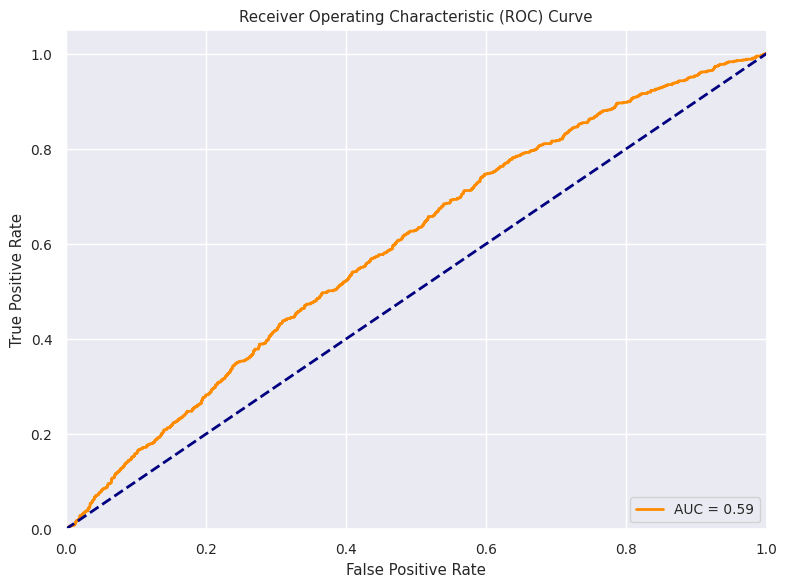

AUC-ROC Score: 0.59


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = lr.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

In [ ]:
# Cross Validation Technique

from sklearn.model_selection import cross_val_score

In [ ]:
train_accuracy_cv = cross_val_score(lr, x_train_over_scaled, y_train_over, cv = 10)
test_accuracy_cv = cross_val_score(lr, x_test_ss, y_test, cv = 10)

print("train_accuracy_cv :", train_accuracy_cv.mean())
print("*********************")
print("test_accuracy_cv :", test_accuracy_cv.mean())

train_accuracy_cv : 0.5785754985754985
*********************
test_accuracy_cv : 0.9360013611073059


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# # Fitting and Training the data.

bnb = BernoulliNB()
bnb.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_bnb_train = bnb.predict(x_train_over_scaled)
y_pred_bnb_test = bnb.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_bnb_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_bnb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_bnb_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_bnb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_bnb_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_bnb_test))

Train Confusion Matrix :
[[23741 20134]
 [20847 23028]]

Test Confusion Matrix :
[[5800 5169]
 [ 398  352]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.53      0.54      0.54     43875
           1       0.53      0.52      0.53     43875

    accuracy                           0.53     87750
   macro avg       0.53      0.53      0.53     87750
weighted avg       0.53      0.53      0.53     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.53      0.68     10969
           1       0.06      0.47      0.11       750

    accuracy                           0.52     11719
   macro avg       0.50      0.50      0.39     11719
weighted avg       0.88      0.52      0.64     11719


Train Accuracy Score : 0.532980056980057
Test Accuracy Score : 0.5249594675313594


### Naive - ROC Curve

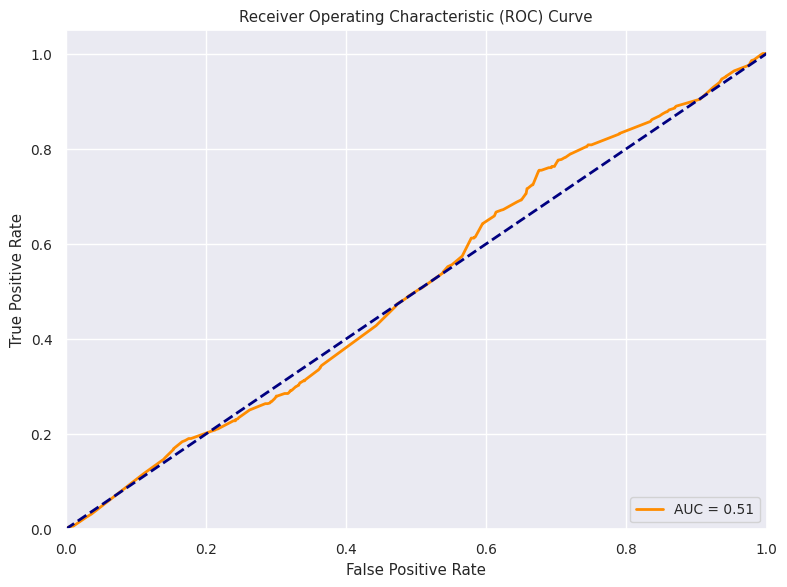

AUC-ROC Score: 0.51


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = bnb.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Fitting and Training the data.
# Criteria = gini

dt1 = DecisionTreeClassifier(criterion = "gini")
dt1.fit(x_train_over_scaled, y_train_over)

DecisionTreeClassifier()

In [ ]:
# predicting the data

y_pred_dt1_train = dt1.predict(x_train_over_scaled)
y_pred_dt1_test = dt1.predict(x_test_ss)

In [ ]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_dt1_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_dt1_test), sep = "\n")

Train Confusion Matrix :
[[43875     0]
 [    0 43875]]

Test Confusion Matrix :
[[10285   684]
 [  701    49]]


In [ ]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train_over, y_pred_dt1_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_dt1_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00     43875

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10969
           1       0.07      0.07      0.07       750

    accuracy                           0.88     11719
   macro avg       0.50      0.50      0.50     11719
weighted avg       0.88      0.88      0.88     11719



In [ ]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_dt1_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_dt1_test))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.8818158545951019


### DT(gini) - ROC Curve

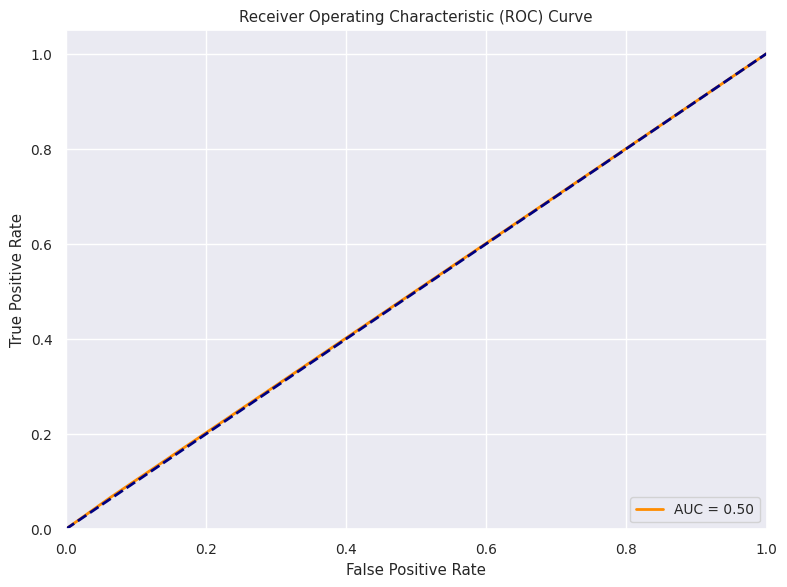

AUC-ROC Score: 0.50


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = dt1.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

#### Criteria = entropy

In [ ]:
# Fitting and Training the data.
# Criteria = entropy

dt2 = DecisionTreeClassifier(criterion = "entropy")
dt2.fit(x_train_over_scaled, y_train_over)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# predicting the data

y_pred_dt2_train = dt2.predict(x_train_over_scaled)
y_pred_dt2_test = dt2.predict(x_test_ss)

In [ ]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_dt2_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_dt2_test), sep = "\n")

Train Confusion Matrix :
[[43875     0]
 [    0 43875]]

Test Confusion Matrix :
[[10262   707]
 [  696    54]]


In [ ]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train_over, y_pred_dt2_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_dt2_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00     43875

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10969
           1       0.07      0.07      0.07       750

    accuracy                           0.88     11719
   macro avg       0.50      0.50      0.50     11719
weighted avg       0.88      0.88      0.88     11719



In [ ]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_dt2_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_dt2_test))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.8802798873624029


### DT(entropy) - ROC Curve

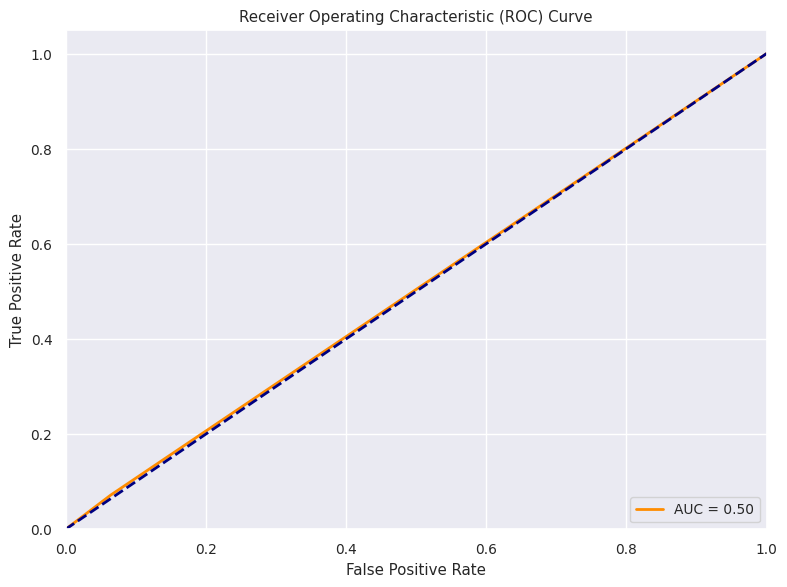

AUC-ROC Score: 0.50


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = dt2.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# # Fitting and Training the data.

rf = RandomForestClassifier()
rf.fit(x_train_over_scaled, y_train_over)

RandomForestClassifier()

In [ ]:
# predicting the data

y_pred_rf_train = rf.predict(x_train_over_scaled)
y_pred_rf_test = rf.predict(x_test_ss)

In [ ]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_rf_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_rf_test), sep = "\n")

Train Confusion Matrix :
[[43875     0]
 [    0 43875]]

Test Confusion Matrix :
[[10766   203]
 [  722    28]]


In [ ]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train_over, y_pred_rf_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_rf_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00     43875

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10969
           1       0.12      0.04      0.06       750

    accuracy                           0.92     11719
   macro avg       0.53      0.51      0.51     11719
weighted avg       0.88      0.92      0.90     11719



In [ ]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_rf_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_rf_test))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.9210683505418551


### RF - ROC Curve

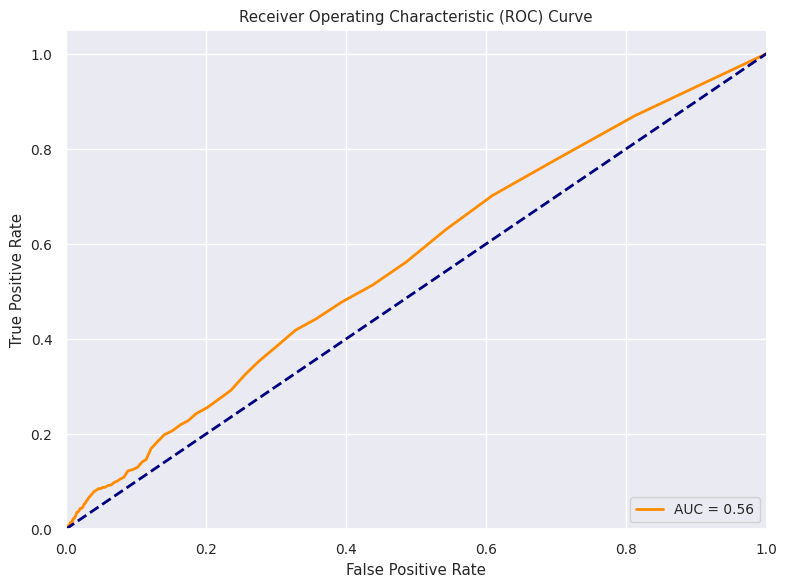

AUC-ROC Score: 0.56


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = rf.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# # Fitting and Training the data.

bag = BaggingClassifier()
bag.fit(x_train_over_scaled, y_train_over)

BaggingClassifier()

In [ ]:
# predicting the data

y_pred_bag_train = bag.predict(x_train_over_scaled)
y_pred_bag_test = bag.predict(x_test_ss)

In [ ]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_bag_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_bag_test), sep = "\n")

Train Confusion Matrix :
[[43858    17]
 [    0 43875]]

Test Confusion Matrix :
[[10761   208]
 [  728    22]]


In [ ]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train_over, y_pred_bag_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_bag_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00     43875

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10969
           1       0.10      0.03      0.04       750

    accuracy                           0.92     11719
   macro avg       0.52      0.51      0.50     11719
weighted avg       0.88      0.92      0.90     11719



In [ ]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_bag_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_bag_test))

Train Accuracy Score : 0.9998062678062678
Test Accuracy Score : 0.9201297038996501


### Bagging - ROC Curve

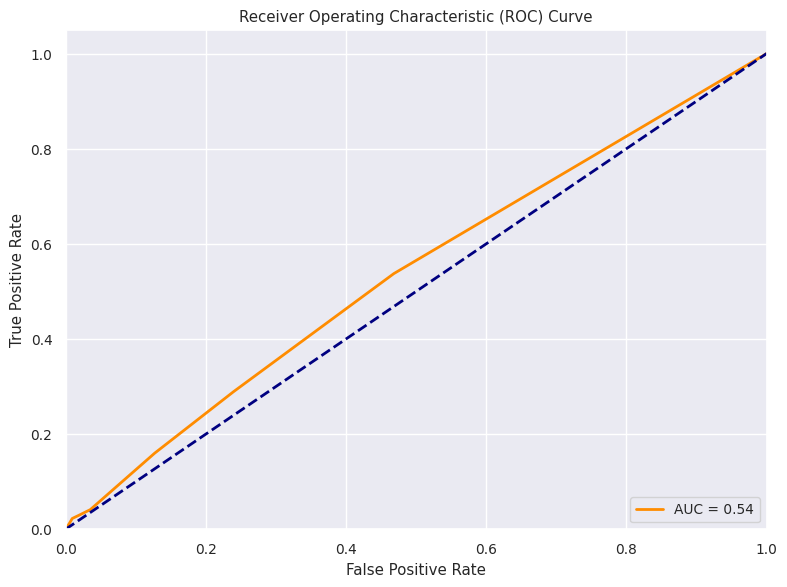

AUC-ROC Score: 0.54


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = bag.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# # Fitting and Training the data.

gdb = GradientBoostingClassifier()
gdb.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_gdb_train = gdb.predict(x_train_over_scaled)
y_pred_gdb_test = gdb.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_gdb_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_gdb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_gdb_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_gdb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_gdb_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_gdb_test))

Train Confusion Matrix :
[[25138 18737]
 [12973 30902]]

Test Confusion Matrix :
[[6152 4817]
 [ 261  489]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     43875
           1       0.62      0.70      0.66     43875

    accuracy                           0.64     87750
   macro avg       0.64      0.64      0.64     87750
weighted avg       0.64      0.64      0.64     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.56      0.71     10969
           1       0.09      0.65      0.16       750

    accuracy                           0.57     11719
   macro avg       0.53      0.61      0.43     11719
weighted avg       0.90      0.57      0.67     11719


Train Accuracy Score : 0.6386324786324786
Test Accuracy Score : 0.5666865773530164


### Gradient Boost - ROC Curve

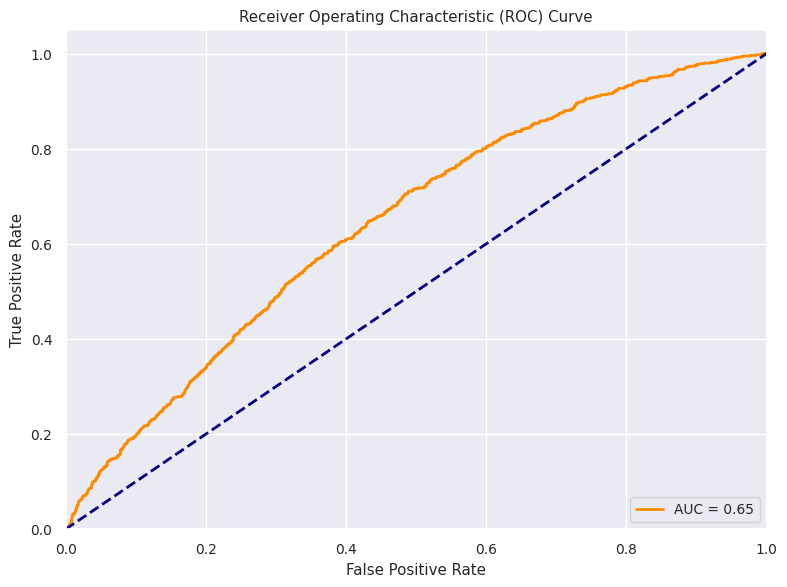

AUC-ROC Score: 0.65


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = gdb.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## HyperParameter Tunning - Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#parameter grid with values for n_estimators and learning_rate
param_grid = {'n_estimators': [50, 100, 150, 200],'learning_rate': [0.01, 0.1, 0.2, 0.3]}

# Define GradientBoostingClassifier
gdb_gscv = GradientBoostingClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(gdb_gscv, param_grid, cv = 5)
grid_search.fit(x_train_over_scaled, y_train_over)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']

print("best_n_estimators : ", best_n_estimators)
print("best_learning_rate : ", best_learning_rate)

best_n_estimators :  200
best_learning_rate :  0.3


## GDB - n_estimators = 200, learning_rate = 0.3

In [ ]:
# # Fitting and Training the data.

gdb_1 = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.3)
gdb_1.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_gdb_1_train = gdb_1.predict(x_train_over_scaled)
y_pred_gdb_1_test = gdb_1.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_gdb_1_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_gdb_1_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_gdb_1_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_gdb_1_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_gdb_1_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_gdb_1_test))

Train Confusion Matrix :
[[28809 15066]
 [10033 33842]]

Test Confusion Matrix :
[[6940 4029]
 [ 334  416]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     43875
           1       0.69      0.77      0.73     43875

    accuracy                           0.71     87750
   macro avg       0.72      0.71      0.71     87750
weighted avg       0.72      0.71      0.71     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     10969
           1       0.09      0.55      0.16       750

    accuracy                           0.63     11719
   macro avg       0.52      0.59      0.46     11719
weighted avg       0.90      0.63      0.72     11719


Train Accuracy Score : 0.7139715099715099
Test Accuracy Score : 0.6276986090963392


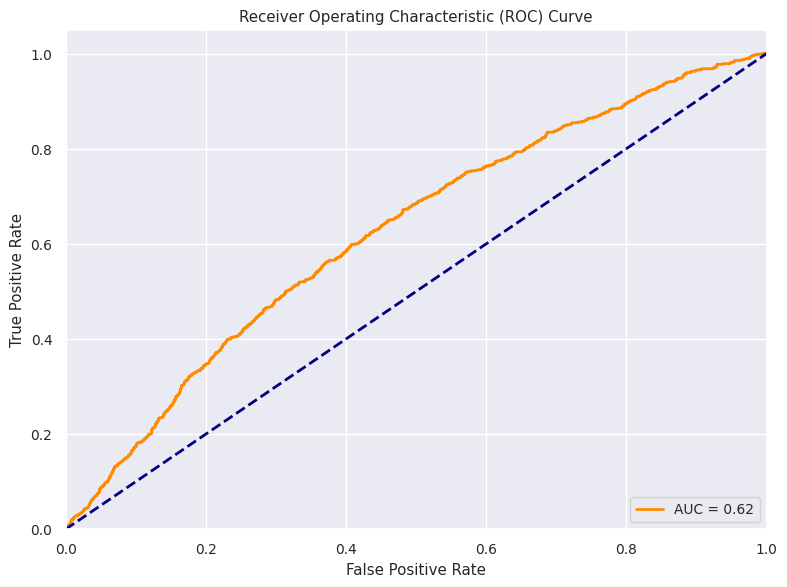

AUC-ROC Score: 0.62


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs_1 = gdb_1.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## Manual Hyper parameter tunning - Gradient Boosting

In [ ]:
N_Estimators = [50, 100, 150, 200]
Learn_Rate = [0.01, 0.1, 0.2, 0.3]

n_50 = []
n_100 = []
n_150 = []
n_200 = []

for n_est in N_Estimators:
    for l_rate in Learn_Rate:
      gdb_gscv = GradientBoostingClassifier()
        param_grid = {'n_estimators': [n_est],'learning_rate': [l_rate]}
        grid_search = GridSearchCV(gdb_gscv, param_grid, cv = 5)
        grid_search.fit(x_train_over_scaled, y_train_over)
        y_probs = grid_search.predict_proba(x_test_ss)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        if n_est == 50:
            n_50.append((l_rate, roc_auc))
        elif n_est == 100:
            n_100.append((l_rate, roc_auc))
        elif n_est == 150:
            n_150.append((l_rate, roc_auc))
        elif n_est == 200:
            n_200.append((l_rate, roc_auc))

In [ ]:
print(n_50)
print(n_100)
print(n_150)
print(n_200)

[(0.01, 0.6414178138390009), (0.1, 0.6423126386483119), (0.2, 0.6477571945178837), (0.3, 0.6449593703467347)]
[(0.01, 0.6408785364815996), (0.1, 0.6450718084298174), (0.2, 0.644518369951682), (0.3, 0.6373048895371805)]
[(0.01, 0.6427323061962501), (0.1, 0.645045856504695), (0.2, 0.641024402102896), (0.3, 0.631256267663415)]
[(0.01, 0.6433694350746042), (0.1, 0.6433671863129425), (0.2, 0.6366728051782296), (0.3, 0.6236645698483605)]


## GDB - n_estimators = 50, learning_rate = 0.2

In [ ]:
# # Fitting and Training the data.

gdb_2 = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.2)
gdb_2.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_gdb_2_train = gdb_2.predict(x_train_over_scaled)
y_pred_gdb_2_test = gdb_2.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_gdb_2_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_gdb_2_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_gdb_2_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_gdb_2_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_gdb_2_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_gdb_2_test))

Train Confusion Matrix :
[[25113 18762]
 [12878 30997]]

Test Confusion Matrix :
[[6170 4799]
 [ 263  487]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     43875
           1       0.62      0.71      0.66     43875

    accuracy                           0.64     87750
   macro avg       0.64      0.64      0.64     87750
weighted avg       0.64      0.64      0.64     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.56      0.71     10969
           1       0.09      0.65      0.16       750

    accuracy                           0.57     11719
   macro avg       0.53      0.61      0.44     11719
weighted avg       0.90      0.57      0.67     11719


Train Accuracy Score : 0.6394301994301994
Test Accuracy Score : 0.5680518815598601


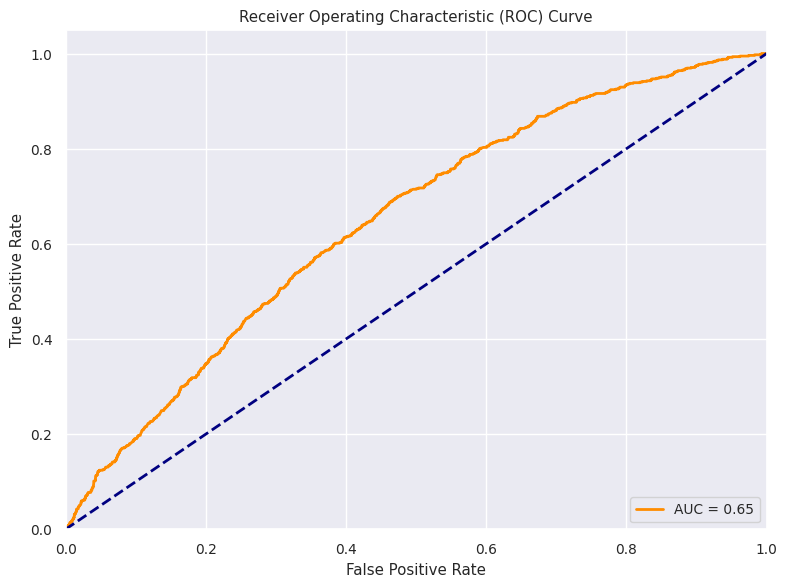

AUC-ROC Score: 0.65


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs_2 = gdb_2.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs_2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# # Fitting and Training the data.

ada = AdaBoostClassifier()
ada.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_ada_train = ada.predict(x_train_over_scaled)
y_pred_ada_test = ada.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_ada_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_ada_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_ada_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_ada_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_ada_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_ada_test))

Train Confusion Matrix :
[[23806 20069]
 [13829 30046]]

Test Confusion Matrix :
[[5912 5057]
 [ 265  485]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.63      0.54      0.58     43875
           1       0.60      0.68      0.64     43875

    accuracy                           0.61     87750
   macro avg       0.62      0.61      0.61     87750
weighted avg       0.62      0.61      0.61     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.54      0.69     10969
           1       0.09      0.65      0.15       750

    accuracy                           0.55     11719
   macro avg       0.52      0.59      0.42     11719
weighted avg       0.90      0.55      0.66     11719


Train Accuracy Score : 0.6136980056980057
Test Accuracy Score : 0.5458656881986518


### Ada Boost - ROC Curve

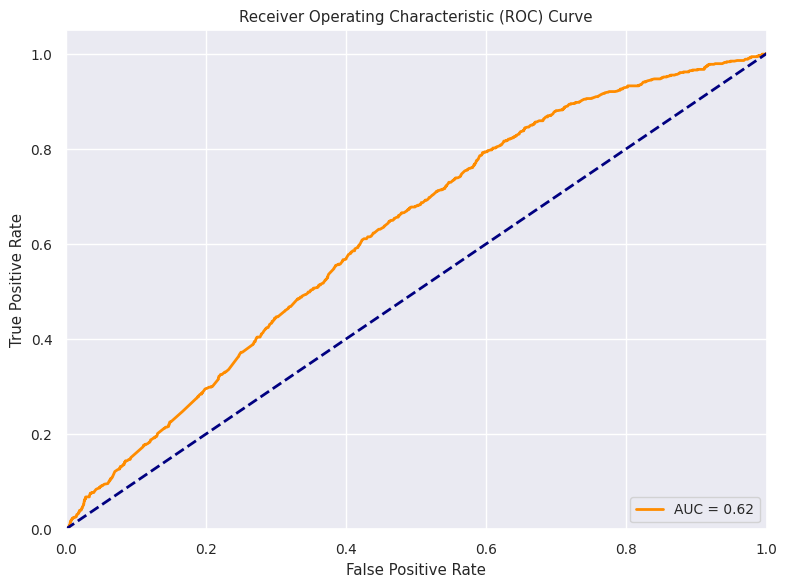

AUC-ROC Score: 0.62


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = ada.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## XG Boost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# # Fitting and Training the data.

xgb = XGBClassifier()
xgb.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_xgb_train = xgb.predict(x_train_over_scaled)
y_pred_xgb_test = xgb.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_xgb_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_xgb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_xgb_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_xgb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_xgb_train))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_xgb_test))

Train Confusion Matrix :
[[32988 10887]
 [ 4218 39657]]

Test Confusion Matrix :
[[7877 3092]
 [ 431  319]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     43875
           1       0.78      0.90      0.84     43875

    accuracy                           0.83     87750
   macro avg       0.84      0.83      0.83     87750
weighted avg       0.84      0.83      0.83     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10969
           1       0.09      0.43      0.15       750

    accuracy                           0.70     11719
   macro avg       0.52      0.57      0.49     11719
weighted avg       0.89      0.70      0.77     11719


Train Accuracy Score : 0.8278632478632478
Test Accuracy Score : 0.6993770799556276


### XG Boost - ROC Curve

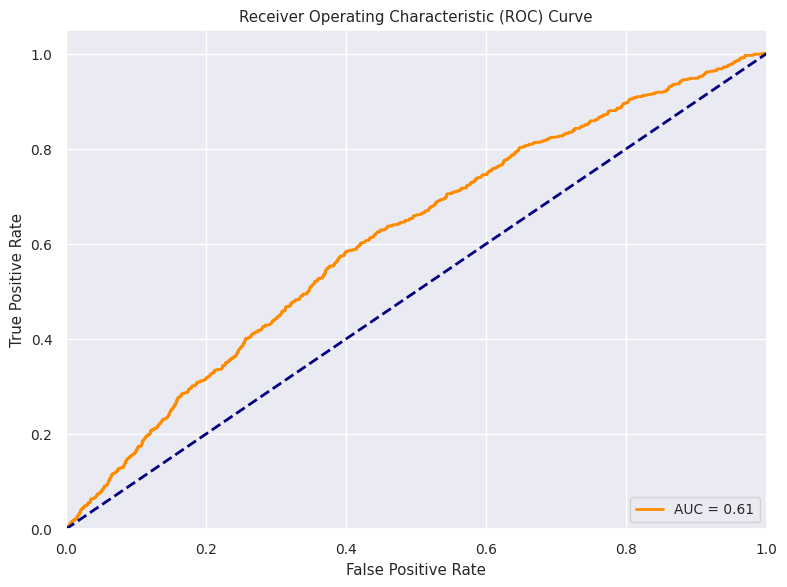

AUC-ROC Score: 0.61


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = xgb.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier([('lr', lr),('dt1', dt1),('dt2', dt2),('rf', rf),('bag', bag),
                           ('ada', ada),('gdb', gdb),('xgb', xgb)], weights =[1,1,1,1,1,1,1,1])

# Fitting and Training the data.
voting.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_train_voting = voting.predict(x_train_over_scaled)
y_pred_test_voting = voting.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_train_voting), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_test_voting), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_train_voting), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_test_voting), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_train_voting))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test_voting))

Train Confusion Matrix :
[[43869     6]
 [ 2546 41329]]

Test Confusion Matrix :
[[10417   552]
 [  686    64]]

Train Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43875
           1       1.00      0.94      0.97     43875

    accuracy                           0.97     87750
   macro avg       0.97      0.97      0.97     87750
weighted avg       0.97      0.97      0.97     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10969
           1       0.10      0.09      0.09       750

    accuracy                           0.89     11719
   macro avg       0.52      0.52      0.52     11719
weighted avg       0.88      0.89      0.89     11719


Train Accuracy Score : 0.970917378917379
Test Accuracy Score : 0.8943595869954775


In [ ]:
voting = VotingClassifier([('lr', lr),('dt1', dt1),('dt2', dt2),('rf', rf),('bag', bag),
                           ('ada', ada),('gdb', gdb),('xgb', xgb)], weights =[1,1,1,1,1,1,1,1], voting="soft")

# Fitting and Training the data.
voting.fit(x_train_over_scaled, y_train_over)

# predicting the data
y_pred_train_voting = voting.predict(x_train_over_scaled)
y_pred_test_voting = voting.predict(x_test_ss)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train_over, y_pred_train_voting), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test, y_pred_test_voting), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train_over, y_pred_train_voting), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test, y_pred_test_voting), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train_over, y_pred_train_voting))
print("Test Accuracy Score :", accuracy_score(y_test, y_pred_test_voting))

Train Confusion Matrix :
[[43875     0]
 [    0 43875]]

Test Confusion Matrix :
[[10595   374]
 [  712    38]]

Train Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00     43875

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750


Test Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10969
           1       0.09      0.05      0.07       750

    accuracy                           0.91     11719
   macro avg       0.51      0.51      0.51     11719
weighted avg       0.88      0.91      0.89     11719


Train Accuracy Score : 1.0
Test Accuracy Score : 0.9073299769604916


### Voting(soft) - ROC Curve

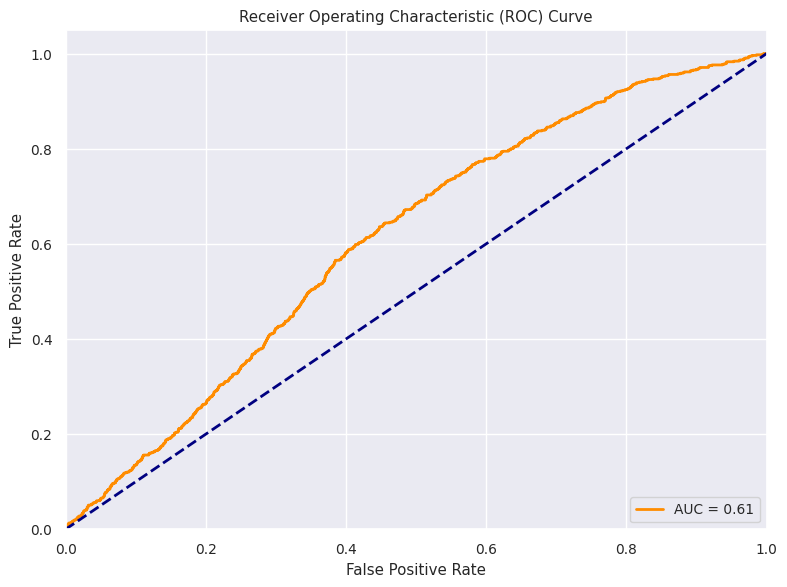

AUC-ROC Score: 0.61


In [ ]:
# Predict probabilities for the positive class (class 1)
y_probs = voting.predict_proba(x_test_ss)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print AUC score
print(f'AUC-ROC Score: {roc_auc:.2f}')